In [2]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

import bbi
import pybedtools as pbt
import pickle
import cooler
from copy import deepcopy
import itertools 

import sys
sys.path.append("./code")

from tad_functions import *
from treg_functions import *
from hic_zscore_functions import *
from plotting_functions import *
from aux_functions import *
from init_tss_annotations import *
gpath = './annotations/chromsizes'
import statsmodels.stats
import statsmodels.stats.multitest


1


In [3]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [4]:
%autoreload 2

from initialize import *
import cooler

cool_wt = cooler.Cooler('./golnaz_ets1/GSM6454838_ArimaHiC_Th1_WT_deepSeq_NovaSeqS1_202903739_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/5000')
cool_ko = cooler.Cooler('./golnaz_ets1/GSM6454839_ArimaHiC_Th1_KO_deepSeq_NovaSeqS1_203786586_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/5000')

cool_wt_50kb = cooler.Cooler('./golnaz_ets1/GSM6454838_ArimaHiC_Th1_WT_deepSeq_NovaSeqS1_202903739_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/50000')
cool_ko_50kb = cooler.Cooler('./golnaz_ets1/GSM6454839_ArimaHiC_Th1_KO_deepSeq_NovaSeqS1_203786586_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/50000')

cool_wt_25kb = cooler.Cooler('./golnaz_ets1/GSM6454838_ArimaHiC_Th1_WT_deepSeq_NovaSeqS1_202903739_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/25000')
cool_ko_25kb = cooler.Cooler('./golnaz_ets1/GSM6454839_ArimaHiC_Th1_KO_deepSeq_NovaSeqS1_203786586_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/25000')


cool_wt_250kb = cooler.Cooler('./golnaz_ets1/GSM6454838_ArimaHiC_Th1_WT_deepSeq_NovaSeqS1_202903739_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/250000')
cool_ko_250kb = cooler.Cooler('./golnaz_ets1/GSM6454839_ArimaHiC_Th1_KO_deepSeq_NovaSeqS1_203786586_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/250000')

cooldict_25kb = {
    'wt' : cool_wt_25kb,
    'ko' : cool_ko_25kb,
}

cooldict_250kb = {
    'wt' : cool_wt_250kb,
    'ko' : cool_ko_250kb,
}


(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(cool_wt_250kb)


In [ ]:
row_colors = ['lightgreen', 'green', 'orange']

columns_to_names = {
    0 : 'Active 1',
    4 : 'Active 2',
    18 : 'Repressive',
}

row_colors_dict = {
'Active 1' : 'lightgreen',
'Active 2' : 'green',
'Repressive' : 'orange',
}

ignore_set = {
'Barx2',
'Nfrkb',
'Fli1',
'Kcnj5',
'Prdm10',
'Arhgap32',
'Kcnj1',
'Tmem45b',
'CT025678.1',

}

In [9]:
cooldict_50kb = {
    'wt' : cool_wt_50kb,
    'ko' : cool_ko_50kb,
}

In [ ]:
import initialize
from initialize import *

gene_to_ind, ind_to_gene = initialize_genes(all_ind_to_region, all_region_to_ind)

### Compute compartments

In [6]:
from importlib import reload
import call_compartments
reload(call_compartments)
from call_compartments import *
import bbi

cooldict_250kb = {
    'wt' : cool_wt_250kb,
}

compdict = calculate_my_pcs(cooldict_250kb, all_ind_to_region, inds_to_region,
                                                       chrom_to_start, chrom_to_end)
my_wt_comp = compdict['wt']

/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:90: RuntimeWarning: Mean of empty slice
  v = np.nanmean(np.diag(m, k=i))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:135: RuntimeWarning: divide by zero encountered in log2
  oe = np.log2((a)/(a_exp))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:90: RuntimeWarning: Mean of empty slice
  v = np.nanmean(np.diag(m, k=i))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:135: RuntimeWarning: divide by zero encountered in log2
  oe = np.log2((a)/(a_exp))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:90: RuntimeWarning: Mean of empty slice
  v = np.nanmean(np.diag(m, k=i))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:135: RuntimeWarning: divide by zero encountered in log2
  oe = np.log2((a)/(a_exp))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/call_compartments.py:90: RuntimeWarning: Mean of empty slice
  v = np.nanmean(

/tmp/ipykernel_1340549/2230798747.py:2: RuntimeWarning: divide by zero encountered in log2
  plt.matshow(np.log2(cool_wt.matrix().fetch(('9', 32750000-d, 33000000+d))), cmap='gist_heat_r')
/tmp/ipykernel_1340549/2230798747.py:6: RuntimeWarning: divide by zero encountered in log2
  plt.matshow(np.log2(cool_ko.matrix().fetch(('9', 32750000-d, 33000000+d))), cmap='gist_heat_r')


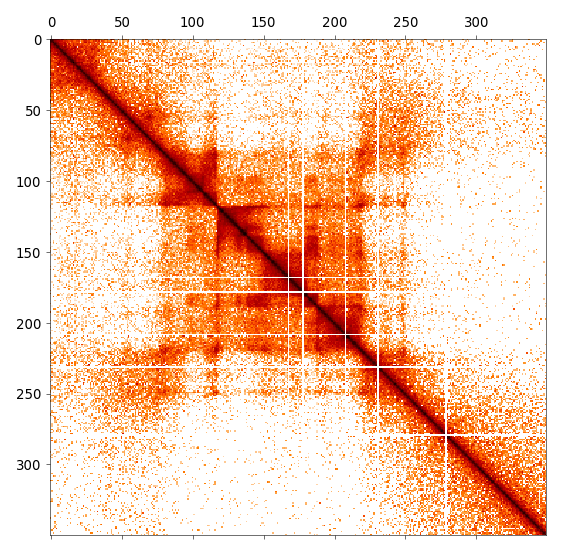

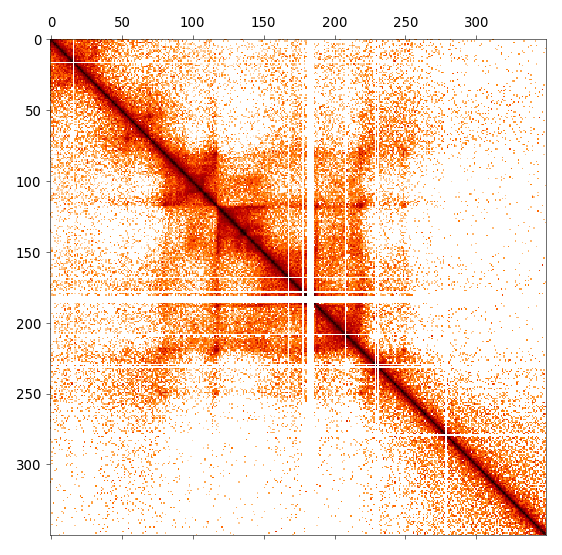

In [20]:
d = 750_000
plt.matshow(np.log2(cool_wt.matrix().fetch(('9', 32750000-d, 33000000+d))), cmap='gist_heat_r')
plt.grid(False)

d = 750_000
plt.matshow(np.log2(cool_ko.matrix().fetch(('9', 32750000-d, 33000000+d))), cmap='gist_heat_r')
plt.grid(False)

In [16]:
def make_wrapped_plot(og_ind=66, compare_with = '3', coolcond='wt', cooldict=cooldict_25kb, l = 10):
    d = 20
    og_chrom = all_ind_to_region[og_ind][0]
    ind = (og_ind-chrom_to_start[og_chrom])*l
    m = cooldict[coolcond].matrix().fetch(og_chrom, compare_with)
    salt, ealt = chrom_to_start[compare_with], chrom_to_end[compare_with]
    
    cols = m.shape[1]
    plotsize = 500
    n = cols//500
    fig, axs = init_subplots_exact(n, n, fgsz=(10, 1), dpi=100)
    for i in range(n):
        cols,  cole = i*plotsize, i*plotsize+plotsize
        if compare_with == og_chrom:
            vmax = 3e-3
        else:
            vmax = 5e-4
        axs[i].matshow((m[ind-d:ind+d, cols:cole]), cmap='gist_heat_r', vmax = vmax, aspect='equal')
        axs[i].grid(False)
        # for col in np.where(inter_and_intra_connections[og_ind, salt:ealt])[0]:
        #     x = (col+.5)*5
        #     if (x > cols) and (x < cole):
        #         axs[i].arrow(x-cols, 35, 0, -2, color='black', head_width=8, head_length=4, width=4)
        axs[i].set_xlim([0, 500])

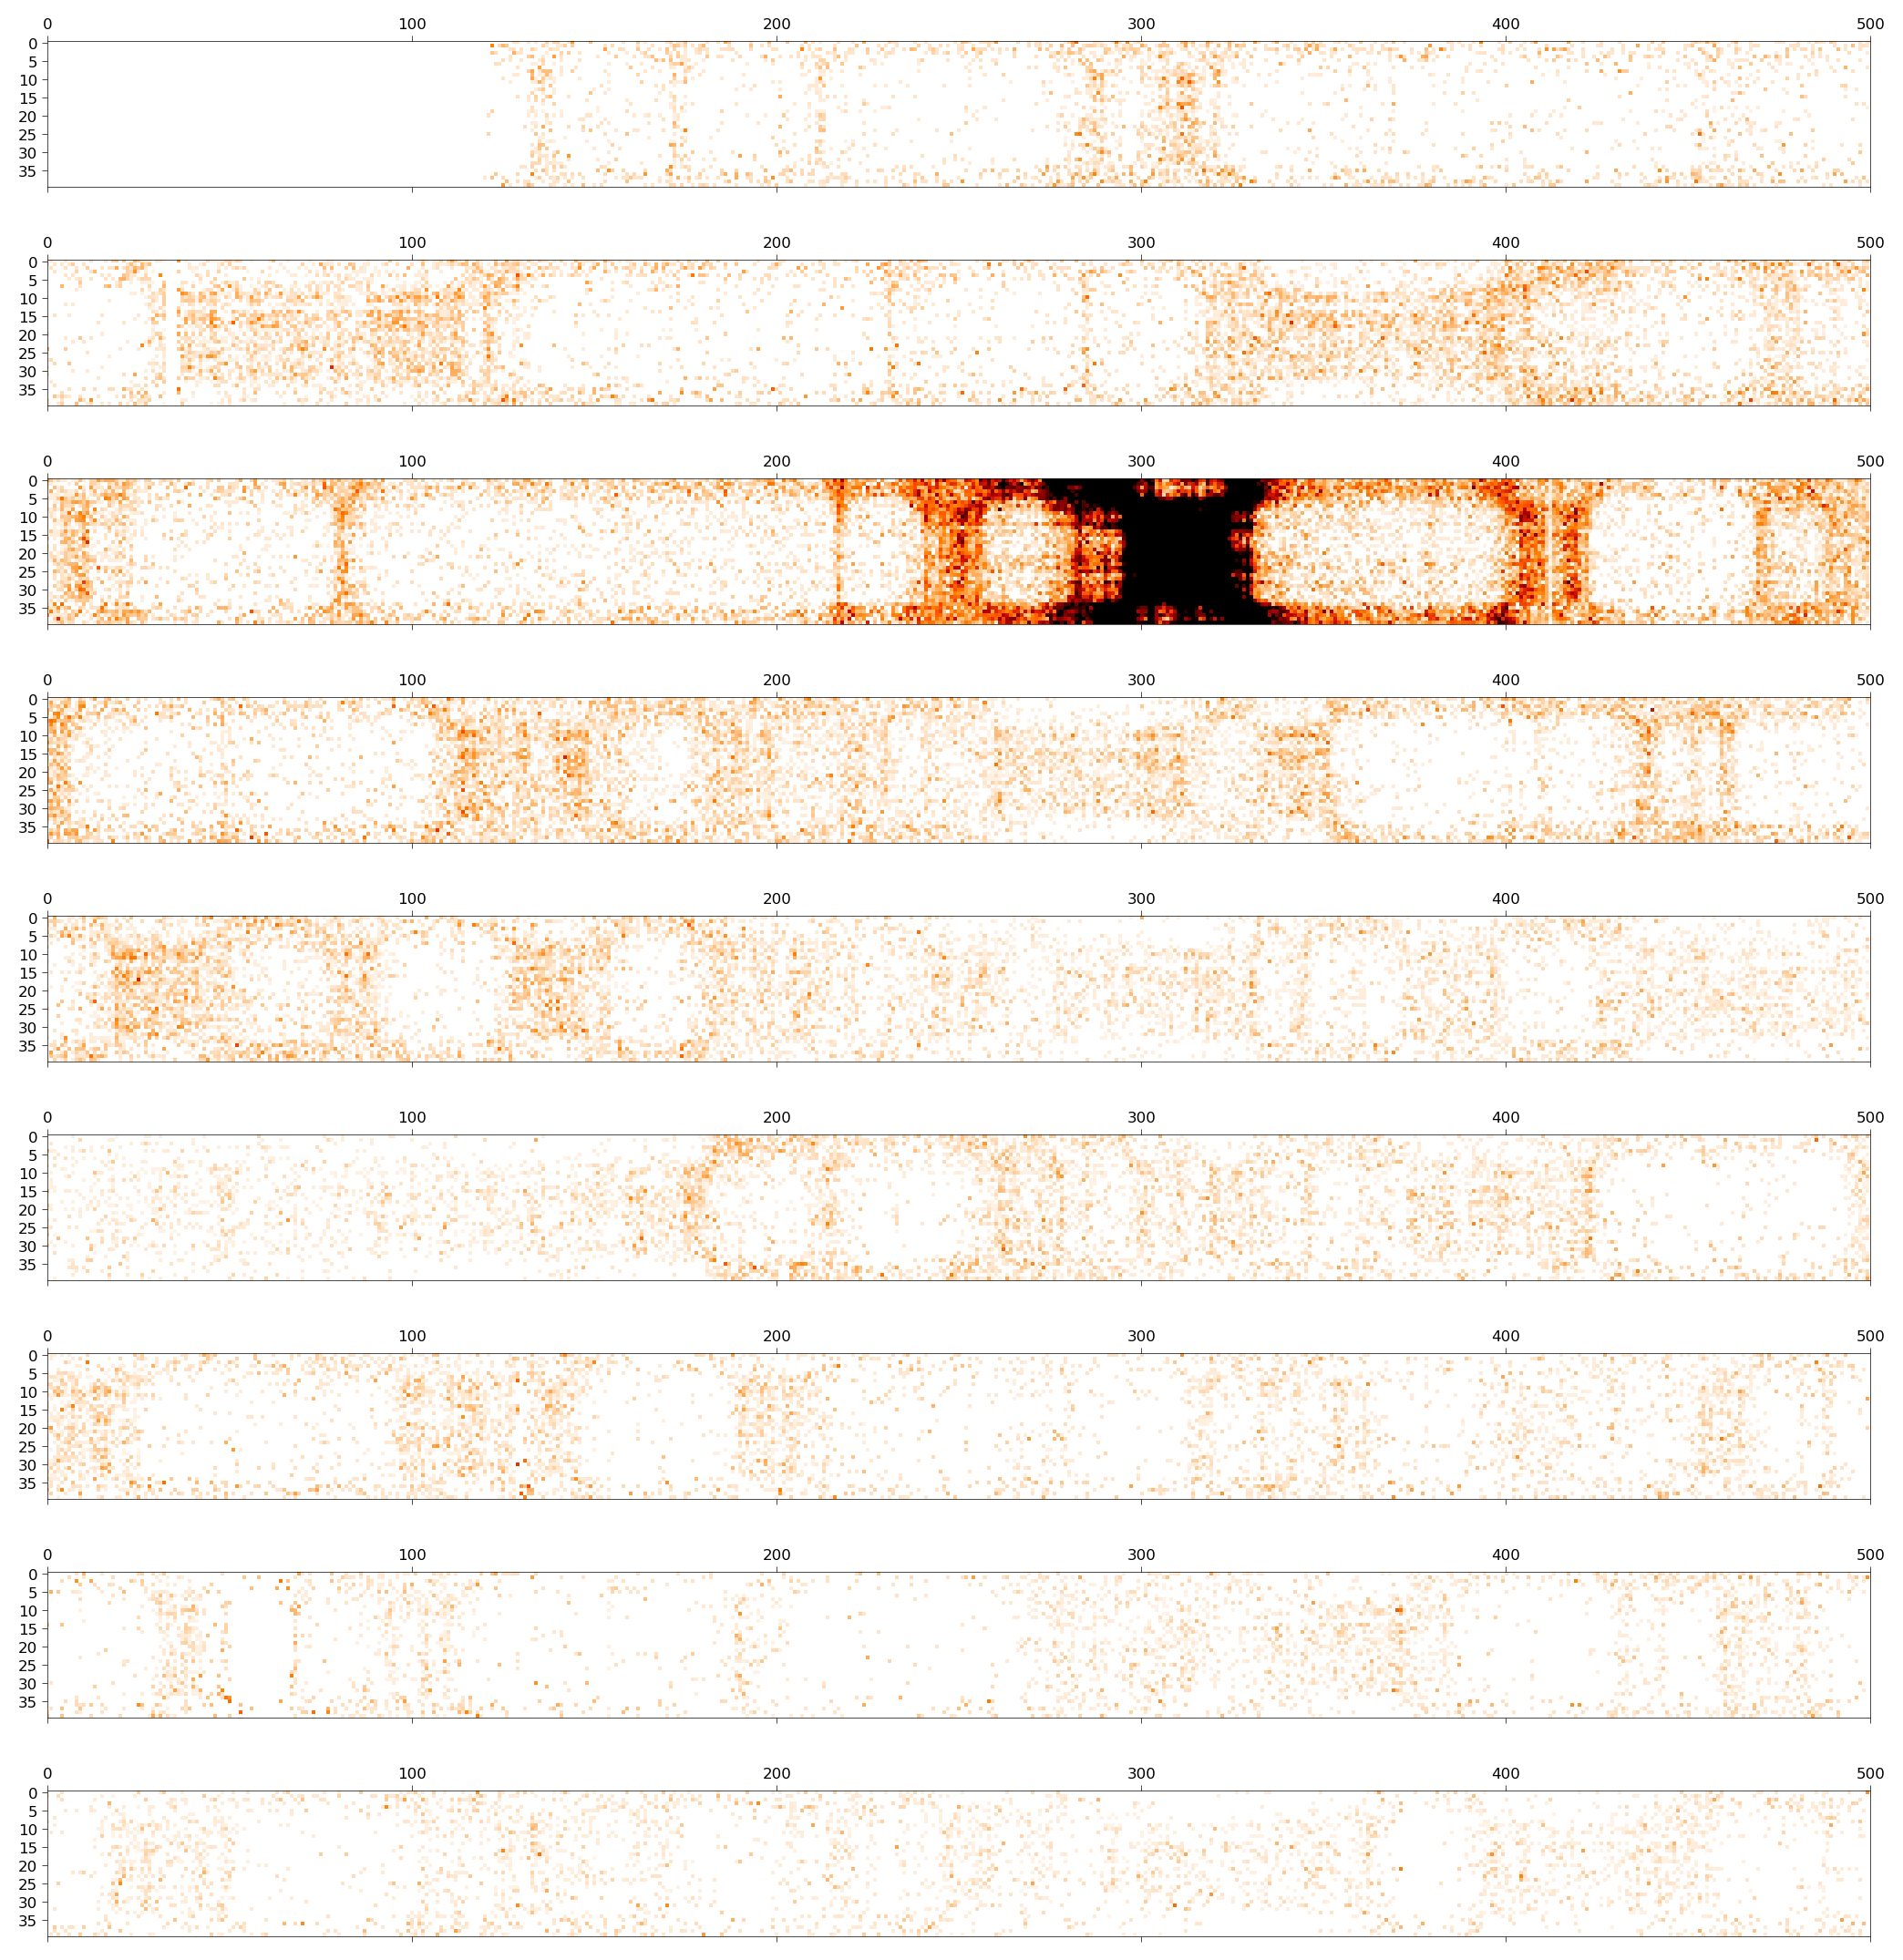

In [64]:
make_wrapped_plot(5217, '9', coolcond='wt')
make_wrapped_plot(5217, '9', coolcond='ko')

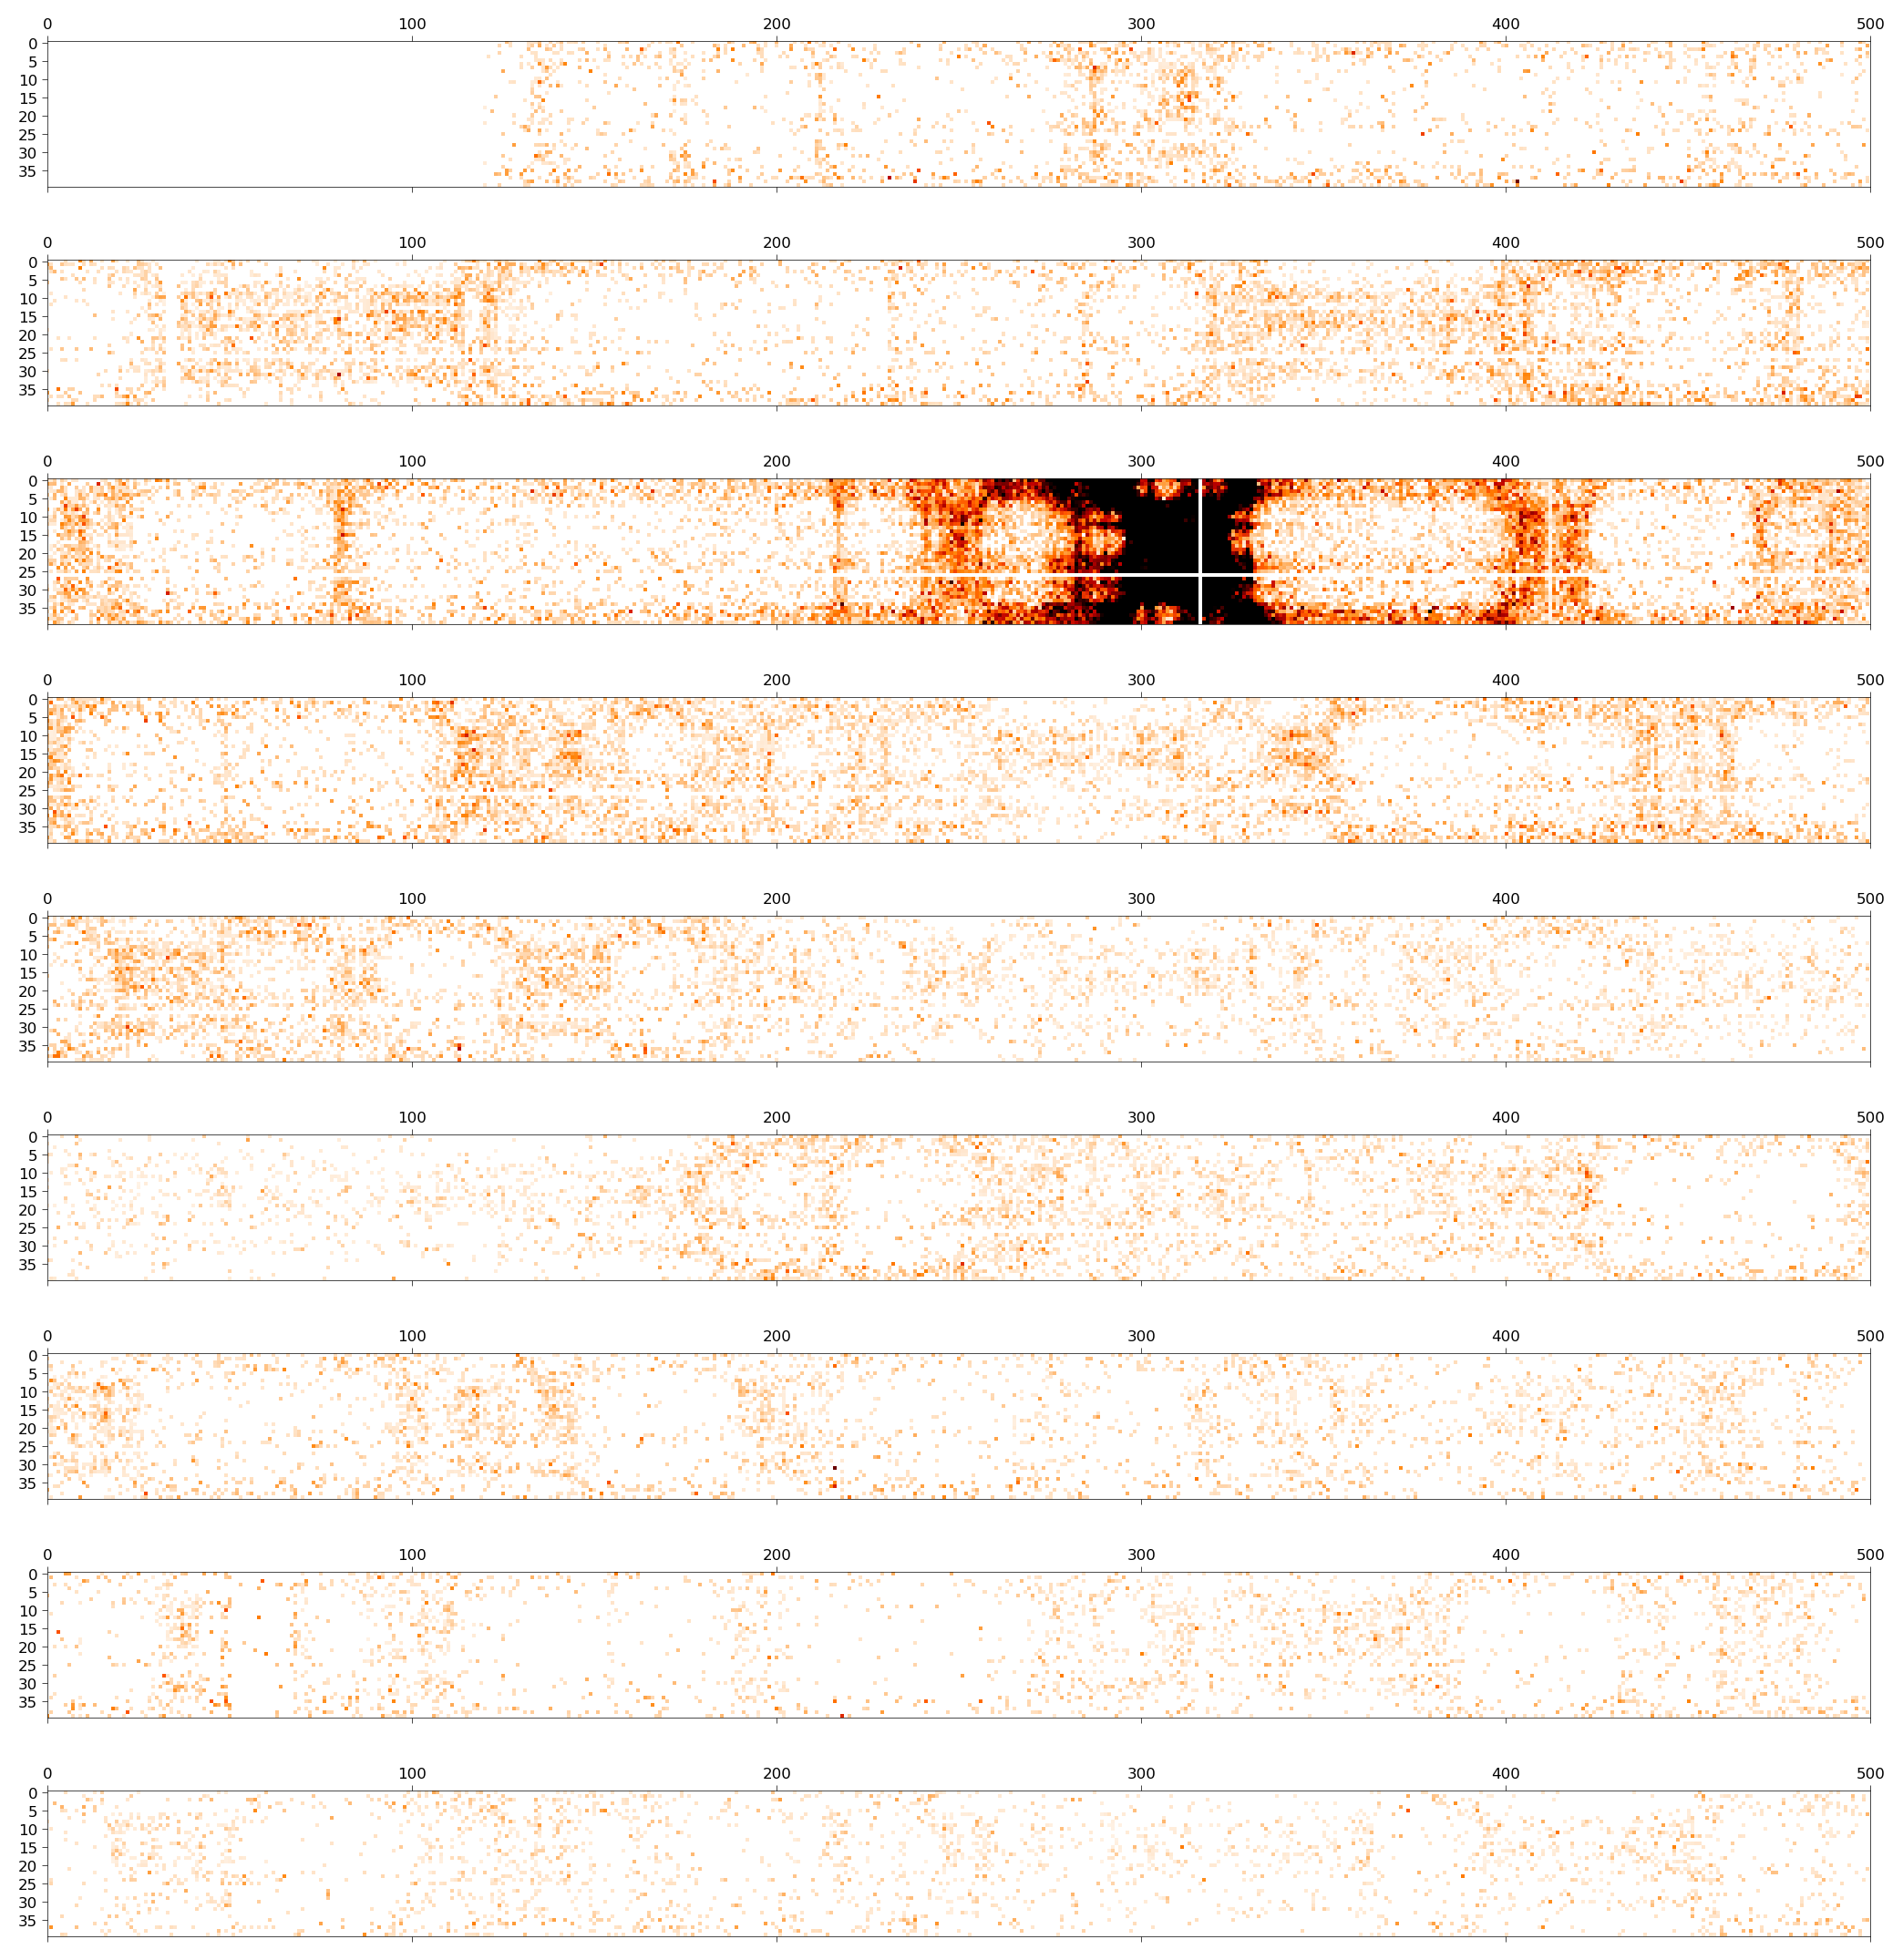

In [45]:

cool_wt_50kb = cooler.Cooler('./golnaz_ets1/GSM6454838_ArimaHiC_Th1_WT_deepSeq_NovaSeqS1_202903739_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/25000')
cool_ko_50kb = cooler.Cooler('./golnaz_ets1/GSM6454839_ArimaHiC_Th1_KO_deepSeq_NovaSeqS1_203786586_S1_001_mm10_BL6.bwt2pairs.validPairs.mcool::/resolutions/25000')



/tmp/ipykernel_1340549/2249321822.py:2: RuntimeWarning: divide by zero encountered in log2
  plt.matshow(np.log2(cool_ko.matrix().fetch(('9', 32750000-d, 33000000+d))), cmap='gist_heat_r')
/tmp/ipykernel_1340549/2249321822.py:6: RuntimeWarning: divide by zero encountered in log2
  plt.matshow(np.log2(cool_wt.matrix().fetch(('9', 32750000-d, 33000000+d))), cmap='gist_heat_r')


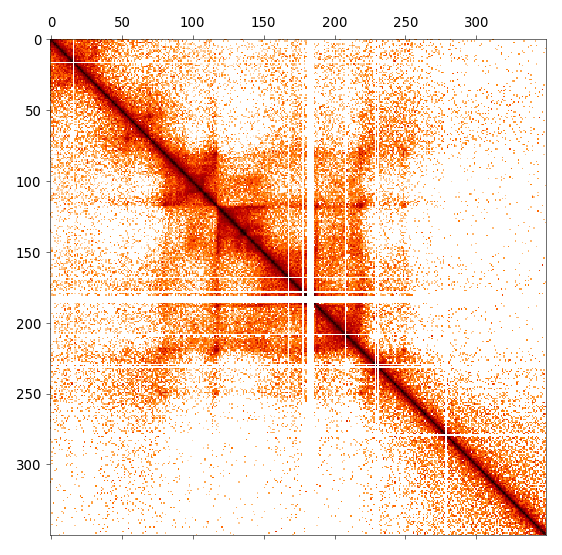

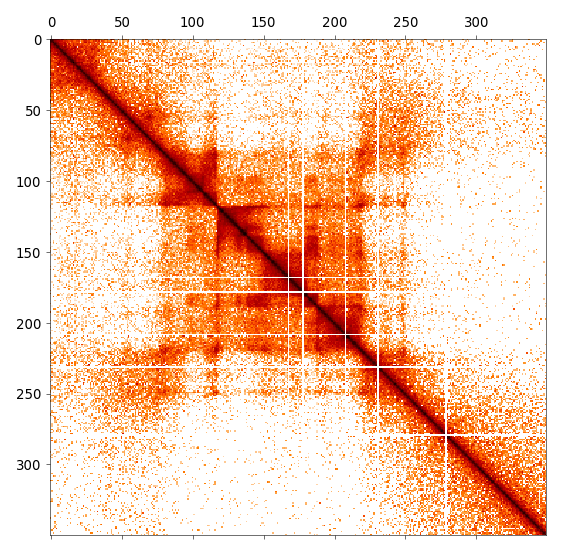

In [66]:
d = 750_000
plt.matshow(np.log2(cool_ko.matrix().fetch(('9', 32750000-d, 33000000+d))), cmap='gist_heat_r')
plt.grid(False)

d = 750_000
plt.matshow(np.log2(cool_wt.matrix().fetch(('9', 32750000-d, 33000000+d))), cmap='gist_heat_r')
plt.grid(False)

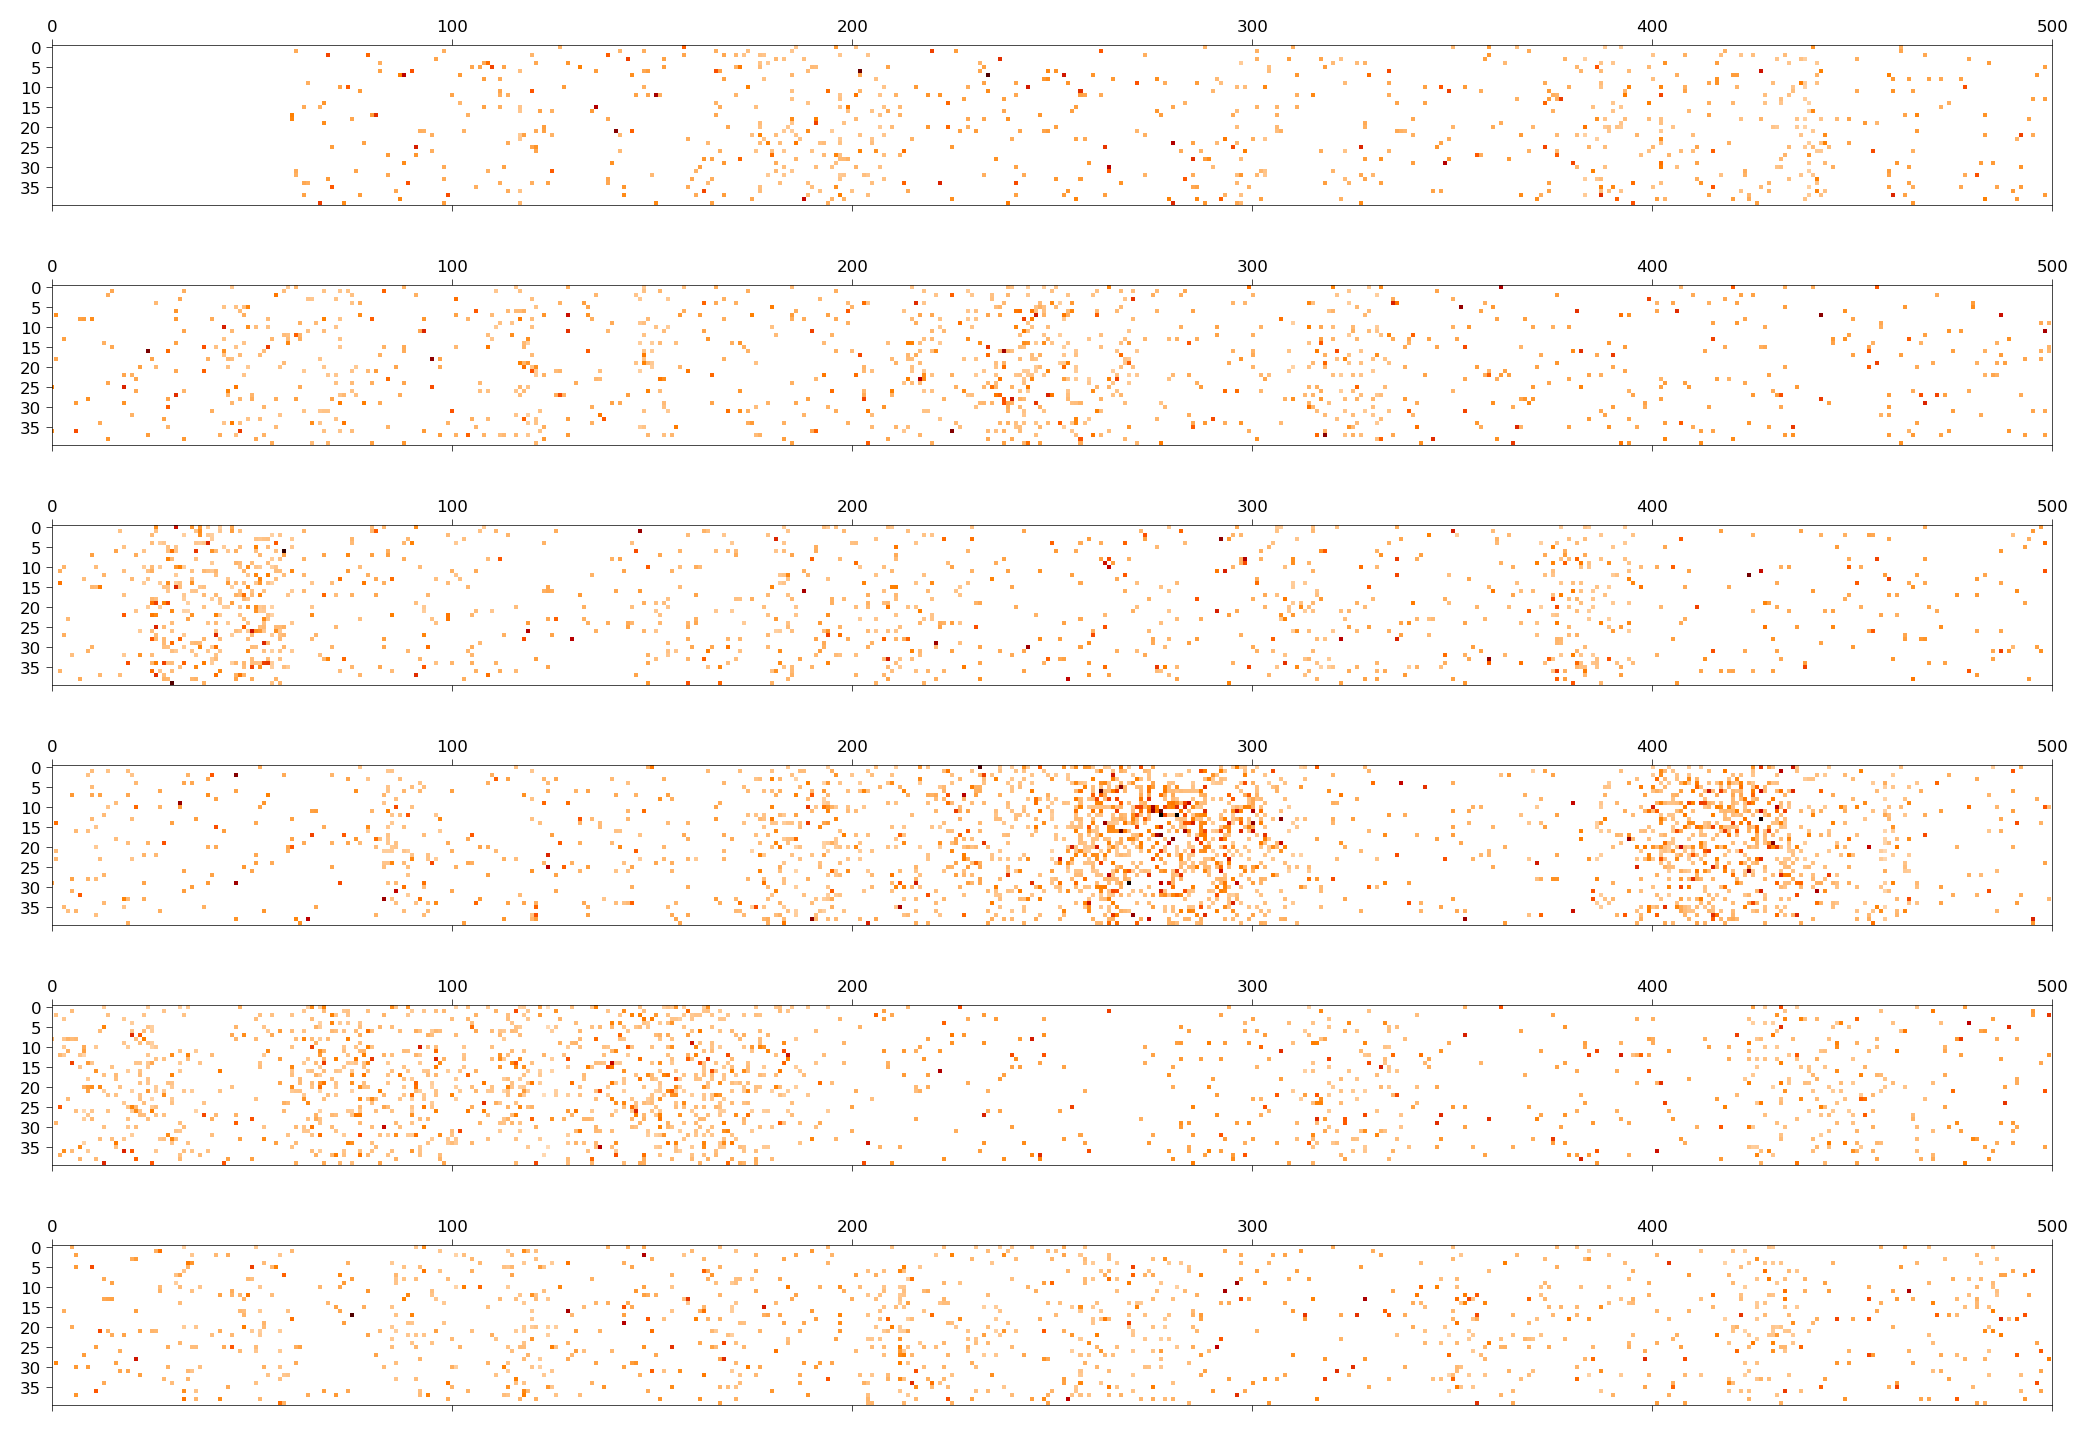

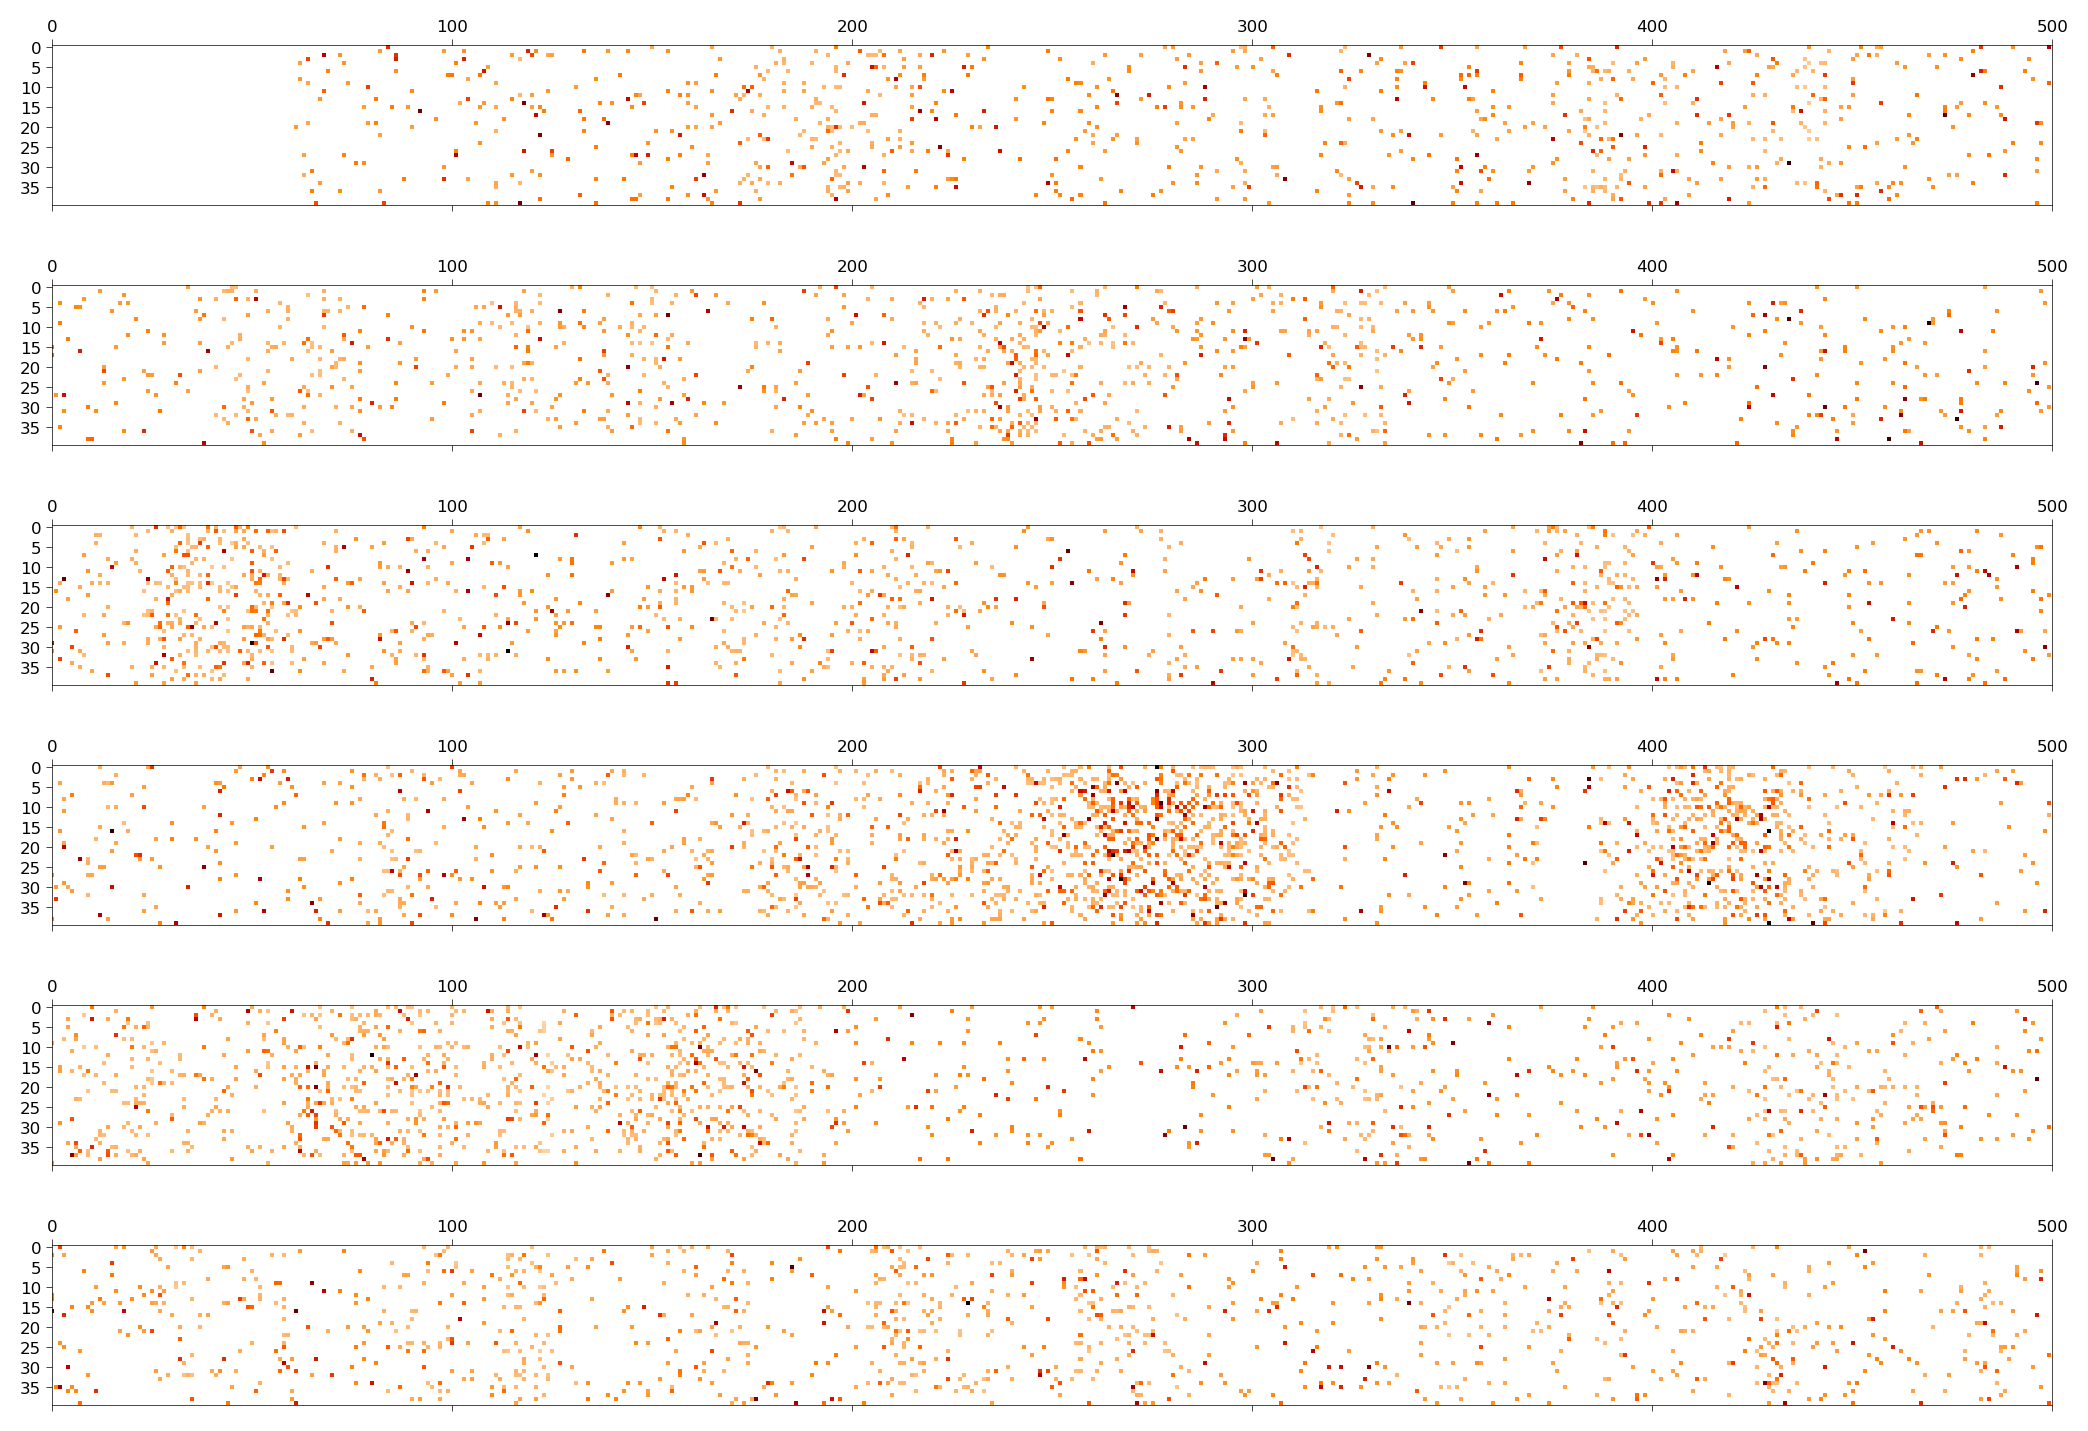

In [69]:
make_wrapped_plot(5217, '3', coolcond='wt', cooldict=cooldict_50kb)
make_wrapped_plot(5217, '3', coolcond='ko', cooldict=cooldict_50kb)

### Interchromosomal hub pileup

In [7]:
goodinds = pickle.load(open('./for_snipping/goodinds', 'rb'))
merged_clustdict = pickle.load(open('./for_snipping/merged_clustdict', 'rb'))
merged_inds_to_subset = pickle.load(open('./for_snipping/merged_inds_to_subset', 'rb'))

inter_and_intra_connections_treg = pickle.load(open('./for_snipping/inter_and_intra_connections_treg', 'rb'))
inter_and_intra_connections_tcon = pickle.load(open('./for_snipping/inter_and_intra_connections_tcon', 'rb'))

In [45]:
df = pd.DataFrame([goodinds, merged_clustdict['all']]).T
df = df[df[1].isin(merged_inds_to_subset)]
df.columns = ['ind', 'cluster']
df['chrom'] = [all_ind_to_region[x][0] for x in df['ind'].values]

acomp = np.where(my_wt_comp > .6)[0] 
acomp_df = pd.DataFrame(acomp[~np.isin(acomp, df['ind'])], columns=['ind']).iloc[::4]
acomp_df['ind'] = acomp_df['ind'].astype(int)
acomp_df['chrom'] = [all_ind_to_region[x][0] for x in acomp_df['ind'].values]
acomp_df['cluster'] = 'A comp.'

df = pd.concat([df, acomp_df], axis=0)
df = df.sort_values('ind')

df = df.reset_index().drop('index', axis=1)

In [29]:
newline = '\n'
def plot_pileup_mat(mats, idx, ax, vmin=-.06, vmax=.2, name1='', name2='', cmap='gist_heat_r'):
    plt.sca(ax)
    mat = np.nanmean(mats[idx], axis=0)
    n = len(mat)    
    ax.matshow(mat, cmap=cmap, vmin = vmin, vmax = vmax, extent = [-n//2, n//2, n//2, -n//2], )
    plt.title(f'{name1} to {name2}')
    m = n//2
    sl = slice(m-3, m+5+1)
    cross = np.zeros_like(mat)
    cross[sl, :] = 1
    cross[:, sl] = 1
    cross[sl, sl] = 0
    
    X, Y = np.where(cross>0)
    p = nonan_test(np.nanmean(mats[idx][:, sl, sl], axis=(1, 2)),
                    np.nanmean(mats[idx][:, X, Y], axis=(1))
                    )[1]    
    enrich = (np.nanmean(mats[idx][:, sl, sl], axis=(0, 1, 2)) - np.nanmean(mats[idx][:, X, Y], axis=(0, 1))).round(3)
    ax.text(.03, .05, f'n={idx.sum()}', transform=axs[c].transAxes, fontsize=8)
    # axs[c].text(.03, .95, f'p={format_pvalue(p)}', transform=ax.transAxes, fontsize=5, va='top')    

In [48]:
%autoreload 2
from collections import defaultdict
from make_figure4 import *
from hub_pileup import *
import itertools

megaloop_pileup_cooldict = cooldict_50kb
all_mat_dict = defaultdict(list)
all_metadata = []
padding_size = 30

ets1_all_mat_dict, ets1_all_metadata = pileup_bins_with_hub(df, megaloop_pileup_cooldict, 
                                                            chrom_to_start, inter_and_intra_connections_treg, 
                            inter_and_intra_connections_tcon, padding_size=padding_size, fetch_oe=True)

In [127]:
bwdict = {
    'Treg H3K27ac' : bbi.open('/Genomics/argo/users/gdolsten/pritlab/snakemake_sras/bws/GSM.SRR5385344.H3K27ac_ChIP-seq_of_Treg_replicate_2.bw')
}

In [501]:
ind = 5217
ms = []
name = 'Ets1'
for cluster in [4, 0, 18, 'A comp.']:
    idx = ( ((ets1_all_metadata['ind1']==ind) & (ets1_all_metadata['cluster2']==cluster)) | 
            ((ets1_all_metadata['ind2']==ind) & (ets1_all_metadata['cluster1']==cluster))
          )
    rows = []
    keys = [ 'wt',  'ko']
    keys = [ 'ko',  'wt']

    fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100)
    plt.sca(axs[0])

    base = (5217-chrom_to_start['9'])*5
    l1, l2 = (base - 30 + 10)*50_000, (base + 31 - 10)*50_000
    place = ('9', l1, l2)
    newax = add_GTF_to_L_axis(place, plt.gca(), ignore_set = ignore_set)
    newax.set_ylim([l2, l1])
    newax.set_xlim([-1, 1])
    newax.axhspan(32928966, 32904069, color='red', linewidth=0)
    newax.grid(False)
    
    newax = add_bigwig_to_axis(place, bwdict, plt.gca(), basey=-.3)[0]
    
    newax.axvspan(32928966, 32904069, color='red', linewidth=0)
    newax.set_xlim([l1, l2])
    newax.set_yticks([0, 80])
    newax.grid(False)

    for c, key in enumerate(keys):
        plt.sca(axs[c])
        mats = (ets1_all_mat_dict[key])[idx][:, 10:-10, 10:-10]
        print(mats.shape)
        plot_pileup_mat(mats, axs[c], cmap = 'gist_heat_r', vmin=-.05, vmax=.25)
        m = np.nanmean(ets1_all_mat_dict[key][idx], axis=0)
        ms.append(m)
        n = len(m)//2
        plt.grid(False)
        plt.sca(axs[c])
        plt.title(f'{key}')
    plt.sca(axs[2])
    mats = (ets1_all_mat_dict['wt'][idx] - ets1_all_mat_dict['ko'][idx])[:, 10:-10, 10:-10]
    plot_pileup_mat(mats,  axs[2], cmap = 'coolwarm', vmin=-.1, vmax=.1)
    m = np.nanmean(ets1_all_mat_dict[key][idx], axis=0)
    ms.append(m)

    plt.title("Delta")
    plt.grid(False)
    plt.text(.03, .05, f'n={idx.sum()}', transform=axs[2].transAxes, fontsize=8)
    
    x1, x2 = all_ind_to_region[5217][1], all_ind_to_region[5217][2]
    xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)
    
    cutoff = n*50_000/1e6
    mb = mats.shape[1]*50e3 // 2 / 1e6
    for c, a in enumerate(axs):
        plt.sca(axs[c])

        plt.yticks([-mb, 0, mb])
        plt.gca().set_yticklabels(['', '', ''])
        plt.gca().get_yticklabels()[1].set_fontsize(10)
        plt.gca().get_yticklabels()[1].set_rotation(0)
        plt.gca().get_yticklabels()[1].set_va('center')

        plt.gca().set_xticks([-mb, 0, mb])
        plt.gca().set_xticklabels([-cutoff, "Other anchor", cutoff])

        a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
        if c % n != 0 :
            plt.gca().tick_params(labelleft=False)
    fig.savefig(f'./plots/GOLNAZ/ets1_ko_{cluster}.pdf', bbox_inches='tight')


NameError: name 'ets1_all_metadata' is not defined

### Old hub pileup (at 250kb)

In [49]:
cooldict_250kb = {
    'wt' : cool_wt_250kb,
    'ko' : cool_ko_250kb,
}

In [50]:
%autoreload 2
from construct_oe_mat import *

ets1_oe_mat_dict = construct_oe_mat_dict(cooldict_250kb, all_ind_to_region, 
                                            parsed_chroms, chrom_to_start, chrom_to_end, verbose=True, )

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with wt
Done with ko


In [515]:
from compute_differential_hic_hub import *

acomp = np.where(my_wt_comp > .6)[0][::4]
acomp_df = pd.DataFrame(acomp[~np.isin(acomp, df['ind'])], columns=['ind'])
hub_dict = {
    'Active 1' : goodinds[merged_clustdict['all']==0],
    'Active 2' : goodinds[merged_clustdict['all']==4],
    'Repressive' : goodinds[merged_clustdict['all']==18],
    # 'A comp' : acomp_df['ind'].values
}

comps = [
    ['wt', 'ko'],
]
comp1, comp2 = comps[0]
tstat_df, stat_df, pval_df, raw_pval_df, meta = get_differential_hic(
                     ets1_oe_mat_dict[comp1],
                     ets1_oe_mat_dict[comp2],
                     hub_dict, all_ind_to_region, m = 3, center = 0, cliplo=-100, cliphigh=100, method = 'center_square',
    # meta_inds = {5217, 6058}
)

/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:75: RuntimeWarning: Mean of empty slice
  
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:76: RuntimeWarning: Mean of empty slice
  def get_differential_hic(sep_oe_mat_treg, sep_oe_mat_tcon, hub_dict, all_ind_to_region, m = 2, center = 1, cliplo=-1, cliphigh=10,
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/scipy/stats/_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:129: RuntimeWarning: Mean of empty slice
  
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:75: RuntimeWarning: Mean of empty slice
  
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:76: RuntimeWarning: Mean of empty slice
  def get_differential_hic(se

In [516]:
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = '42'
# plt.rcParams['svg.fonttype'] = '42'

/Genomics/pritykinlab/gabe/jupys/tregs/./code/volcano_plot.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(x, y, zorder = 3, c = colors, linewidth=0, s = s, rasterized=rasterized, vmin=vmin, vmax=vmax, alpha=alpha)


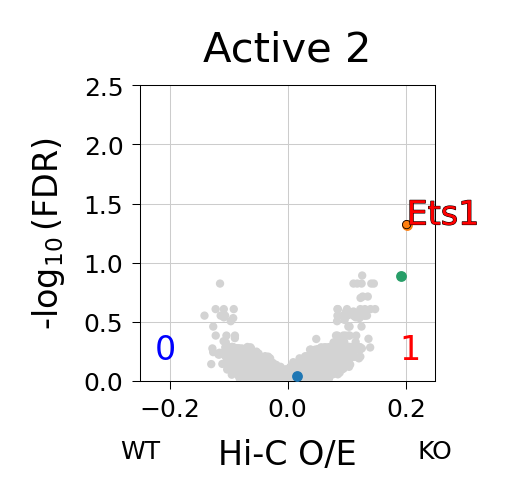

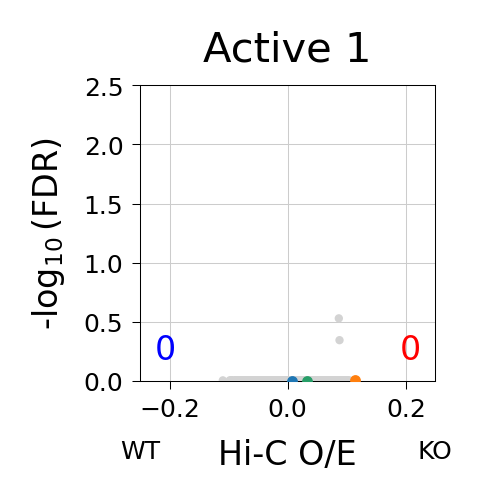

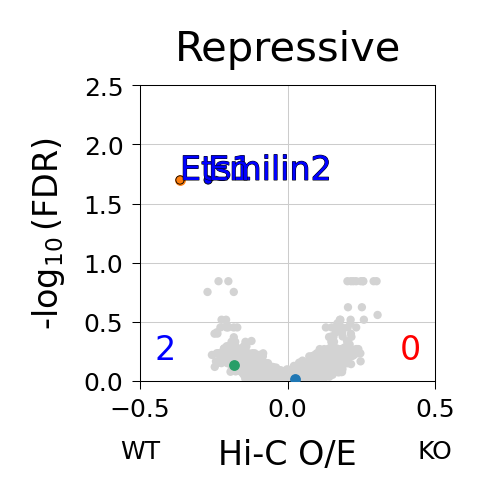

In [517]:
from volcano_plot import *

names = pd.Series([get_name(x, ind_to_gene) for x in pval_df.index], pval_df.index)

pco = .01
stat_co = .1
xlims = [[-.25, .25], [-.25, .25], [-.5, .5]]
for c, col in enumerate(['Active 2', 'Active 1', 'Repressive']):
    fig, axs = init_subplots_exact(1, 1, fgsz=(25*mm, 25*mm), dpi = 150, xspace=1.4)
    plt.sca(axs)
    volcano_plot(stat_df[col], pval_df[col], names, plt.gca(),
                 label_pval_cutoff = -np.log10(.05),
                 pco = .05,
                 lfc_co = 0,
                 label_lfc_cutoff = 0, up_color='red', down_color='blue',
                 ylim=[0, 2.5], do_adjust_text = False
                )
    inds = [5216, 5217, 6058]
    for ind in inds:
        plt.scatter(stat_df.loc[ind, col], -np.log10(pval_df.loc[ind, col]), zorder=3, s=5)
    plt.xlim(xlims[c])
    # plt.ylim([-.5, yticks[c][-1]+1])
    plt.xlabel("Hi-C O/E")
    add_xaxis_labels('WT', 'KO', axs, fontsize=6, y=-.2, )
    plt.title(col)
    plt.gca().set_axisbelow(True)
    name = col.replace(" ", "_")
    # fig.savefig(f'./plots/GOLNAZ/ets1_{name}_volcano.svg', bbox_inches = 'tight', dpi=1000)

### New hub pileup (at 50kb)

In [432]:
PARSED_CHROMS = np.unique([x[0] for x in all_ind_to_region])

In [240]:
%autoreload 2
from hub_pileup import pileup_bin_pairs

padding_size = 20

all_clusters = []
for chrom in PARSED_CHROMS:
    s, e = chrom_to_start[chrom], chrom_to_end[chrom]
    df = pd.DataFrame()
    df['ind'] = np.arange(len(all_ind_to_region))
    df['chrom'] = [all_ind_to_region[x][0] for x in range(len(all_ind_to_region))]
    df['cluster'] = -1
    df.loc[goodinds, 'cluster'] = merged_clustdict['all']
    df = df.iloc[s:e]
    
    df2 = pd.DataFrame()
    df2['ind'] = goodinds
    df2['chrom'] = [all_ind_to_region[x][0] for x in goodinds]
    df2['cluster'] = merged_clustdict['all']
    df2 = df2[df2['cluster'].isin([0, 4, 18])]
    
    all_mat_dict, all_metadata = pileup_bin_pairs(df, df2, megaloop_pileup_cooldict, chrom_to_start,
                                                                  inter_and_intra_connections_treg, 
                                                                  inter_and_intra_connections_tcon, 
                                                                  padding_size=padding_size, 
                                                                  fetch_oe=True,
                                                                  resolution_out = 50_000,
                                                                  intra=False, inter=True, 
                        )
            
    for cluster in [0, 4, 18]:
        for u in all_metadata['ind1'].unique():
            idx = (all_metadata['ind1'] == u) & (all_metadata['cluster2'] == cluster)
            submat = all_mat_dict['wt'][idx] - all_mat_dict['ko'][idx]
            inside_filt, outside_filt = make_outside_filt(submat.shape[1]//2, center=3, method='center_square')
            v_middle, v_outside = get_inside_outside(submat, inside_filt, outside_filt)
            stat, p, delta, _, _ = test_inside_outside_baseline(v_middle, v_outside, cliplo=-1, cliphigh=10)
            all_clusters.append([chrom, cluster, u, stat, p, delta,])

Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9


/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:61: RuntimeWarning: Mean of empty slice
  center_only = True):
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:62: RuntimeWarning: Mean of empty slice
  
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/scipy/stats/_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:110: RuntimeWarning: Mean of empty slice
  from make_figure4 import *


In [272]:
all_clusters = []

for cluster in [0, 4, 18]:
    for u in all_metadata['ind1'].unique():
        idx = (all_metadata['ind1'] == u) & (all_metadata['cluster2'] == cluster)
        submat = all_mat_dict['wt'][idx] - all_mat_dict['ko'][idx]
        inside_filt, outside_filt = make_outside_filt(submat.shape[1]//2, center=10, method='center_square')
        v_middle, v_outside = get_inside_outside(submat, inside_filt, outside_filt)
        stat, p, delta, _, _ = test_inside_outside_baseline(v_middle, v_outside, cliplo=-1, cliphigh=10)
        all_clusters.append([chrom, cluster, u, stat, p, delta,])

In [273]:
l = pd.DataFrame(all_clusters, columns = ['chrom', 'cluster', 'u', 'stat', 'p', 'delta'])

In [255]:
%autoreload 2
from hub_pileup import pileup_bin_pairs

padding_size = 30

megaloop_pileup_cooldict = cooldict_50kb

df1 = pd.DataFrame()
indsoi = [5217, 5323, 5227, 8682]
df1['ind'] = indsoi
df1['chrom'] = [all_ind_to_region[x][0] for x in df1['ind']]
df1['cluster'] = -1

df2 = pd.DataFrame()
df2['ind'] = goodinds
df2['chrom'] = [all_ind_to_region[x][0] for x in goodinds]
df2['cluster'] = merged_clustdict['all']
df2 = df2[df2['cluster'].isin([0, 4, 18])]


differential_mat_dict, differential_metadata = pileup_bin_pairs(df1, df2, megaloop_pileup_cooldict,
                                                                chrom_to_start, inter_and_intra_connections_treg, 
                                                                inter_and_intra_connections_tcon, 
                                                                resolution_in=250_000, 
                                                                resolution_out = 50_000, 
                                                                intra=False, inter=True, padding_size=padding_size, fetch_oe=True
                                                               )

Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9


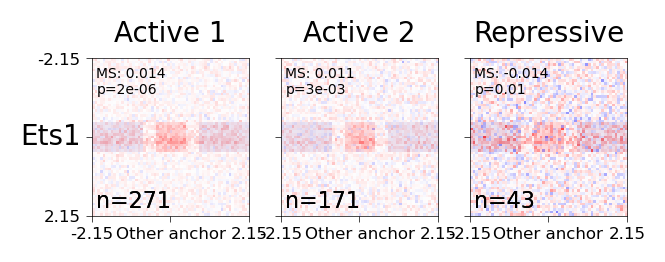

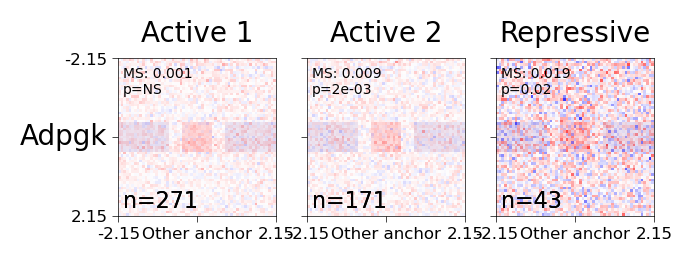

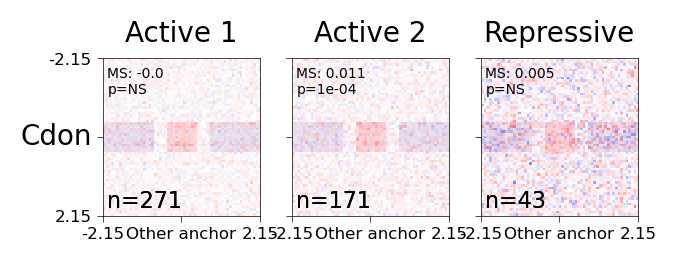

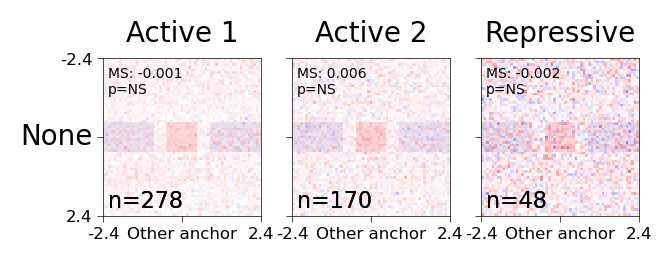

In [303]:
from hub_pileup import plot_pileup_mat

all_results_dicts = {}
for ind in indsoi:
    ms = []
    if (differential_metadata['ind1']==ind).sum()==0:
        continue

    name = get_name(ind, ind_to_gene)
    fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100)
    for c, cluster in enumerate([0, 4, 18]):
        plt.sca(axs[c])
        idx = ( ((differential_metadata['ind1']==ind) & (differential_metadata['cluster2']==cluster)) | 
                ((differential_metadata['ind2']==ind) & (differential_metadata['cluster1']==cluster))
              )
        rows = []
    
        # mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])[:, 30:-26, 30:-26]
        mats = (differential_mat_dict['wt'][idx] - differential_mat_dict['ko'][idx]
               )#[:, 12:-10, 12:-10]
        _, _, results_dict = plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin=-.3, vmax=.3, 
                                             center=5, method='center_square_and_skip',
                                             # show_filts=False
                                             show_filts=True
                       )
        all_results_dicts[f'{name}_{cluster}'] = results_dict
        plt.title(columns_to_names.get(cluster, cluster))
        plt.grid(False)
        plt.text(.03, .05, f'n={idx.sum()}', transform=plt.gca().transAxes, fontsize=8)
        
        
    n = len(mats)
    cutoff = n*50_000/1e6
    mb = mats.shape[1]*50e3 // 2 / 1e6
    x1, x2 = all_ind_to_region[ind][1], all_ind_to_region[ind][2]
    xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)
    
    for c, a in enumerate(axs):
        plt.sca(axs[c])
    
        plt.yticks([-mb, 0, mb])
        plt.gca().set_yticklabels([-cutoff, f'{name}', cutoff])
        plt.gca().get_yticklabels()[1].set_fontsize(10)
        plt.gca().get_yticklabels()[1].set_rotation(0)
        plt.gca().get_yticklabels()[1].set_va('center')
    
        plt.gca().set_xticks([-mb, 0, mb])
        plt.gca().set_xticklabels([-cutoff, "Other anchor", cutoff])
    
        a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
        if c % n != 0 :
            plt.gca().tick_params(labelleft=False)

In [298]:
scipy.stats.ranksums(all_results_dicts['Ets1_4']['v_middle'],
                     all_results_dicts['Ets1_4']['v_outside'])


scipy.stats.ranksums(all_results_dicts['Cdon_4']['v_middle'],
                     all_results_dicts['Cdon_4']['v_outside'])

RanksumsResult(statistic=3.8529950794801158, pvalue=0.00011668173616789875)

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/

(-0.1, 0.1)

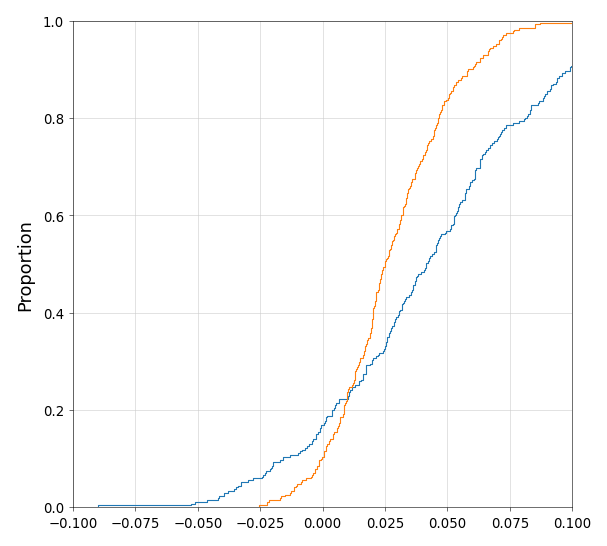

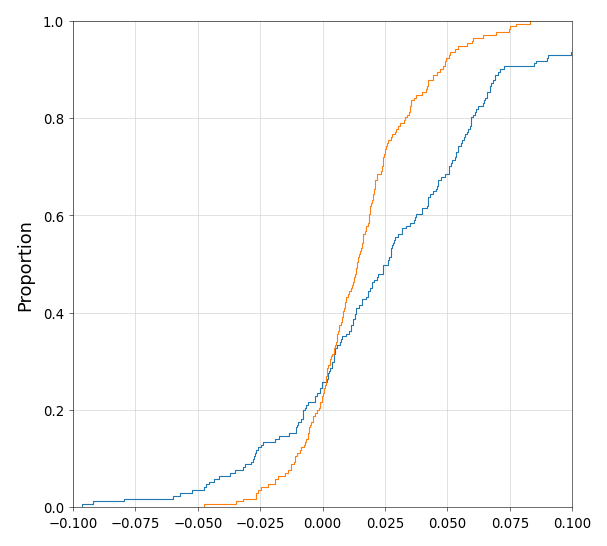

In [302]:

plt.figure()
sns.ecdfplot(all_results_dicts['Ets1_0']['v_middle'])
sns.ecdfplot(all_results_dicts['Ets1_0']['v_outside'])

# sns.ecdfplot(all_results_dicts['Cdon_4']['v_middle'])
plt.xlim([-.1, .1])

plt.figure()
sns.ecdfplot(all_results_dicts['Ets1_4']['v_middle'])
sns.ecdfplot(all_results_dicts['Ets1_4']['v_outside'])

# sns.ecdfplot(all_results_dicts['Cdon_4']['v_outside'])
plt.xlim([-.1, .1])


In [ ]:
    inside_filt, outside_filt = make_outside_filt(n//2, center, center_only=center_only)
    (v_middle, v_outside) = get_inside_outside(mats, inside_filt, outside_filt)
    stat, p, delta, _, _ = test_inside_outside_baseline(v_middle, v_outside,)


In [ ]:
            inside_filt, outside_filt = make_sideways_filt(submat.shape[1]//2, 5, delta=20)
            v_middle, v_outside = get_inside_outside(submat, inside_filt, outside_filt)
            stat, p, delta, _, _ = test_inside_outside_baseline(v_middle, v_outside, cliplo=-1, cliphigh=10)


### Check whether entire hub is affected in Golnaz

In [441]:
df = pd.DataFrame([goodinds, merged_clustdict['all']]).T
df = df[df[1].isin(merged_inds_to_subset)]
df.columns = ['ind', 'cluster']
df['chrom'] = [all_ind_to_region[x][0] for x in df['ind'].values]
df['chrom'] = df['chrom']


In [443]:
%autoreload 2
from hub_pileup import *
from compute_differential_hic_hub import *
from collections import defaultdict
from make_figure4 import *
import itertools
import cooler


from collections import defaultdict
from make_figure4 import *
from hub_pileup import *
import itertools

megaloop_pileup_cooldict = cooldict_25kb
padding_size = 50

inter_all_mat_dict, inter_all_metadata = pileup_bins_with_hub(df, megaloop_pileup_cooldict, 
                                                              {x : y for x, y in chrom_to_start.items()}, 
                                                              inter_and_intra_connections_treg, 
                                                              inter_and_intra_connections_tcon, 
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 25_000)

Done with 10
Done with 11
Done with 11
Done with 12
Done with 12
Done with 12
Done with 13
Done with 13
Done with 13
Done with 13
Done with 14
Done with 14
Done with 14
Done with 14
Done with 14
Done with 15
Done with 15
Done with 15
Done with 15
Done with 15
Done with 15
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with

wt


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:343: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:380: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.get_yticklabels()[1].set_va('center')


ko


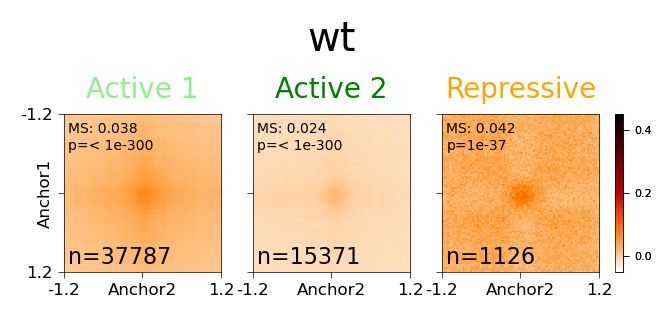

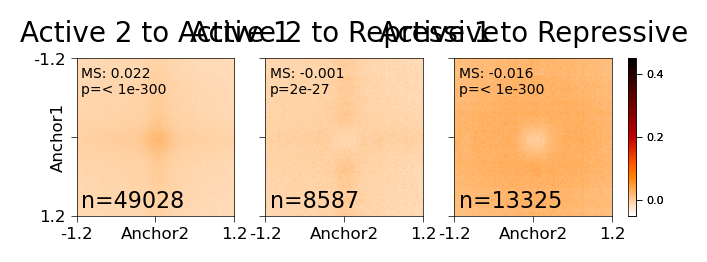

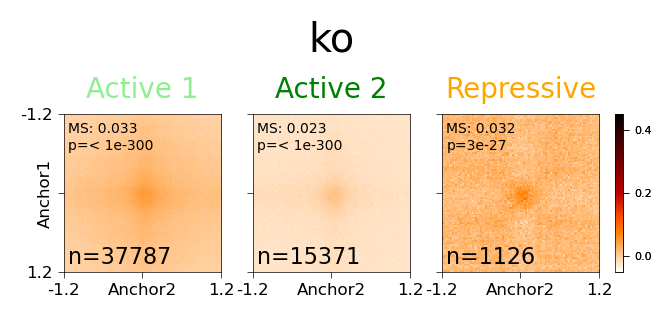

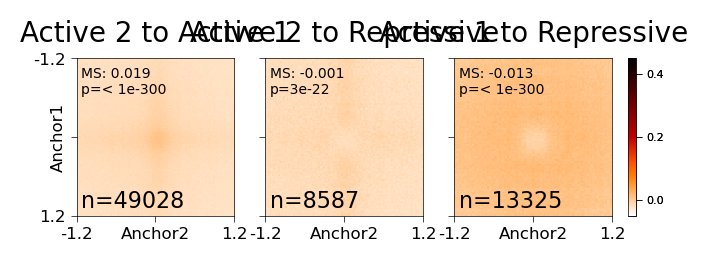

In [464]:
from hub_pileup import *
!mkdir -p plots/inter_saka_pileup

newline = '\n'
# all_results_dicts = {}
for key in inter_all_mat_dict:
    print(key)
    (fig_within_cluster, fig_between_cluster), results = plot_cluster_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(),
                                     res = 25_000,
                                     vmax = .45,
                                     vmin = -.05,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 1, s2 = None,
                                     center = 5,
                                     center_method='None'
                                    )
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    # fig_within_cluster.savefig(f'./plots/inter_saka_pileup/{key}_within_cluster.pdf', bbox_inches='tight')
    # fig_between_cluster.savefig(f'./plots/inter_saka_pileup/{key}_between_cluster.pdf', bbox_inches='tight')
    all_results_dicts[key] = results

file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
Barx2
Ets1
Fli1
Kcnj5
Arhgap32
Kcnj1
(0, 41, 41)
(0, 41, 41)


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:318: RuntimeWarning: Mean of empty slice
  mat = np.nanmean(mats, axis=0)
/Genomics/pritykinlab/gabe/jupys/tregs/./code/compute_differential_hic_hub.py:104: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(v_middle.clip(cliplo, cliphigh)) - np.nanmean(v_outside.clip(cliplo, cliphigh))
/tmp/ipykernel_2161143/2287799554.py:35: RuntimeWarning: Mean of empty slice
  m = np.nanmean(ets1_all_mat_dict[key][idx], axis=0)
/tmp/ipykernel_2161143/2287799554.py:44: RuntimeWarning: Mean of empty slice
  m = np.nanmean(ets1_all_mat_dict[key][idx], axis=0)


file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
Barx2
Ets1
Fli1
Kcnj5
Arhgap32
Kcnj1
(0, 41, 41)
(0, 41, 41)
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
Barx2
Ets1
Fli1
Kcnj5
Arhgap32
Kcnj1
(0, 41, 41)
(0, 41, 41)
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
Barx2
Ets1
Fli1
Kcnj5
Arhgap32
Kcnj1
(0, 41, 41)
(0, 41, 41)


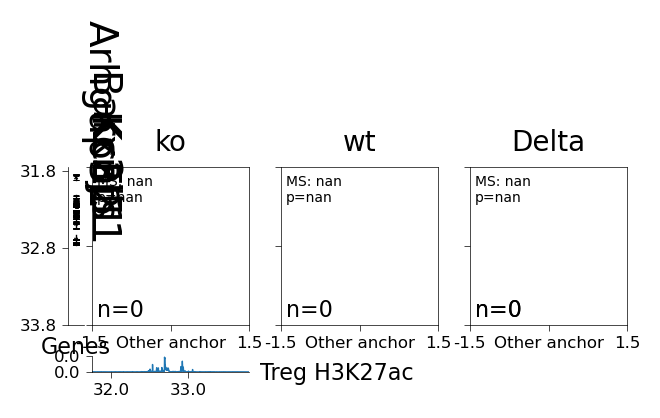

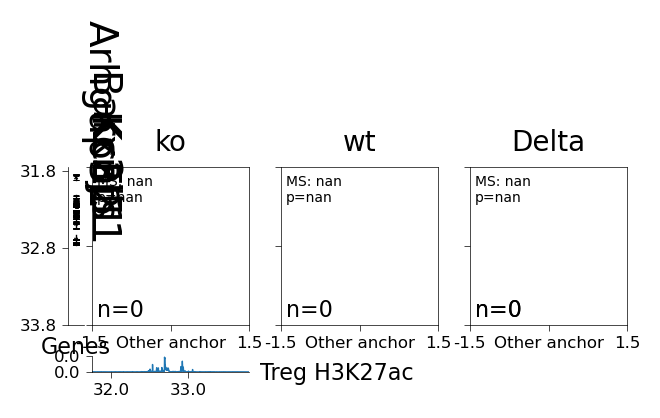

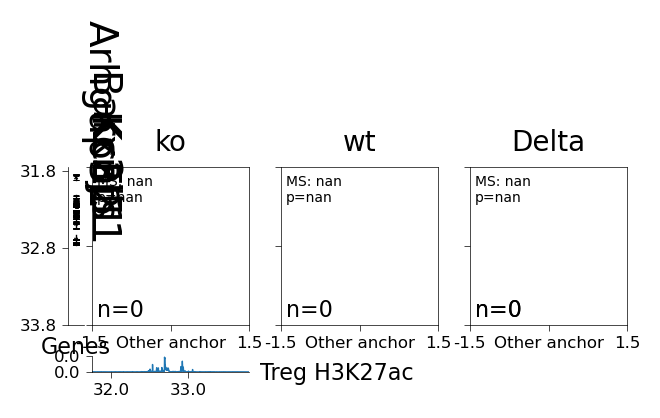

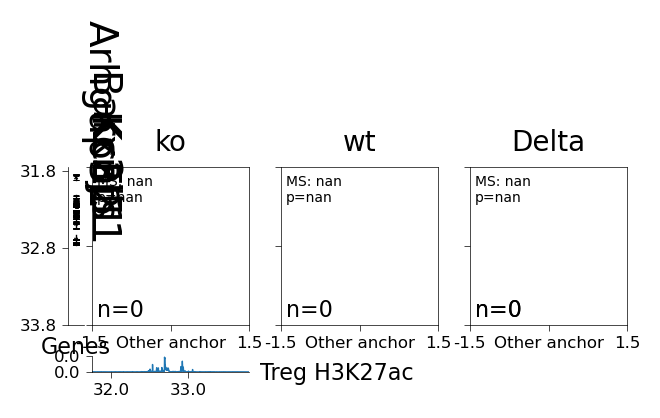

In [119]:
ind = 6058
ms = []
name = 'Ets1'
ignore_set = set()
for cluster in [4, 0, 18, 'A comp.']:
    idx = ( ((ets1_all_metadata['ind1']==ind) & (ets1_all_metadata['cluster2']==cluster)) | 
            ((ets1_all_metadata['ind2']==ind) & (ets1_all_metadata['cluster1']==cluster))
          )
    rows = []
    keys = [ 'wt',  'ko']
    keys = [ 'ko',  'wt']

    fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100)
    plt.sca(axs[0])

    base = (5217-chrom_to_start['9'])*5
    l1, l2 = (base - 30 + 10)*50_000, (base + 31 - 10)*50_000
    place = ('9', l1, l2)
    newax = add_GTF_to_L_axis(place, plt.gca(), ignore_set = ignore_set)
    newax.set_ylim([l2, l1])
    newax.set_xlim([-1, 1])
    newax.grid(False)
    
    newax = add_bigwig_to_axis(place, bwdict, plt.gca(), basey=-.3)[0]

    newax.set_xlim([l1, l2])
    newax.set_yticks([0, 80])
    newax.grid(False)

    for c, key in enumerate(keys):
        plt.sca(axs[c])
        mats = (ets1_all_mat_dict[key])[idx][:, 10:-10, 10:-10]
        print(mats.shape)
        plot_pileup_mat(mats, axs[c], cmap = 'gist_heat_r', vmin=-.05, vmax=.25)
        m = np.nanmean(ets1_all_mat_dict[key][idx], axis=0)
        ms.append(m)
        n = len(m)//2
        plt.grid(False)
        plt.sca(axs[c])
        plt.title(f'{key}')
    plt.sca(axs[2])
    mats = (ets1_all_mat_dict['wt'][idx] - ets1_all_mat_dict['ko'][idx])[:, 10:-10, 10:-10]
    plot_pileup_mat(mats,  axs[2], cmap = 'coolwarm', vmin=-.1, vmax=.1)
    m = np.nanmean(ets1_all_mat_dict[key][idx], axis=0)
    ms.append(m)

    plt.title("Delta")
    plt.grid(False)
    plt.text(.03, .05, f'n={idx.sum()}', transform=axs[2].transAxes, fontsize=8)
    
    x1, x2 = all_ind_to_region[5217][1], all_ind_to_region[5217][2]
    xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)
    
    cutoff = n*50_000/1e6
    mb = mats.shape[1]*50e3 // 2 / 1e6
    for c, a in enumerate(axs):
        plt.sca(axs[c])

        plt.yticks([-mb, 0, mb])
        plt.gca().set_yticklabels(['', '', ''])
        plt.gca().get_yticklabels()[1].set_fontsize(10)
        plt.gca().get_yticklabels()[1].set_rotation(0)
        plt.gca().get_yticklabels()[1].set_va('center')

        plt.gca().set_xticks([-mb, 0, mb])
        plt.gca().set_xticklabels([-cutoff, "Other anchor", cutoff])

        a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
        if c % n != 0 :
            plt.gca().tick_params(labelleft=False)
    fig.savefig(f'./plots/GOLNAZ/ets1_ko_{cluster}.pdf', bbox_inches='tight')


<Axes: ylabel='Count'>

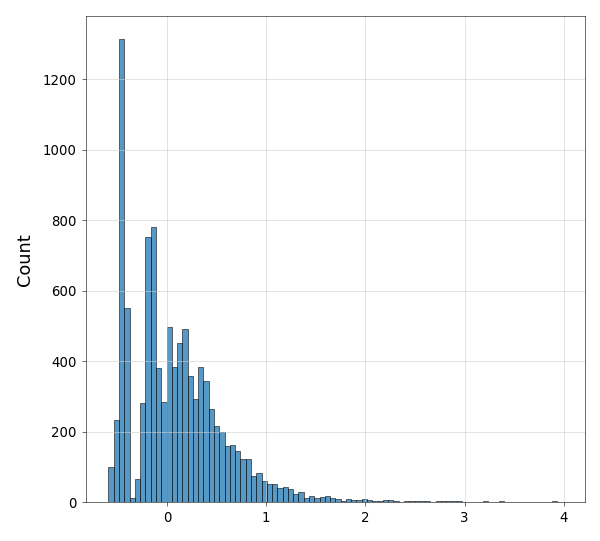

In [1299]:
sns.histplot(ets1_oe_mat_dict['wt'][5217])

Text(0.5, 1.0, 'Bins with High WT\xa0O/E with Ets1')

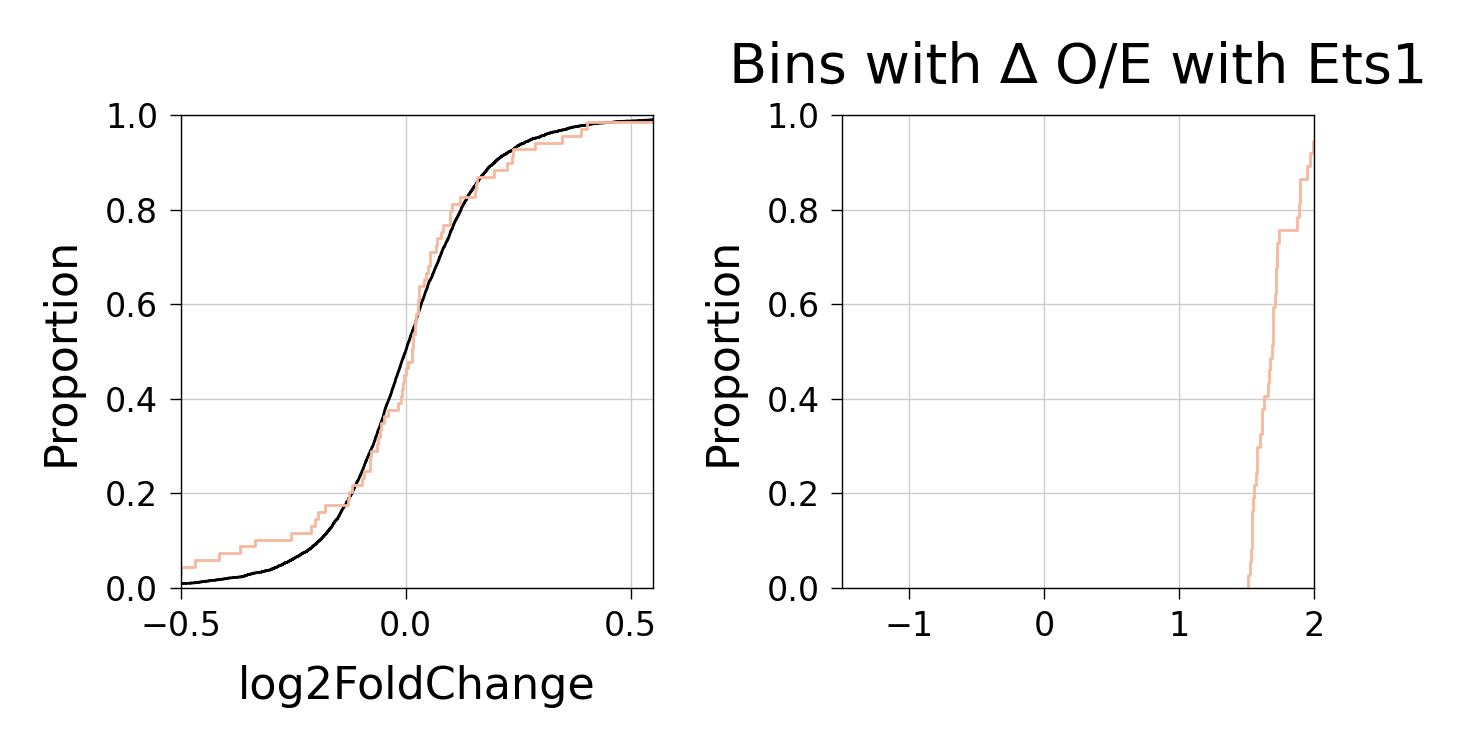

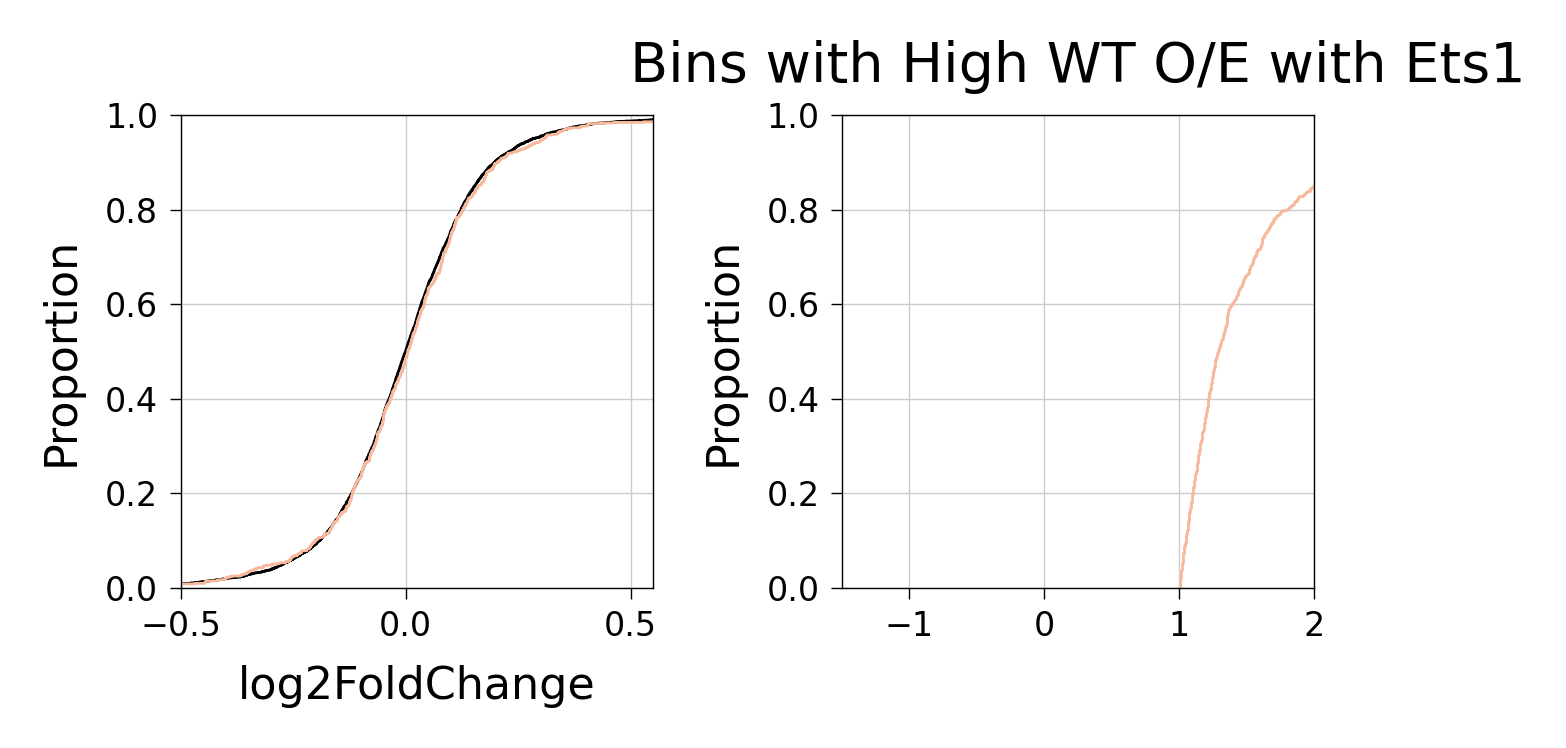

In [1302]:
d = (ets1_oe_mat_dict['wt'] - ets1_oe_mat_dict['ko'])[5217]
idx = np.where( d > 1.5)[0]
genes_in_cluster = list(itertools.chain(*[ind_to_gene.get(x, []) for x in idx]))
genes_in_cluster = [x for x in genes_in_cluster if x in df1.index]

fig, axs = init_subplots_exact(2, 1, fgsz=(30*mm, 30*mm), dpi=200, xspace=1.4)
sns.ecdfplot(df1['log2FoldChange'], color='black', ax=axs[0])
sns.ecdfplot(df1.loc[genes_in_cluster]['log2FoldChange'], ax=axs[0], c=colors[c-1])
sns.ecdfplot(d[idx], ax=axs[1], c=colors[c-1])

axs[0].set_xlim([-.5, .55])
axs[1].set_xlim([-1.5, 2])
plt.title("Bins with ∆ O/E with Ets1")


d = (ets1_oe_mat_dict['wt'])[5217]
idx = np.where( d > 1)[0]
genes_in_cluster = list(itertools.chain(*[ind_to_gene.get(x, []) for x in idx]))
genes_in_cluster = [x for x in genes_in_cluster if x in df1.index]

fig, axs = init_subplots_exact(2, 1, fgsz=(30*mm, 30*mm), dpi=200, xspace=1.4)
sns.ecdfplot(df1['log2FoldChange'], color='black', ax=axs[0])
sns.ecdfplot(df1.loc[genes_in_cluster]['log2FoldChange'], ax=axs[0], c=colors[c-1])
sns.ecdfplot(d[idx], ax=axs[1], c=colors[c-1])

axs[0].set_xlim([-.5, .55])
axs[1].set_xlim([-1.5, 2])
plt.title("Bins with High WT O/E with Ets1")

In [ ]:
i

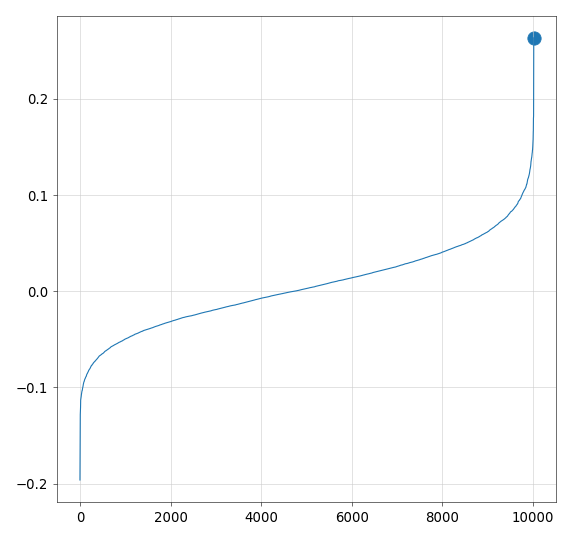

In [514]:
x, y = stat_df['Active 2'].sort_values().dropna().reset_index().values.T
plt.plot(y)

idx = x == 5217
plt.scatter(np.where(idx)[0], y[idx])
plt.gca()

/tmp/ipykernel_1340549/3276829006.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, name, cutoff])
/tmp/ipykernel_1340549/3276829006.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])


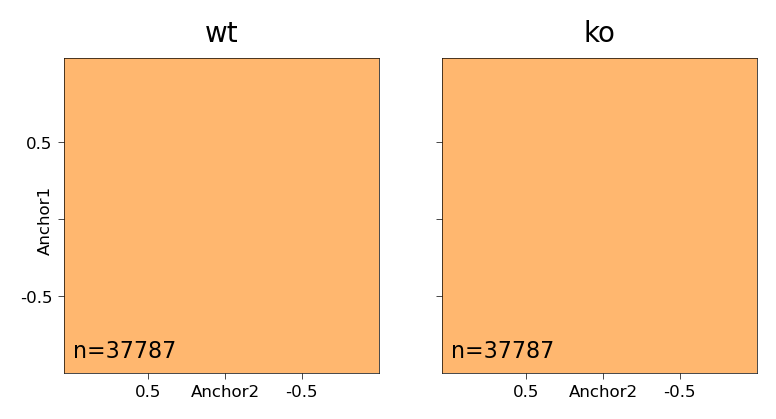

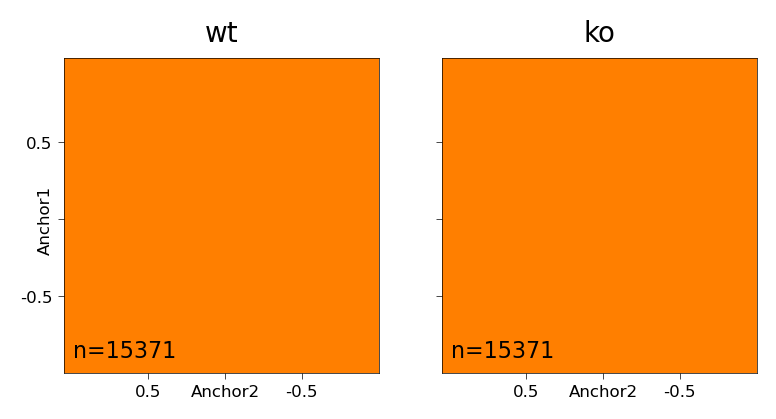

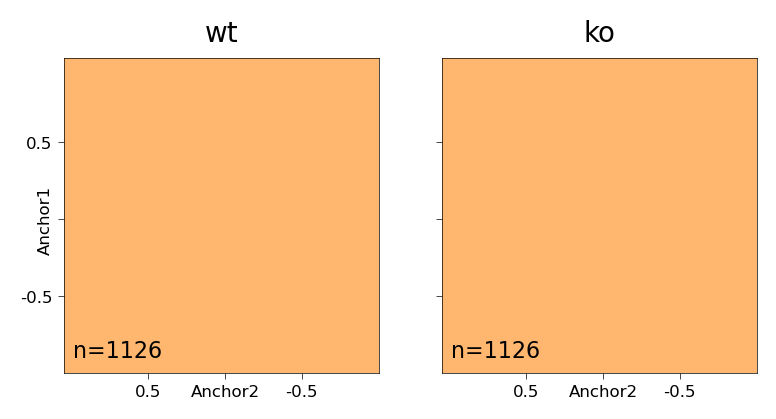

In [1073]:
vmins = [-.05, -.1, -.05]
vmaxes = [.3, .3, .3]
ms = []
for c2, cluster in enumerate([0, 4, 18]):
    idx = ( ((ets1_all_metadata['cluster1']==cluster) & (ets1_all_metadata['cluster2']==cluster)))
    keys = [ 'wt', 'ko']
    fig, axs = init_subplots_exact(2, 1, fgsz=(40*mm, 40*mm), dpi = 100,
                                  yspace=1.3)
    for c, key in enumerate(keys):
        plt.sca(axs[c])
        mats = ets1_all_mat_dict[key]
        u1 = u2 = cluster
        plot_pileup_mat(mats, idx, axs[c], vmax=vmaxes[c2], vmin=vmins[c2])
        ms.append(np.nanmean(mats[idx], axis=0))
        plt.title(key)

    for c, a in enumerate(axs):
        cutoff = np.round(-n//2*50/1e3, 1)
        a.grid(False)
        a.set_xticks([-n//2, 0, n//2])
        if c == 0:
            a.set_yticklabels([-cutoff, name, cutoff])
            a.set_yticklabels([-cutoff, "Anchor1", cutoff])
        else:
            a.set_yticklabels([])
        a.set_yticks([-n//2, 0, n//2])
        a.set_xticklabels([-cutoff, "Anchor2", cutoff])
        a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
        a.get_yticklabels()[1].set_rotation(90)
        a.get_yticklabels()[1].set_va('center')

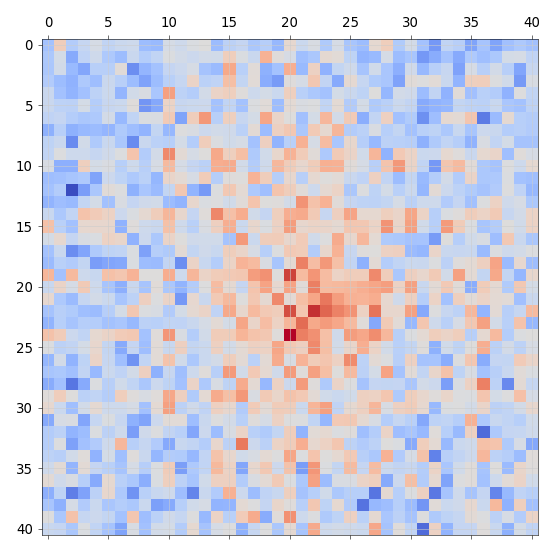

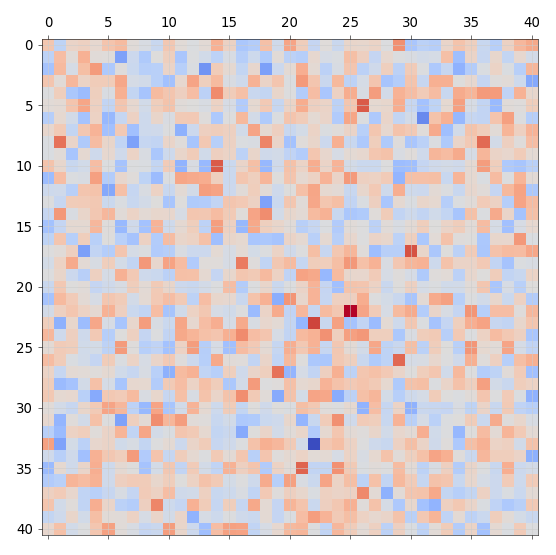

In [1077]:
plt.matshow(ms[0]-ms[1], cmap='coolwarm')
plt.matshow(ms[2]-ms[3], cmap='coolwarm')

/tmp/ipykernel_1340549/1535299844.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, name, cutoff])
/tmp/ipykernel_1340549/1535299844.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])


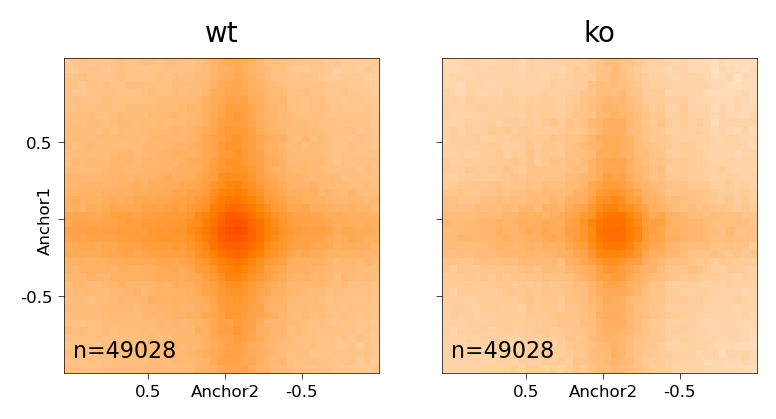

In [834]:
idx = ( ((metadata_df['cluster1']==0) & (metadata_df['cluster2']==4)) | 
        ((metadata_df['cluster1']==4) & (metadata_df['cluster2']==0))
      )
keys = [ 'wt', 'ko']
fig, axs = init_subplots_exact(2, 1, fgsz=(40*mm, 40*mm), dpi = 100,
                              yspace=1.3)
for c, key in enumerate(keys):
    plt.sca(axs[c])
    mats = ets1_all_mat_dict[key]
    u1 = u2 = cluster
    plot_pileup_mat(mats, idx, axs[c], vmax=vmaxes[c2], vmin=vmins[c2])
    plt.title(key)

for c, a in enumerate(axs):
    cutoff = np.round(-n//2*50/1e3, 1)
    a.grid(False)
    a.set_xticks([-n//2, 0, n//2])
    if c == 0:
        a.set_yticklabels([-cutoff, name, cutoff])
        a.set_yticklabels([-cutoff, "Anchor1", cutoff])
    else:
        a.set_yticklabels([])
    a.set_yticks([-n//2, 0, n//2])
    a.set_xticklabels([-cutoff, "Anchor2", cutoff])
    a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
    a.get_yticklabels()[1].set_rotation(90)
    a.get_yticklabels()[1].set_va('center')


### Intra megaloops

In [318]:
from hub_pileup import *
from make_figure4 import *

inds_with_ets1_megaloop = {5142, 5145, 5186, 5250, 5255, 5280, 5340, 5362, 5397, 5399, 5439, 5471, 5543, 5547, 5550, 5551, 5566}

megaloop_pileup_cooldict
pileup_cluster_df = pd.DataFrame()
pileup_cluster_df['ind'] = list(inds_with_ets1_megaloop)
pileup_cluster_df['cluster'] = 'Ets1_megaloop'
pileup_cluster_df['chrom'] = '9'

all_mat_dict, all_metadata = pileup_bins_at_once_intra(pileup_cluster_df, megaloop_pileup_cooldict, chrom_to_start, inter_and_intra_connections_treg, 
                                inter_and_intra_connections_tcon, resolution_in=250_000, resolution_out = 50_000, intra=True, inter=False, 
                                padding_size=15
                                                      )

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:134: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 9


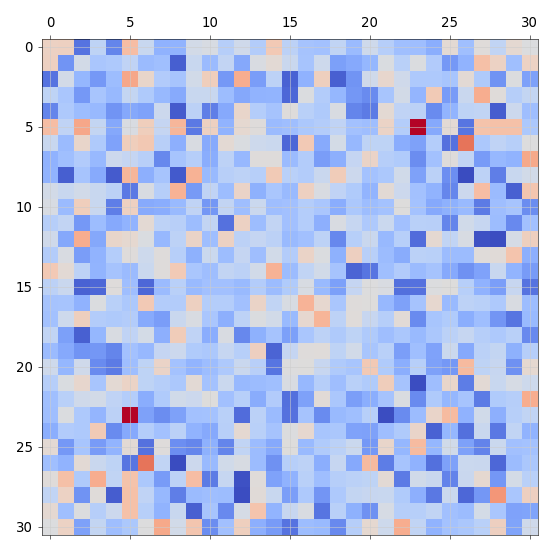

In [325]:
plt.matshow(np.nanmean(all_mat_dict['wt'], axis=0) - np.nanmean(all_mat_dict['ko'], axis=0))

In [ ]:
def fetch_sra_numbers_from_gse(gse_id):
    Entrez.email = "your.email@example.com"  # Provide your email address
    handle = Entrez.esearch(db="gds", term=gse_id)
    record = Entrez.read(handle)
    handle.close()
    gds_id = record["IdList"][0]

    handle = Entrez.esummary(db="gds", id=gds_id)
    summary = Entrez.read(handle)
    handle.close()

    sra_numbers = []
    for sample in summary[0]['Samples']:
        accession = sample['Accession']
    return sra_numbers



In [177]:
from pysradb.sraweb import SRAweb

def get_srx_from_gsm(gsm_id):
    # Fetch the GEO record for the given GSM ID
    db = SRAweb()
    srx_accessions = db.gsm_to_srr(gsm_id)
    return srx_accessions


In [178]:
from Bio import Entrez

def fetch_sra_numbers_from_gse(gse_id):
    Entrez.email = "gdolsten@princeton.edu"  # Provide your email address
    handle = Entrez.esearch(db="gds", term=gse_id)
    record = Entrez.read(handle)
    handle.close()
    gds_id = record["IdList"][0]

    handle = Entrez.esummary(db="gds", id=gds_id)
    summary = Entrez.read(handle)
    handle.close()

    rows = []
    for sample in summary[0]['Samples']:
        gsm_id, title = sample['Accession'], sample['Title']
        sras = get_srx_from_gsm(gsm_id)
        sras['title'] = title
        rows.append(sras)
    return rows

# Example usage:
gse_id = "GSE211177"  # Replace with the GSE series ID you're interested in
sra_numbers = fetch_sra_numbers_from_gse(gse_id)
# print("SRA Numbers for", gse_id, ":", sra_numbers)


In [180]:
accessions = pd.concat(sra_numbers, axis=0)
accessions['title'] = accessions['title'].replace('-', '_')
accessions['replicate'] = [x[-11:-1].lower() for x in accessions['title']]
accessions['condition'] = [x[8:-12].lower() for x in accessions['title']]
accessions.to_csv('/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/rudensky_scrna/prelim-analysis/bulk_rna_data/accessions/golnaz_ets1_GSE211177.csv')

### Th1

In [2]:

pref = 'rudensky_scrna/prelim-analysis/bulk_rna_data/counts/'

filedict = {
    'th1_wt.rep1b_rep1' : pref + 'golnaz_ets1_GSE211177.SRR21038461.th1_wt.rep1b_rep1_counts.txt',
    'th1_ets1-se-ko.rep1b_rep1' : pref + 'golnaz_ets1_GSE211177.SRR21038458.th1_ets1-se-ko.rep1b_rep1_counts.txt',
    'th1_wt.rep1b_rep3' : pref + 'golnaz_ets1_GSE211177.SRR21038459.th1_wt.rep1b_rep3_counts.txt',
    'th1_wt.rep1b_rep2' : pref + 'golnaz_ets1_GSE211177.SRR21038460.th1_wt.rep1b_rep2_counts.txt',
    'th1_ets1-se-ko.rep1b_rep2' : pref + 'golnaz_ets1_GSE211177.SRR21038457.th1_ets1-se-ko.rep1b_rep2_counts.txt',
    'th1_ets1-se-ko.rep1b_rep3' : pref + 'golnaz_ets1_GSE211177.SRR21038456.th1_ets1-se-ko.rep1b_rep3_counts.txt',
}
count_df = pd.DataFrame()
for name, file in filedict.items():
    df = pd.read_csv(file, sep='\t', skiprows=1).set_index("Geneid")
    count_df[name] = df.iloc[:, -1]
count_df = count_df.loc[count_df.sum(axis=1) > 100]
count_df.to_csv('/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/rudensky_scrna/prelim-analysis/bulk_rna_data/DESeq2/golnaz_th1_count_df.csv')
count_df_th1 = count_df

NameError: name 'pd' is not defined

In [202]:
from scipy.stats import zscore
zscore_df = count_df.apply(zscore, axis=1)

In [204]:
zscore_df = zscore_df.dropna()

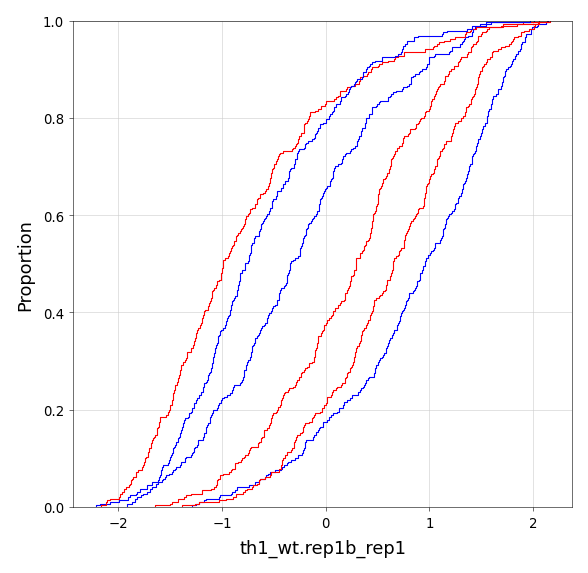

In [233]:
for col in zscore_df:
    v = zscore_df.loc[genes_in_cluster, col]
    if 'se-ko' in col:
        color = 'red'
    else:
        color = 'blue'
    sns.ecdfplot(v, color=color)

### Th2

In [130]:
pref = 'rudensky_scrna/prelim-analysis/bulk_rna_data/counts/'

filedict = {
    'th2_ets1-se-ko.rep1b_rep3' : pref + 'golnaz_ets1_GSE211177.SRR21038450.th2_ets1-se-ko.rep1b_rep3_counts.txt',
    'th2_ets1-se-ko.rep1b_rep2' : pref + 'golnaz_ets1_GSE211177.SRR21038451.th2_ets1-se-ko.rep1b_rep2_counts.txt',
    'th2_ets1-se-ko.rep1b_rep1' : pref + 'golnaz_ets1_GSE211177.SRR21038452.th2_ets1-se-ko.rep1b_rep1_counts.txt',
    'th2_wt.rep1b_rep3' : pref + 'golnaz_ets1_GSE211177.SRR21038453.th2_wt.rep1b_rep3_counts.txt',
    'th2_wt.rep1b_rep2' : pref + 'golnaz_ets1_GSE211177.SRR21038454.th2_wt.rep1b_rep2_counts.txt',
    'th2_wt.rep1b_rep1' : pref + 'golnaz_ets1_GSE211177.SRR21038455.th2_wt.rep1b_rep1_counts.txt',
}
count_df = pd.DataFrame()
for name, file in filedict.items():
    df = pd.read_csv(file, sep='\t', skiprows=1).set_index("Geneid")
    count_df[name] = df.iloc[:, -1]
count_df = count_df.loc[count_df.sum(axis=1) > 100]
count_df.to_csv('/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/rudensky_scrna/prelim-analysis/bulk_rna_data/DESeq2/golnaz_th2_count_df.csv')
count_df_th2 = count_df

In [131]:
import pandas as pd
deseq_out_pref = '/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/rudensky_scrna/prelim-analysis/bulk_rna_data/DESeq2/output/'
df1 = pd.read_csv(deseq_out_pref + 'golnazEts1Th1_ko_vs_wt_thresh=0.csv', sep=' ', index_col=0)
df2 = pd.read_csv(deseq_out_pref + 'golnazEts1Th2_ko_vs_wt_thresh=0.csv', sep=' ', index_col=0)



In [132]:
df_active1 = pd.read_csv('./golnaz_ets1/active1_gene_names.csv', index_col=0)
df_active2 = pd.read_csv('./golnaz_ets1/active2_gene_names.csv', index_col=0)
df_repr = pd.read_csv('./golnaz_ets1/repr_gene_names.csv', index_col=0)
df_active1.columns = ['gene', 'bin', 'ind']
df_active2.columns = ['gene', 'bin', 'ind']
df_repr.columns = ['gene', 'bin', 'ind']

In [134]:
genes = pd.Series(['Gpr83', 'Izumo1r', 'Fut4', 'Gm16302', 'Ankrd49', 'Mre11a', 'Gm16379', 'Crtam', 'Ubash3b','Rexo2', 'Gm5617', 'Nxpe4', 'Rbm7', 
         'Gm5616', 'Nxpe2','Zbtb16','Khdc3', 'Gm5745', 'Gm38192', 'Gm38215', 'Gm27353', 'Ccpg1', 'Pigb', 'Rab27a', 'Rsl24d1','Gnb5', 
         'Tmod3', 'Myo5c', 'Leo1', 'Mapk6','Gclc', 'Elovl5','Ddx43', 'Gsta2', 'Gm10639', 'Gm8093', 'Mto1', 'Eef1a1', 'Mb21d1', 'Gm17324',
         'Ppp2r3a', 'Pccb', 'Gm38344', 'Gm37314', 'Msl2', 'Gm37962', 'Gm37553', 'Gm37953', 'Gm37621','Ccr4', 'Tmppe', 'Bcl2a1c', 'Glb1', 
         'Trim71', 'Gm23232', 'Dync1li1', 'Cmtm6', 'Cnot10','Tgfbr2', 'Gm9385', 'Gadl1', 'Gm16142',
        ])

In [135]:
cluster = 4
d = 3
active2_loadings = []
for u in np.unique(list(ets1_all_metadata['ind1']) + list(ets1_all_metadata['ind2'])):
    idx = ( ((ets1_all_metadata['ind1']==u) & (ets1_all_metadata['cluster2']==cluster)) | 
            ((ets1_all_metadata['ind2']==u) & (ets1_all_metadata['cluster1']==cluster))
          )
    m = np.nanmean(ets1_all_mat_dict['wt'][idx], axis=0)
    active2_loading = np.nanmean(m[20-d:20+d+1, 20-d:20+d+1])
    active2_loadings.append([u, active2_loading])

/tmp/ipykernel_2161143/2803905146.py:8: RuntimeWarning: Mean of empty slice
  m = np.nanmean(ets1_all_mat_dict['wt'][idx], axis=0)
Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7fca28b796c0>
Traceback (most recent call last):
  File "/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 

KeyboardInterrupt



In [807]:
# good_active_2 = good_active_2[good_active_2.isin(goodinds[merged_clustdict['all']==4])]

active2_loading_df = pd.DataFrame(active2_loadings).sort_values(1).set_index(0)[1]
active2_loading_df = active2_loading_df.drop(5217)
good_active_2 = active2_loading_df.index[active2_loading_df>0.04]
good_active_2 = good_active_2[good_active_2.isin(df_active2['ind'])]

In [147]:
# tmpdf = df_active2.set_index('ind').loc[good_active_2].reset_index()
# tmpdf = df_active1
# genes_in_cluster_active1 = tmpdf['gene'].values

genes_in_cluster_active1 = df_active1['gene'].values
genes_in_cluster_active1 = [x for x in genes_in_cluster_active1 if x in df1.index]

genes_in_cluster_active2 = tmpdf['gene'].values
# tmpdf = df_active2.set_index('ind').loc[good_active_2].reset_index()
# genes_in_cluster_active2 = tmpdf['gene'].values
genes_in_cluster_active2 = df_active2['gene'].values
genes_in_cluster_active2 = [x for x in genes_in_cluster_active2 if x in df1.index]


acomp_inds = np.where(my_wt_comp > .8)[0]
genes_in_acomp = list(itertools.chain(*[ind_to_gene.get(x, []) for x in acomp_inds]))
genes_in_acomp = [x for x in genes_in_acomp if x in df1.index]


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/

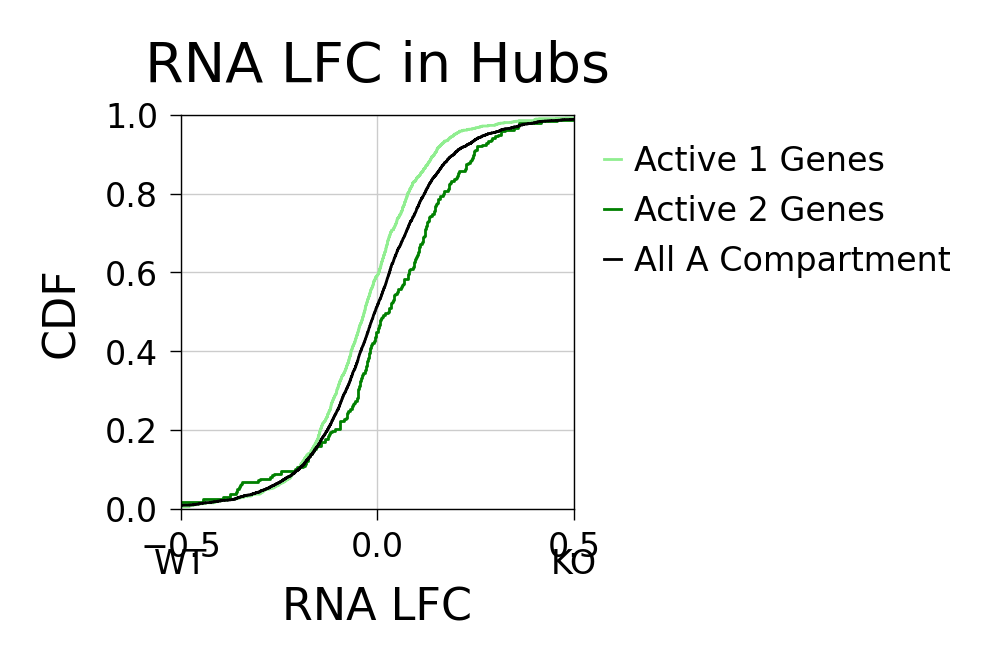

In [149]:
# matched_vals = fetch_mean_matched_values(df1.loc[genes_in_cluster, 'baseMean'], df1.drop(genes_in_cluster).loc[:, 'baseMean']).index


fig, axs = init_subplots_exact(1, 1, fgsz=(25*mm, 25*mm), dpi = 200)
sns.ecdfplot(df1.loc[genes_in_cluster_active1, 'log2FoldChange'], color='lightgreen', label='Active 1 Genes')
# sns.ecdfplot(df1.loc[matched_vals, 'log2FoldChange'], color='lightgray', label='Non-hub genes')
sns.ecdfplot(df1.loc[genes_in_cluster_active2, 'log2FoldChange'], color='green', label='Active 2 Genes')
sns.ecdfplot(df1.loc[genes_in_acomp, 'log2FoldChange'], color='black', label='All A Compartment')



plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left', frameon=False)
plt.title("RNA LFC in Hubs")

plt.xlim([-.5, .5])
plt.xticks([-.5, 0, .5])
plt.xlabel("RNA LFC")
plt.ylabel("CDF")
add_xaxis_labels('WT', 'KO', axs, fontsize=6)
fig.savefig('./plots/GOLNAZ/RNA_HUB.pdf', bbox_inches='tight')

In [1183]:
gene_lengths = pd.read_csv('/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/rudensky_scrna/prelim-analysis/bulk_rna_data/counts/golnaz_ets1_GSE211177.SRR21038430.th1_ets1-se-ko_ets1-rv.rep2b_rep2_counts.txt',
           sep='\t', skiprows=1, index_col=0)['Length']

rc = df1.loc[:, 'baseMean']
rc = rc[rc.index.isin(gene_lengths.index)]
rpkm  = rc/(rc.sum()/1e6)/(gene_lengths.loc[rc.index])*1e3


Text(0.5, 0, 'RPKM')

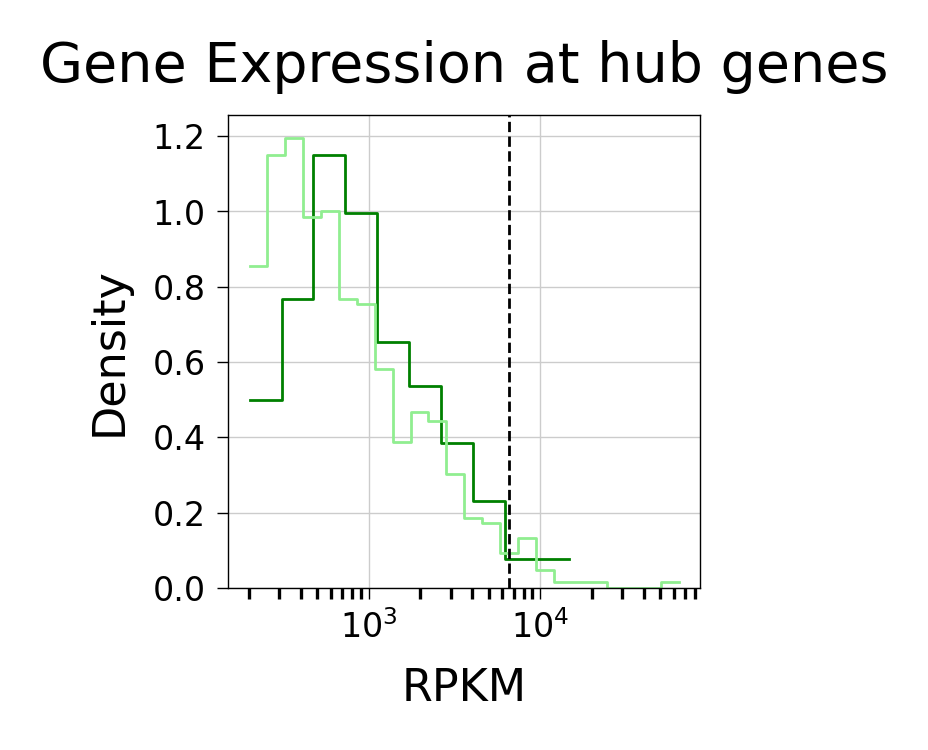

In [1184]:
fig, axs = init_subplots_exact(1, 1, fgsz=(30*mm, 30*mm), dpi = 200)
sns.histplot(df1.loc[genes_in_cluster_active2, 'baseMean'], log_scale=True, element='step', fill=False,
            stat='density', color = 'green')
sns.histplot(df1.loc[genes_in_cluster_active1, 'baseMean'], log_scale=True, element='step', fill=False,
            stat='density', color = 'lightgreen')
plt.axvline(df1.loc['Ets1', 'baseMean'], color='black', linestyle='--')

plt.title('Gene Expression at hub genes')
plt.xlabel("RPKM")

Text(0.5, 0, 'RPKM')

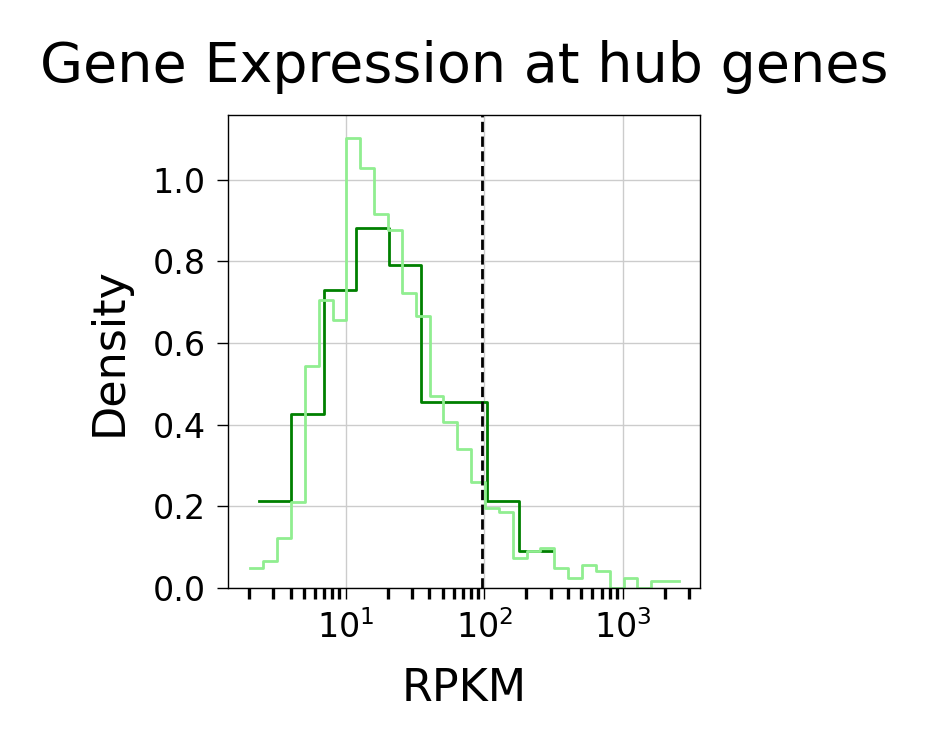

In [1186]:
fig, axs = init_subplots_exact(1, 1, fgsz=(30*mm, 30*mm), dpi = 200)
sns.histplot(rpkm.loc[genes_in_cluster_active2], log_scale=True, element='step', fill=False,
            stat='density', color = 'green')
sns.histplot(rpkm.loc[genes_in_cluster_active1], log_scale=True, element='step', fill=False,
            stat='density', color = 'lightgreen')
plt.axvline(rpkm.loc['Ets1'], color='black', linestyle='--')
plt.title('Gene Expression at hub genes')
plt.xlabel("RPKM")

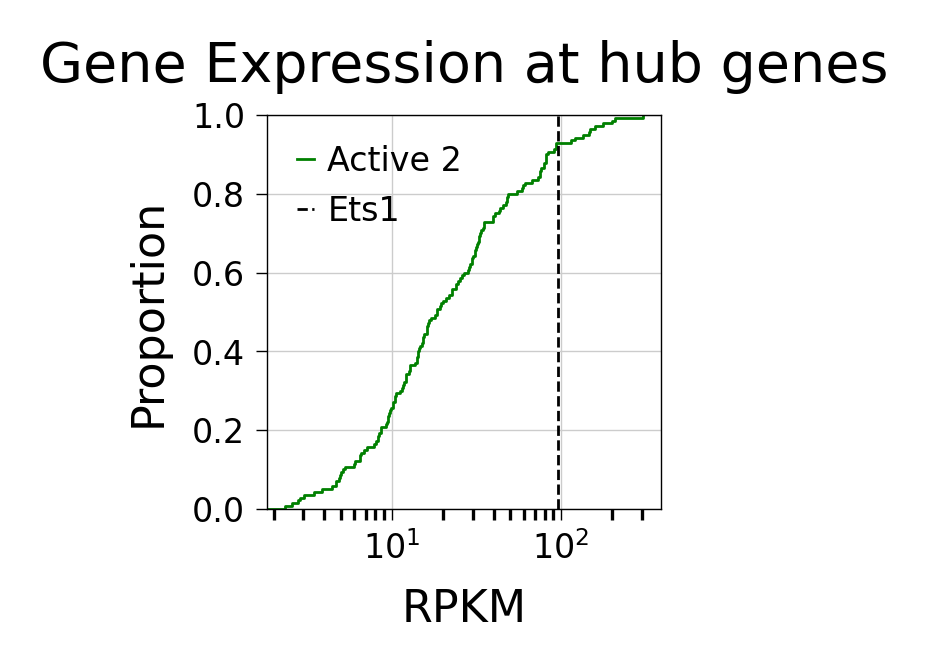

In [1202]:
fig, axs = init_subplots_exact(1, 1, fgsz=(25*mm, 25*mm), dpi = 200)
sns.ecdfplot(rpkm.loc[genes_in_cluster_active2], log_scale=True, label='Active 2', #element='step', fill=False,
             color = 'green')
# sns.ecdfplot(rpkm.loc[genes_in_cluster_active1], log_scale=True, #element='step', fill=False,
             # color = 'lightgreen')
plt.axvline(rpkm.loc['Ets1'], color='black', linestyle='--', label='Ets1')
plt.title('Gene Expression at hub genes')
plt.xlabel("RPKM")
plt.legend(frameon=False)
fig.savefig('./plots/GOLNAZ/rpkm_with_ets.pdf', bbox_inches='tight')

In [1193]:
scipy.stats.pearsonr(rpkm.loc[genes_in_cluster_active1], df1.loc[genes_in_cluster_active1, 'log2FoldChange'])

PearsonRResult(statistic=0.07943160282525966, pvalue=0.005240206687323026)

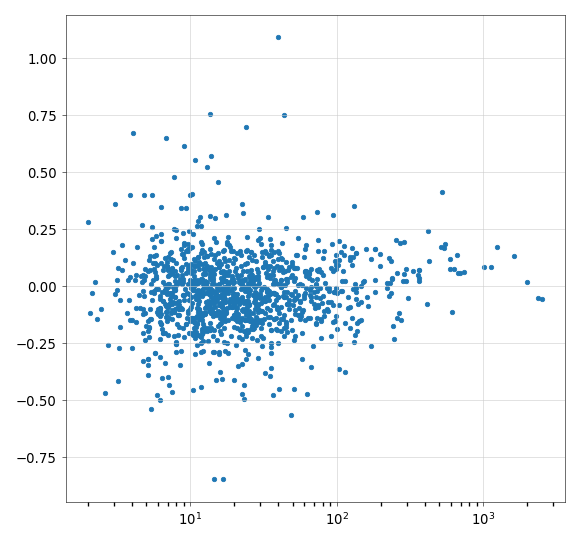

In [1195]:
plt.scatter(rpkm.loc[genes_in_cluster_active1], df1.loc[genes_in_cluster_active1, 'log2FoldChange'],
           s = 4)
plt.xscale('log')

In [781]:
np.power(2, df1.loc[genes_in_cluster, 'log2FoldChange'].median()), np.power(2, df1.loc[genes_in_cluster, 'log2FoldChange'].mean())

(0.977378750696761, 0.9789932238471288)

<Axes: xlabel='log2FoldChange', ylabel='Proportion'>

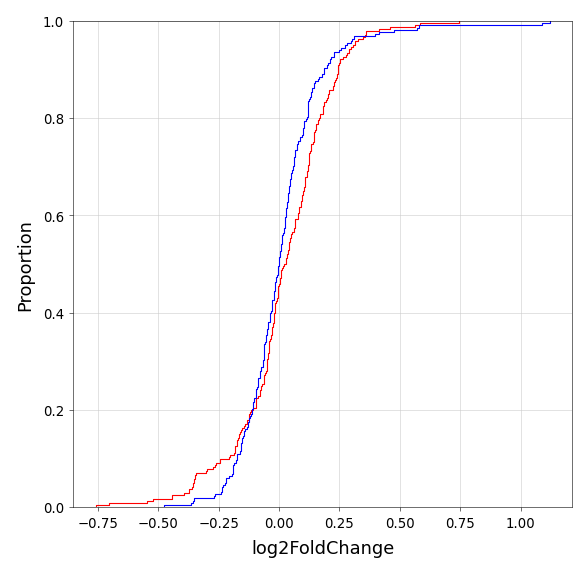

In [551]:
genes_in_cluster = ['Map4k4', 'Hecw2', 'Stk17b', 'Ankrd44', 'Sf3b1', 'Gm24053', 'Ctla4', 'Gm38137', 'Gm37039', 'Icos', 'Gm11581', 'Gm11582', 'Cd28', 'Gm37198', 'Rpl18-ps1', 'Gm11579', 'Gm28112', 'Ikzf2', 'Gm29114', 'Gm29112', 'Gm29336', 'Arl4c', 'Gm19589', 'Gm38130', 'Glrp1', 'Gm37053', 'Bcl2', 'Mir3473f', 'Kdsr', 'Cxcr4', 'Gm6170', 'Gm28556', 'Gm4258', 'Ptprc', 'Fasl', 'Gm37357', 'Gm38304', 'Suco', 'Dnm3', 'Pigc', 'Gm7496', 'Gm17976', 'Gm37856', 'Gm32999', 'Gm37469', 'Creg1', 'Gm16565', 'Cd247', 'Pou2f1', 'Gm23402', 'Gm31728', 'Gm5069', 'Itpkb', 'Gm37390', 'Psen2', 'Gm37033', 'Gm36933', 'Dusp10', 'Ppp2r5a', 'Gm37074', 'Nenf', 'Gm32200', 'Gm2272', 'Tmem206', 'Lamb3', 'Hsd11b1', 'Gm37103', 'Syt14', 'Traf3ip3', 'Gm15872', 'Irf6', 'Diexf', 'Lamb3', 'Gm38118', 'Hsd11b1', 'Camk1g', 'Gm37691', 'G0s2', 'Gm37866', 'Gm13218', 'Gm13294', 'Gm37766', 'Gm36932', 'Prkcq', 'Gm37520', 'Cstad', 'Gm14486', 'Gm14487', 'Fam65c', 'Gm14321', 'Ptpn1', 'Pmepa1', 'Pmepa1os', 'Gm16337', 'Pag1', 'Gm24786', 'Gm5842', 'Gm43672', 'Tbl1xr1', 'Gm20402', 'Gm38034', 'Gm38098', 'Foxo1', 'Gm10293', 'Gm2447', 'Mbnl1', 'Gm37589', 'Gm37488', 'Mbnl1', 'Ift80', 'Smc4', 'Trim59', 'Mir15b', 'Gm22009', 'Mir16-2', 'Kpna4', 'Gm1647', 'Gm37558', 'Ptgfrn', 'Cd101', 'Gm12486', 'Bcl2l15', 'Phtf1', 'Gm43149', 'Gm43387', 'Gm15886', 'Dclre1b', 'Ap4b1', 'Gm15471', 'Rsbn1', 'Hipk1', 'Phtf1os', 'Gm15472', 'Gm15602', 'Ptpn22', 'Gm43065', 'Gm5547', 'Ovgp1', 'Pifo', 'Gm42890', 'Gm43331', 'Rap1a', 'Wdr77', 'Atp5f1', 'Gm43330', 'Gm43329', 'Gm9889', 'S1pr1', 'Gm43106', 'Mir669n', 'Dph5', 'Gm6649', 'Slc30a7', 'Gm43522', 'Gm42997', 'Gm5855', 'Lef1', 'Gm42449', 'Gm43352', 'Hadh', 'Gm16231', 'St6galnac5', 'Gm16213', 'Pigk', 'Tox', 'Chd7', 'Bach2', 'Map3k7', 'Gm11927', 'Bach2it1', 'Bach2', 'Gm12503', 'Gne', 'Mir5106', 'Rnf38', 'Clta', 'Gm12504', 'AI481877', 'Ugcg', 'Dnajc25', 'Gng10', 'Rpsa-ps11', 'Susd1', 'Ptbp3', 'Gm12596', 'Alad', 'Gm11211', 'Gm11209', 'Hdhd3', 'Rgs3', 'Gm11210', 'Pole3', 'Focad', 'Mllt3', 'Gm12646', 'Gm12631', 'Mir491', 'Gm24468', 'Jak1', 'Gm12785', 'Raver2', 'Cachd1', 'Gm3716', 'Gm26761', 'Gm20033', 'Gm20033', 'Klf3', 'Tlr6', 'Fam114a1', 'Tlr1', 'Gm42645', 'Chrna9', 'Gm43769', 'Gm42646', 'Rhoh', 'Gm43004', 'Gm24346', 'N4bp2os', 'N4bp2', 'Gm42648', 'Lrrc8d', 'Lrrc8c', 'Tgfbr3', 'Gm43422', 'Gm43423', 'Clip2', 'Gtf2ird1', 'Gtf2i', 'Gm43481', 'Gm42885', 'Gm42882', 'Gm43480', 'Gm16020', 'Gm13835', 'Gm27019', 'Gm13833', 'Lncpint', 'Gm13834', 'Gm37728', 'Nod1', 'Znrf2', 'Gm44185', 'Ggct', 'Foxp1', 'Gm20705', 'Gm20696', 'Foxp1', 'B4galnt3', 'Ninj2', 'Mir706', 'Wnk1', 'Gm16199', 'Klrb1f', 'BC064078', 'Gm44000', 'Clec2d', 'Gm7457', 'St8sia1', 'Cmas', 'Sult6b2', 'Etnk1', 'Gm31108', 'D6Ertd474e', 'C2cd5', 'Gm45052', 'Gm27252', 'Gm7482', 'Klf13', 'Gm44627', 'Trpm1', 'Gm44722', 'Gm45055', 'Igf1r', 'Pgpep1l', 'Pgpep1l', 'Gm16158', 'Fam169b', 'Gm16157', 'Gm44738', 'Fam174b', 'Chd2', 'Gm44686', 'Gm25282', 'Gm44694', 'Akap13', 'Gm44835', 'Zscan2', 'Nmb', 'Zfp592', 'Gm44649', 'Wdr73', 'Iqgap1', 'Sec11a', 'Gm16171', 'Pde3b', 'Psma1', 'Copb1', 'Leprotl1', 'Mir6395', 'Saraf', 'Gm29243', 'Mboat4', 'Gm10131', 'Dctn6', 'Gm26768', 'D8Ertd82e', 'Lonrf1', 'Rps12-ps24', 'Enpp6', 'Irf2', 'Inpp4b', 'Gm17072', 'Inpp4b', 'Gm17169', 'Wwox', 'Irf2bp2', 'Gm26759', 'Gm26397', 'Rbm34', 'Tomm20', 'Phxr4', 'Gm17571', 'Gm26189', 'Ccdc82', 'Gpr83', 'Izumo1r', 'Fut4', 'Gm16302', 'Ankrd49', 'Mre11a', 'Gm16379', 'Ets1', 'Gm27201', 'Gm37082', 'Fli1', 'Gm37474', 'Gm38346', 'Gm27240', 'Gm27162', 'Gm37192', 'Ets1', 'Gm3331', 'Crtam', 'Ubash3b', 'Gm5921', 'Stt3b', 'Tgfbr2', 'Gm9385', 'Gadl1', 'Gm16142', 'Hivep2', 'Gm26835', 'Gm28289', 'Tnfaip3', 'Sgk1', 'Platr6', 'Themis', 'Ptprk', 'Fyn', 'Gm6963', 'Scml4', 'Gm26860', 'Sec63', 'Smim24', 'Gm16104', 'Nfic', 'Mrpl54', 'Gipc3', 'Tbxa2r', 'Gm16315', 'Mir6913', 'Dohh', 'Celf5', 'Apba3', 'Zfr2', 'Mfsd12', 'Hmg20b', 'Pip5k1c', 'Matk', 'S1pr4', 'Cactin', 'Tjp3', 'Ncln', 'Cfap54', 'Cdk17', 'Mir1931', 'Elk3', 'Lta4h', 'Hal', 'Elk3', 'Gm20091', 'Btg1', 'Gad1-ps', 'Dusp6', 'Rap1b', 'Nup107', 'Il22', 'Mdm1', 'Dyrk2', 'Gm11998', 'Ikzf1', 'Gm12000', 'Gm11999', 'Vps54', 'Peli1', 'Gm12040', 'Gm23582', 'B3gnt2', 'Gm12057', 'Gm23772', 'Gm20456', 'Cct4', 'Zrsr1', 'Gm12058', 'Gm12057', 'Commd1', 'Med7', 'Gm12167', 'Itk', 'Fam71b', 'Gm12168', 'Havcr2', 'Cyfip2', 'Gm26116', 'Gm12227', 'Rapgef6', 'Fnip1', 'Gm12229', 'Cdc42se2', 'Tnip1', 'Gpx3', 'Lyrm7', 'Gm12230', 'Hint1', 'Anxa6', 'Cdc42se2', 'Gm12290', 'Gm12289', 'Cox10', 'Tns4', 'Top2a', 'Ccr7', 'Igfbp4', 'Krt222', 'Smarce1', 'Trib2', 'Gm5432', 'Psma6', 'Rpl18a-ps1', 'Srp54b', 'Nfkbia', 'Ppp2r3c', 'Gm15561', 'Klhdc1', 'Gm9887', 'Rn7s2', 'Klhdc2', 'Arf6', 'Nemf', 'Tmem30b', 'Prkch', 'Hif1a', 'Gm15283', 'Prkch', 'Snapc1', 'S100a11-ps', 'Irf2bpl', 'Gm26698', 'Cipc', 'Efcab11', 'Gm26839', 'Gpr68', 'Ccdc88c', 'Gm8482', 'Gm16086', 'Gm16085', 'Gm2800', 'Gm16084', 'Gm5187', 'Gm15208', 'Bcl11b', 'Hist1h3g', 'Hist1h2ad', 'Gm44350', 'Hist1h3f', 'Gm11336', 'Hist1h3e', 'Gm44314', 'Hist1h2bh', 'Hist1h1e', 'Hist1h1c', 'Hist1h2be', 'Hist1h2bg', 'Hist1h2ae', 'Hist1h4h', 'Hist1h3c', 'Hist1h2bc', 'Hist1h1d', 'Hfe', 'Hist1h2ac', 'Hist1h4d', 'Hist1h4c', 'Gm44394', 'Hist1h4f', 'Hist1h2bf', 'Hist1h2bb', 'Gm11346', 'Fam65b', 'Irf4', 'Hus1b', 'Exoc2', 'Ippk', 'Fgd3', 'Cenpp', 'Tes3-ps', 'Bicd2', 'Gadd45g', 'Sema4d', 'Gm36638', 'Pik3r1', 'Gm9025', 'Gm15326', 'Gm15327', 'Map3k1', 'Ankrd55', 'Il6st', 'Gm17509', 'Emb', 'Parp8', 'Ngly1', 'Oxsm', 'Arhgef3', 'Fam208a', 'Gm23633', 'Gm22485', 'Ccdc66', 'Mmp14', 'Abhd4', 'Mrpl52', 'Olfr49', 'Lrp10', 'Rem2', 'Slc7a7', 'Dad1', 'Gm43305', 'Oxa1l', 'Cysltr2', 'Lpar6', 'Gm17233', 'Rcbtb2', 'Rb1', 'Rb1', 'Itm2b', 'Rgcc', 'Elf1', 'Kbtbd6', 'Mtrf1', 'Naa16', 'Kbtbd7', 'Wbp4', 'Gpr183', 'Gpr18', 'Dock9', 'Ubac2', 'Clybl', 'Timm8a2', 'Gm17082', 'Gm6254', 'Tm9sf2', 'Ubac2', 'Rictor', 'Gm7666', 'Fyb', 'Gm2245', 'Il7r', 'Spef2', 'Fam105a', 'Ank', 'Trio', 'Otulin', 'Rnf19a', 'Rpl7a-ps3', 'Ankrd46', 'Ywhaz', 'Zfp706', 'Ext1', 'Sntb1', 'Trib1', 'Nsmce2', 'Pvt1', 'H2afy3', 'Gm27782', 'Asap1', 'Gm20717', 'Fam49b', 'Tg', 'Tmem71', 'Gm17140', 'Lrrc6', 'Phf20l1', 'Wisp1', 'Tg', 'Ndrg1', 'Gm17035', 'Sla', 'Gm2895', 'Fam83f', 'Grap2', 'Tnrc6b', 'Enthd1', 'Mir6957', 'Pced1b', 'Dexi', 'Ciita', 'Gm15558', 'Clec16a', 'BC106179', 'Rfc4', 'Adipoq', 'Gm24616', 'St6gal1', 'Eif4a2', 'Gm6630', 'Gm15746', 'Gm6493', 'Masp1', 'St6gal1', 'Gm16619', 'Ift57', 'Gm15518', 'Cd47', 'Alcam', 'Cblb', 'Nxpe3', 'Nfkbiz', 'Zbtb11os1', 'Rpl24', 'Cep97', 'Zbtb11', 'Tmem30c', 'Filip1l', 'Cmss1', 'Nrip1', 'Gm9843', 'Runx1', 'Gm15340', 'Psmg1', 'Brwd1', 'Gm37248', 'Gm37593', 'Satb1', 'Gm36931', 'Gm37266', 'Gm37176', 'Gm6934', 'Gm19585', 'Lbh', 'Ypel5', 'Lclat1', 'Gm9311', 'Zfp36l2', 'Gm37549', 'Thada', 'Thada', 'Psd2', 'Cxxc5', 'Gm16490', 'Ube2d2a', 'Ldlrad4', 'Ctif', 'Dym', 'Gm20544', 'Smad7', 'Nfatc1', 'Atp9b', 'Sgms1', 'Asah2', 'Sgms1', 'Minpp1', 'Rpl9-ps6', 'Mxi1', 'Mirt1', 'Gm10197', 'Smndc1']
genes_in_cluster = [x for x in genes_in_cluster if x in df1.index]
matched_vals = fetch_mean_matched_values(df1.loc[genes_in_cluster, 'baseMean'], df1.drop(genes_in_cluster).loc[:, 'baseMean']).index
sns.ecdfplot(df1.loc[genes_in_cluster, 'log2FoldChange'], color='red')
sns.ecdfplot(df1.loc[matched_vals, 'log2FoldChange'], color='blue')

In [645]:
df1.loc[genes_in_cluster, 'log2FoldChange'].sort_values().iloc[-10:]

Wbp4       0.244322
Inpp4b     0.252777
Inpp4b     0.252777
Asap1      0.275008
Runx1      0.312877
Tbl1xr1    0.357422
Trib1      0.359741
Clybl      0.360147
Cxcr4      0.563424
Il6st      0.744109
Name: log2FoldChange, dtype: float64

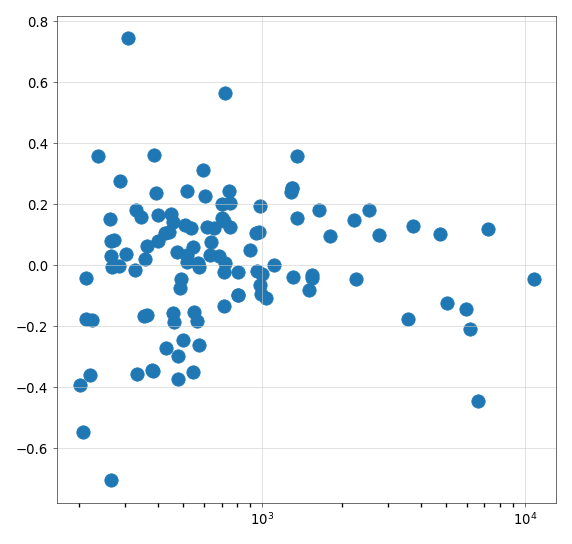

In [643]:
x, y = df1.loc[genes_in_cluster, 'baseMean'], df1.loc[genes_in_cluster, 'log2FoldChange']
plt.scatter(x, y)
plt.xscale('log')

In [865]:
scipy.stats.ranksums(df1.loc[genes_in_cluster_active1, 'log2FoldChange'], 
                     df1.loc[:, 'log2FoldChange'])

scipy.stats.ranksums(df1.loc[genes_in_cluster_active2, 'log2FoldChange'], 
                     df1.loc[:, 'log2FoldChange'])

RanksumsResult(statistic=3.1605010237719857, pvalue=0.0015749805159728588)

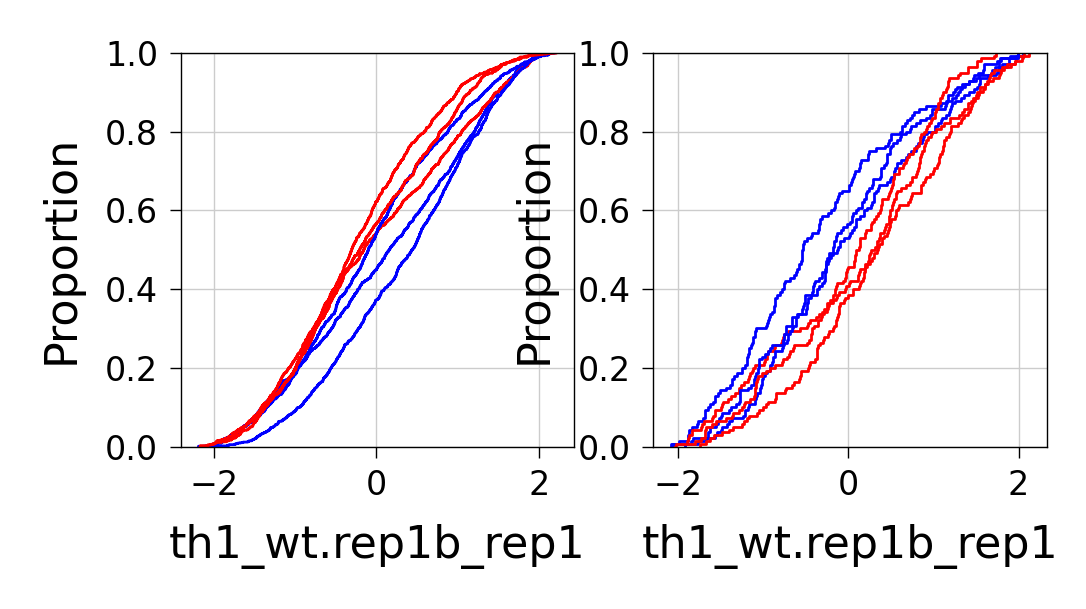

In [869]:
fig, axs = init_subplots_exact(2, 1, fgsz=(25*mm, 25*mm), dpi = 200)
for col in zscore_count_df_th1:
    v = zscore_count_df_th1.loc[genes_in_cluster_active1, col]
    if 'se-ko' in col:
        color = 'red'
    else:
        color = 'blue'
    sns.ecdfplot(v, color=color, ax=axs[0])

for col in zscore_count_df_th1:
    v = zscore_count_df_th1.loc[genes_in_cluster_active2, col]
    if 'se-ko' in col:
        color = 'red'
    else:
        color = 'blue'
    sns.ecdfplot(v, color=color, ax=axs[1])
plt.title()

In [304]:
np.power(2, df2.loc[genes_in_cluster, 'log2FoldChange'].median())

1.0246923523612979

<Axes: xlabel='log2FoldChange', ylabel='Proportion'>

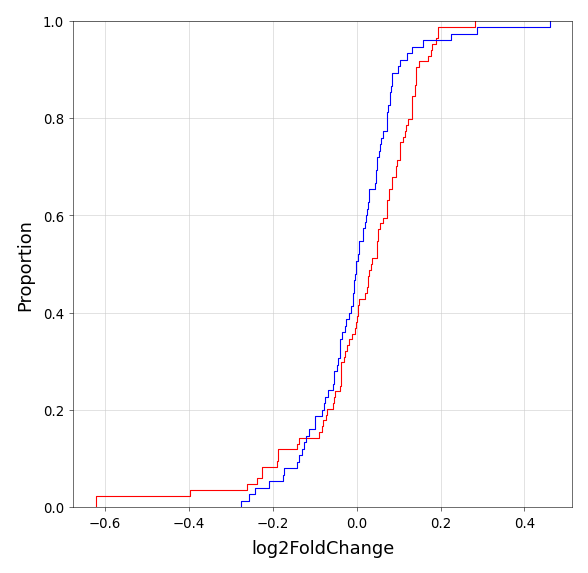

In [297]:
df2 = df2[df2['baseMean'] > 1000]
genes_in_cluster = ['Map4k4', 'Hecw2', 'Stk17b', 'Ankrd44', 'Sf3b1', 'Gm24053', 'Ctla4', 'Gm38137', 'Gm37039', 'Icos', 'Gm11581', 'Gm11582', 'Cd28', 'Gm37198', 'Rpl18-ps1', 'Gm11579', 'Gm28112', 'Ikzf2', 'Gm29114', 'Gm29112', 'Gm29336', 'Arl4c', 'Gm19589', 'Gm38130', 'Glrp1', 'Gm37053', 'Bcl2', 'Mir3473f', 'Kdsr', 'Cxcr4', 'Gm6170', 'Gm28556', 'Gm4258', 'Ptprc', 'Fasl', 'Gm37357', 'Gm38304', 'Suco', 'Dnm3', 'Pigc', 'Gm7496', 'Gm17976', 'Gm37856', 'Gm32999', 'Gm37469', 'Creg1', 'Gm16565', 'Cd247', 'Pou2f1', 'Gm23402', 'Gm31728', 'Gm5069', 'Itpkb', 'Gm37390', 'Psen2', 'Gm37033', 'Gm36933', 'Dusp10', 'Ppp2r5a', 'Gm37074', 'Nenf', 'Gm32200', 'Gm2272', 'Tmem206', 'Lamb3', 'Hsd11b1', 'Gm37103', 'Syt14', 'Traf3ip3', 'Gm15872', 'Irf6', 'Diexf', 'Lamb3', 'Gm38118', 'Hsd11b1', 'Camk1g', 'Gm37691', 'G0s2', 'Gm37866', 'Gm13218', 'Gm13294', 'Gm37766', 'Gm36932', 'Prkcq', 'Gm37520', 'Cstad', 'Gm14486', 'Gm14487', 'Fam65c', 'Gm14321', 'Ptpn1', 'Pmepa1', 'Pmepa1os', 'Gm16337', 'Pag1', 'Gm24786', 'Gm5842', 'Gm43672', 'Tbl1xr1', 'Gm20402', 'Gm38034', 'Gm38098', 'Foxo1', 'Gm10293', 'Gm2447', 'Mbnl1', 'Gm37589', 'Gm37488', 'Mbnl1', 'Ift80', 'Smc4', 'Trim59', 'Mir15b', 'Gm22009', 'Mir16-2', 'Kpna4', 'Gm1647', 'Gm37558', 'Ptgfrn', 'Cd101', 'Gm12486', 'Bcl2l15', 'Phtf1', 'Gm43149', 'Gm43387', 'Gm15886', 'Dclre1b', 'Ap4b1', 'Gm15471', 'Rsbn1', 'Hipk1', 'Phtf1os', 'Gm15472', 'Gm15602', 'Ptpn22', 'Gm43065', 'Gm5547', 'Ovgp1', 'Pifo', 'Gm42890', 'Gm43331', 'Rap1a', 'Wdr77', 'Atp5f1', 'Gm43330', 'Gm43329', 'Gm9889', 'S1pr1', 'Gm43106', 'Mir669n', 'Dph5', 'Gm6649', 'Slc30a7', 'Gm43522', 'Gm42997', 'Gm5855', 'Lef1', 'Gm42449', 'Gm43352', 'Hadh', 'Gm16231', 'St6galnac5', 'Gm16213', 'Pigk', 'Tox', 'Chd7', 'Bach2', 'Map3k7', 'Gm11927', 'Bach2it1', 'Bach2', 'Gm12503', 'Gne', 'Mir5106', 'Rnf38', 'Clta', 'Gm12504', 'AI481877', 'Ugcg', 'Dnajc25', 'Gng10', 'Rpsa-ps11', 'Susd1', 'Ptbp3', 'Gm12596', 'Alad', 'Gm11211', 'Gm11209', 'Hdhd3', 'Rgs3', 'Gm11210', 'Pole3', 'Focad', 'Mllt3', 'Gm12646', 'Gm12631', 'Mir491', 'Gm24468', 'Jak1', 'Gm12785', 'Raver2', 'Cachd1', 'Gm3716', 'Gm26761', 'Gm20033', 'Gm20033', 'Klf3', 'Tlr6', 'Fam114a1', 'Tlr1', 'Gm42645', 'Chrna9', 'Gm43769', 'Gm42646', 'Rhoh', 'Gm43004', 'Gm24346', 'N4bp2os', 'N4bp2', 'Gm42648', 'Lrrc8d', 'Lrrc8c', 'Tgfbr3', 'Gm43422', 'Gm43423', 'Clip2', 'Gtf2ird1', 'Gtf2i', 'Gm43481', 'Gm42885', 'Gm42882', 'Gm43480', 'Gm16020', 'Gm13835', 'Gm27019', 'Gm13833', 'Lncpint', 'Gm13834', 'Gm37728', 'Nod1', 'Znrf2', 'Gm44185', 'Ggct', 'Foxp1', 'Gm20705', 'Gm20696', 'Foxp1', 'B4galnt3', 'Ninj2', 'Mir706', 'Wnk1', 'Gm16199', 'Klrb1f', 'BC064078', 'Gm44000', 'Clec2d', 'Gm7457', 'St8sia1', 'Cmas', 'Sult6b2', 'Etnk1', 'Gm31108', 'D6Ertd474e', 'C2cd5', 'Gm45052', 'Gm27252', 'Gm7482', 'Klf13', 'Gm44627', 'Trpm1', 'Gm44722', 'Gm45055', 'Igf1r', 'Pgpep1l', 'Pgpep1l', 'Gm16158', 'Fam169b', 'Gm16157', 'Gm44738', 'Fam174b', 'Chd2', 'Gm44686', 'Gm25282', 'Gm44694', 'Akap13', 'Gm44835', 'Zscan2', 'Nmb', 'Zfp592', 'Gm44649', 'Wdr73', 'Iqgap1', 'Sec11a', 'Gm16171', 'Pde3b', 'Psma1', 'Copb1', 'Leprotl1', 'Mir6395', 'Saraf', 'Gm29243', 'Mboat4', 'Gm10131', 'Dctn6', 'Gm26768', 'D8Ertd82e', 'Lonrf1', 'Rps12-ps24', 'Enpp6', 'Irf2', 'Inpp4b', 'Gm17072', 'Inpp4b', 'Gm17169', 'Wwox', 'Irf2bp2', 'Gm26759', 'Gm26397', 'Rbm34', 'Tomm20', 'Phxr4', 'Gm17571', 'Gm26189', 'Ccdc82', 'Gpr83', 'Izumo1r', 'Fut4', 'Gm16302', 'Ankrd49', 'Mre11a', 'Gm16379', 'Ets1', 'Gm27201', 'Gm37082', 'Fli1', 'Gm37474', 'Gm38346', 'Gm27240', 'Gm27162', 'Gm37192', 'Ets1', 'Gm3331', 'Crtam', 'Ubash3b', 'Gm5921', 'Stt3b', 'Tgfbr2', 'Gm9385', 'Gadl1', 'Gm16142', 'Hivep2', 'Gm26835', 'Gm28289', 'Tnfaip3', 'Sgk1', 'Platr6', 'Themis', 'Ptprk', 'Fyn', 'Gm6963', 'Scml4', 'Gm26860', 'Sec63', 'Smim24', 'Gm16104', 'Nfic', 'Mrpl54', 'Gipc3', 'Tbxa2r', 'Gm16315', 'Mir6913', 'Dohh', 'Celf5', 'Apba3', 'Zfr2', 'Mfsd12', 'Hmg20b', 'Pip5k1c', 'Matk', 'S1pr4', 'Cactin', 'Tjp3', 'Ncln', 'Cfap54', 'Cdk17', 'Mir1931', 'Elk3', 'Lta4h', 'Hal', 'Elk3', 'Gm20091', 'Btg1', 'Gad1-ps', 'Dusp6', 'Rap1b', 'Nup107', 'Il22', 'Mdm1', 'Dyrk2', 'Gm11998', 'Ikzf1', 'Gm12000', 'Gm11999', 'Vps54', 'Peli1', 'Gm12040', 'Gm23582', 'B3gnt2', 'Gm12057', 'Gm23772', 'Gm20456', 'Cct4', 'Zrsr1', 'Gm12058', 'Gm12057', 'Commd1', 'Med7', 'Gm12167', 'Itk', 'Fam71b', 'Gm12168', 'Havcr2', 'Cyfip2', 'Gm26116', 'Gm12227', 'Rapgef6', 'Fnip1', 'Gm12229', 'Cdc42se2', 'Tnip1', 'Gpx3', 'Lyrm7', 'Gm12230', 'Hint1', 'Anxa6', 'Cdc42se2', 'Gm12290', 'Gm12289', 'Cox10', 'Tns4', 'Top2a', 'Ccr7', 'Igfbp4', 'Krt222', 'Smarce1', 'Trib2', 'Gm5432', 'Psma6', 'Rpl18a-ps1', 'Srp54b', 'Nfkbia', 'Ppp2r3c', 'Gm15561', 'Klhdc1', 'Gm9887', 'Rn7s2', 'Klhdc2', 'Arf6', 'Nemf', 'Tmem30b', 'Prkch', 'Hif1a', 'Gm15283', 'Prkch', 'Snapc1', 'S100a11-ps', 'Irf2bpl', 'Gm26698', 'Cipc', 'Efcab11', 'Gm26839', 'Gpr68', 'Ccdc88c', 'Gm8482', 'Gm16086', 'Gm16085', 'Gm2800', 'Gm16084', 'Gm5187', 'Gm15208', 'Bcl11b', 'Hist1h3g', 'Hist1h2ad', 'Gm44350', 'Hist1h3f', 'Gm11336', 'Hist1h3e', 'Gm44314', 'Hist1h2bh', 'Hist1h1e', 'Hist1h1c', 'Hist1h2be', 'Hist1h2bg', 'Hist1h2ae', 'Hist1h4h', 'Hist1h3c', 'Hist1h2bc', 'Hist1h1d', 'Hfe', 'Hist1h2ac', 'Hist1h4d', 'Hist1h4c', 'Gm44394', 'Hist1h4f', 'Hist1h2bf', 'Hist1h2bb', 'Gm11346', 'Fam65b', 'Irf4', 'Hus1b', 'Exoc2', 'Ippk', 'Fgd3', 'Cenpp', 'Tes3-ps', 'Bicd2', 'Gadd45g', 'Sema4d', 'Gm36638', 'Pik3r1', 'Gm9025', 'Gm15326', 'Gm15327', 'Map3k1', 'Ankrd55', 'Il6st', 'Gm17509', 'Emb', 'Parp8', 'Ngly1', 'Oxsm', 'Arhgef3', 'Fam208a', 'Gm23633', 'Gm22485', 'Ccdc66', 'Mmp14', 'Abhd4', 'Mrpl52', 'Olfr49', 'Lrp10', 'Rem2', 'Slc7a7', 'Dad1', 'Gm43305', 'Oxa1l', 'Cysltr2', 'Lpar6', 'Gm17233', 'Rcbtb2', 'Rb1', 'Rb1', 'Itm2b', 'Rgcc', 'Elf1', 'Kbtbd6', 'Mtrf1', 'Naa16', 'Kbtbd7', 'Wbp4', 'Gpr183', 'Gpr18', 'Dock9', 'Ubac2', 'Clybl', 'Timm8a2', 'Gm17082', 'Gm6254', 'Tm9sf2', 'Ubac2', 'Rictor', 'Gm7666', 'Fyb', 'Gm2245', 'Il7r', 'Spef2', 'Fam105a', 'Ank', 'Trio', 'Otulin', 'Rnf19a', 'Rpl7a-ps3', 'Ankrd46', 'Ywhaz', 'Zfp706', 'Ext1', 'Sntb1', 'Trib1', 'Nsmce2', 'Pvt1', 'H2afy3', 'Gm27782', 'Asap1', 'Gm20717', 'Fam49b', 'Tg', 'Tmem71', 'Gm17140', 'Lrrc6', 'Phf20l1', 'Wisp1', 'Tg', 'Ndrg1', 'Gm17035', 'Sla', 'Gm2895', 'Fam83f', 'Grap2', 'Tnrc6b', 'Enthd1', 'Mir6957', 'Pced1b', 'Dexi', 'Ciita', 'Gm15558', 'Clec16a', 'BC106179', 'Rfc4', 'Adipoq', 'Gm24616', 'St6gal1', 'Eif4a2', 'Gm6630', 'Gm15746', 'Gm6493', 'Masp1', 'St6gal1', 'Gm16619', 'Ift57', 'Gm15518', 'Cd47', 'Alcam', 'Cblb', 'Nxpe3', 'Nfkbiz', 'Zbtb11os1', 'Rpl24', 'Cep97', 'Zbtb11', 'Tmem30c', 'Filip1l', 'Cmss1', 'Nrip1', 'Gm9843', 'Runx1', 'Gm15340', 'Psmg1', 'Brwd1', 'Gm37248', 'Gm37593', 'Satb1', 'Gm36931', 'Gm37266', 'Gm37176', 'Gm6934', 'Gm19585', 'Lbh', 'Ypel5', 'Lclat1', 'Gm9311', 'Zfp36l2', 'Gm37549', 'Thada', 'Thada', 'Psd2', 'Cxxc5', 'Gm16490', 'Ube2d2a', 'Ldlrad4', 'Ctif', 'Dym', 'Gm20544', 'Smad7', 'Nfatc1', 'Atp9b', 'Sgms1', 'Asah2', 'Sgms1', 'Minpp1', 'Rpl9-ps6', 'Mxi1', 'Mirt1', 'Gm10197', 'Smndc1']
genes_in_cluster = [x for x in genes_in_cluster if x in df2.index]

matched_vals = fetch_mean_matched_values(df2.loc[genes_in_cluster, 'baseMean'], df2.drop(genes_in_cluster).loc[:, 'baseMean']).index
sns.ecdfplot(df2.loc[genes_in_cluster, 'log2FoldChange'], color='red')
sns.ecdfplot(df2.loc[matched_vals, 'log2FoldChange'], color='blue')


#### Sizefactors

In [276]:
th1_size = pd.read_csv('/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/rudensky_scrna/prelim-analysis/bulk_rna_data/DESeq2/sizefactors/golnazEts1Th1_ko_vs_wt.csv', sep=' ')
th2_size = pd.read_csv('/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/rudensky_scrna/prelim-analysis/bulk_rna_data/DESeq2/sizefactors/golnazEts1Th2_ko_vs_wt.csv', sep=' ')

In [284]:
norm_count_df_th1 = count_df_th1/th1_size.values.T
norm_count_df_th2 = count_df_th2/th2_size.values.T

zscore_count_df_th1 = norm_count_df_th1.apply(zscore, axis=1)
zscore_count_df_th2 = norm_count_df_th2.apply(zscore, axis=1)

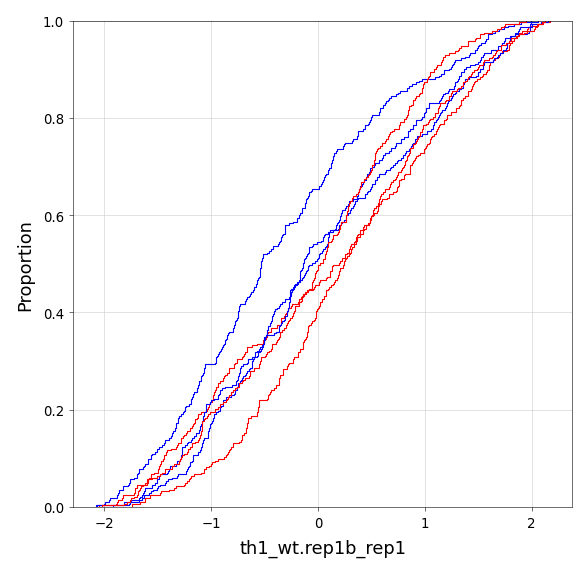

In [293]:
genes_in_cluster = ['Map4k4', 'Hecw2', 'Stk17b', 'Ankrd44', 'Sf3b1', 'Gm24053', 'Ctla4', 'Gm38137', 'Gm37039', 'Icos', 'Gm11581', 'Gm11582', 'Cd28', 'Gm37198', 'Rpl18-ps1', 'Gm11579', 'Gm28112', 'Ikzf2', 'Gm29114', 'Gm29112', 'Gm29336', 'Arl4c', 'Gm19589', 'Gm38130', 'Glrp1', 'Gm37053', 'Bcl2', 'Mir3473f', 'Kdsr', 'Cxcr4', 'Gm6170', 'Gm28556', 'Gm4258', 'Ptprc', 'Fasl', 'Gm37357', 'Gm38304', 'Suco', 'Dnm3', 'Pigc', 'Gm7496', 'Gm17976', 'Gm37856', 'Gm32999', 'Gm37469', 'Creg1', 'Gm16565', 'Cd247', 'Pou2f1', 'Gm23402', 'Gm31728', 'Gm5069', 'Itpkb', 'Gm37390', 'Psen2', 'Gm37033', 'Gm36933', 'Dusp10', 'Ppp2r5a', 'Gm37074', 'Nenf', 'Gm32200', 'Gm2272', 'Tmem206', 'Lamb3', 'Hsd11b1', 'Gm37103', 'Syt14', 'Traf3ip3', 'Gm15872', 'Irf6', 'Diexf', 'Lamb3', 'Gm38118', 'Hsd11b1', 'Camk1g', 'Gm37691', 'G0s2', 'Gm37866', 'Gm13218', 'Gm13294', 'Gm37766', 'Gm36932', 'Prkcq', 'Gm37520', 'Cstad', 'Gm14486', 'Gm14487', 'Fam65c', 'Gm14321', 'Ptpn1', 'Pmepa1', 'Pmepa1os', 'Gm16337', 'Pag1', 'Gm24786', 'Gm5842', 'Gm43672', 'Tbl1xr1', 'Gm20402', 'Gm38034', 'Gm38098', 'Foxo1', 'Gm10293', 'Gm2447', 'Mbnl1', 'Gm37589', 'Gm37488', 'Mbnl1', 'Ift80', 'Smc4', 'Trim59', 'Mir15b', 'Gm22009', 'Mir16-2', 'Kpna4', 'Gm1647', 'Gm37558', 'Ptgfrn', 'Cd101', 'Gm12486', 'Bcl2l15', 'Phtf1', 'Gm43149', 'Gm43387', 'Gm15886', 'Dclre1b', 'Ap4b1', 'Gm15471', 'Rsbn1', 'Hipk1', 'Phtf1os', 'Gm15472', 'Gm15602', 'Ptpn22', 'Gm43065', 'Gm5547', 'Ovgp1', 'Pifo', 'Gm42890', 'Gm43331', 'Rap1a', 'Wdr77', 'Atp5f1', 'Gm43330', 'Gm43329', 'Gm9889', 'S1pr1', 'Gm43106', 'Mir669n', 'Dph5', 'Gm6649', 'Slc30a7', 'Gm43522', 'Gm42997', 'Gm5855', 'Lef1', 'Gm42449', 'Gm43352', 'Hadh', 'Gm16231', 'St6galnac5', 'Gm16213', 'Pigk', 'Tox', 'Chd7', 'Bach2', 'Map3k7', 'Gm11927', 'Bach2it1', 'Bach2', 'Gm12503', 'Gne', 'Mir5106', 'Rnf38', 'Clta', 'Gm12504', 'AI481877', 'Ugcg', 'Dnajc25', 'Gng10', 'Rpsa-ps11', 'Susd1', 'Ptbp3', 'Gm12596', 'Alad', 'Gm11211', 'Gm11209', 'Hdhd3', 'Rgs3', 'Gm11210', 'Pole3', 'Focad', 'Mllt3', 'Gm12646', 'Gm12631', 'Mir491', 'Gm24468', 'Jak1', 'Gm12785', 'Raver2', 'Cachd1', 'Gm3716', 'Gm26761', 'Gm20033', 'Gm20033', 'Klf3', 'Tlr6', 'Fam114a1', 'Tlr1', 'Gm42645', 'Chrna9', 'Gm43769', 'Gm42646', 'Rhoh', 'Gm43004', 'Gm24346', 'N4bp2os', 'N4bp2', 'Gm42648', 'Lrrc8d', 'Lrrc8c', 'Tgfbr3', 'Gm43422', 'Gm43423', 'Clip2', 'Gtf2ird1', 'Gtf2i', 'Gm43481', 'Gm42885', 'Gm42882', 'Gm43480', 'Gm16020', 'Gm13835', 'Gm27019', 'Gm13833', 'Lncpint', 'Gm13834', 'Gm37728', 'Nod1', 'Znrf2', 'Gm44185', 'Ggct', 'Foxp1', 'Gm20705', 'Gm20696', 'Foxp1', 'B4galnt3', 'Ninj2', 'Mir706', 'Wnk1', 'Gm16199', 'Klrb1f', 'BC064078', 'Gm44000', 'Clec2d', 'Gm7457', 'St8sia1', 'Cmas', 'Sult6b2', 'Etnk1', 'Gm31108', 'D6Ertd474e', 'C2cd5', 'Gm45052', 'Gm27252', 'Gm7482', 'Klf13', 'Gm44627', 'Trpm1', 'Gm44722', 'Gm45055', 'Igf1r', 'Pgpep1l', 'Pgpep1l', 'Gm16158', 'Fam169b', 'Gm16157', 'Gm44738', 'Fam174b', 'Chd2', 'Gm44686', 'Gm25282', 'Gm44694', 'Akap13', 'Gm44835', 'Zscan2', 'Nmb', 'Zfp592', 'Gm44649', 'Wdr73', 'Iqgap1', 'Sec11a', 'Gm16171', 'Pde3b', 'Psma1', 'Copb1', 'Leprotl1', 'Mir6395', 'Saraf', 'Gm29243', 'Mboat4', 'Gm10131', 'Dctn6', 'Gm26768', 'D8Ertd82e', 'Lonrf1', 'Rps12-ps24', 'Enpp6', 'Irf2', 'Inpp4b', 'Gm17072', 'Inpp4b', 'Gm17169', 'Wwox', 'Irf2bp2', 'Gm26759', 'Gm26397', 'Rbm34', 'Tomm20', 'Phxr4', 'Gm17571', 'Gm26189', 'Ccdc82', 'Gpr83', 'Izumo1r', 'Fut4', 'Gm16302', 'Ankrd49', 'Mre11a', 'Gm16379', 'Ets1', 'Gm27201', 'Gm37082', 'Fli1', 'Gm37474', 'Gm38346', 'Gm27240', 'Gm27162', 'Gm37192', 'Ets1', 'Gm3331', 'Crtam', 'Ubash3b', 'Gm5921', 'Stt3b', 'Tgfbr2', 'Gm9385', 'Gadl1', 'Gm16142', 'Hivep2', 'Gm26835', 'Gm28289', 'Tnfaip3', 'Sgk1', 'Platr6', 'Themis', 'Ptprk', 'Fyn', 'Gm6963', 'Scml4', 'Gm26860', 'Sec63', 'Smim24', 'Gm16104', 'Nfic', 'Mrpl54', 'Gipc3', 'Tbxa2r', 'Gm16315', 'Mir6913', 'Dohh', 'Celf5', 'Apba3', 'Zfr2', 'Mfsd12', 'Hmg20b', 'Pip5k1c', 'Matk', 'S1pr4', 'Cactin', 'Tjp3', 'Ncln', 'Cfap54', 'Cdk17', 'Mir1931', 'Elk3', 'Lta4h', 'Hal', 'Elk3', 'Gm20091', 'Btg1', 'Gad1-ps', 'Dusp6', 'Rap1b', 'Nup107', 'Il22', 'Mdm1', 'Dyrk2', 'Gm11998', 'Ikzf1', 'Gm12000', 'Gm11999', 'Vps54', 'Peli1', 'Gm12040', 'Gm23582', 'B3gnt2', 'Gm12057', 'Gm23772', 'Gm20456', 'Cct4', 'Zrsr1', 'Gm12058', 'Gm12057', 'Commd1', 'Med7', 'Gm12167', 'Itk', 'Fam71b', 'Gm12168', 'Havcr2', 'Cyfip2', 'Gm26116', 'Gm12227', 'Rapgef6', 'Fnip1', 'Gm12229', 'Cdc42se2', 'Tnip1', 'Gpx3', 'Lyrm7', 'Gm12230', 'Hint1', 'Anxa6', 'Cdc42se2', 'Gm12290', 'Gm12289', 'Cox10', 'Tns4', 'Top2a', 'Ccr7', 'Igfbp4', 'Krt222', 'Smarce1', 'Trib2', 'Gm5432', 'Psma6', 'Rpl18a-ps1', 'Srp54b', 'Nfkbia', 'Ppp2r3c', 'Gm15561', 'Klhdc1', 'Gm9887', 'Rn7s2', 'Klhdc2', 'Arf6', 'Nemf', 'Tmem30b', 'Prkch', 'Hif1a', 'Gm15283', 'Prkch', 'Snapc1', 'S100a11-ps', 'Irf2bpl', 'Gm26698', 'Cipc', 'Efcab11', 'Gm26839', 'Gpr68', 'Ccdc88c', 'Gm8482', 'Gm16086', 'Gm16085', 'Gm2800', 'Gm16084', 'Gm5187', 'Gm15208', 'Bcl11b', 'Hist1h3g', 'Hist1h2ad', 'Gm44350', 'Hist1h3f', 'Gm11336', 'Hist1h3e', 'Gm44314', 'Hist1h2bh', 'Hist1h1e', 'Hist1h1c', 'Hist1h2be', 'Hist1h2bg', 'Hist1h2ae', 'Hist1h4h', 'Hist1h3c', 'Hist1h2bc', 'Hist1h1d', 'Hfe', 'Hist1h2ac', 'Hist1h4d', 'Hist1h4c', 'Gm44394', 'Hist1h4f', 'Hist1h2bf', 'Hist1h2bb', 'Gm11346', 'Fam65b', 'Irf4', 'Hus1b', 'Exoc2', 'Ippk', 'Fgd3', 'Cenpp', 'Tes3-ps', 'Bicd2', 'Gadd45g', 'Sema4d', 'Gm36638', 'Pik3r1', 'Gm9025', 'Gm15326', 'Gm15327', 'Map3k1', 'Ankrd55', 'Il6st', 'Gm17509', 'Emb', 'Parp8', 'Ngly1', 'Oxsm', 'Arhgef3', 'Fam208a', 'Gm23633', 'Gm22485', 'Ccdc66', 'Mmp14', 'Abhd4', 'Mrpl52', 'Olfr49', 'Lrp10', 'Rem2', 'Slc7a7', 'Dad1', 'Gm43305', 'Oxa1l', 'Cysltr2', 'Lpar6', 'Gm17233', 'Rcbtb2', 'Rb1', 'Rb1', 'Itm2b', 'Rgcc', 'Elf1', 'Kbtbd6', 'Mtrf1', 'Naa16', 'Kbtbd7', 'Wbp4', 'Gpr183', 'Gpr18', 'Dock9', 'Ubac2', 'Clybl', 'Timm8a2', 'Gm17082', 'Gm6254', 'Tm9sf2', 'Ubac2', 'Rictor', 'Gm7666', 'Fyb', 'Gm2245', 'Il7r', 'Spef2', 'Fam105a', 'Ank', 'Trio', 'Otulin', 'Rnf19a', 'Rpl7a-ps3', 'Ankrd46', 'Ywhaz', 'Zfp706', 'Ext1', 'Sntb1', 'Trib1', 'Nsmce2', 'Pvt1', 'H2afy3', 'Gm27782', 'Asap1', 'Gm20717', 'Fam49b', 'Tg', 'Tmem71', 'Gm17140', 'Lrrc6', 'Phf20l1', 'Wisp1', 'Tg', 'Ndrg1', 'Gm17035', 'Sla', 'Gm2895', 'Fam83f', 'Grap2', 'Tnrc6b', 'Enthd1', 'Mir6957', 'Pced1b', 'Dexi', 'Ciita', 'Gm15558', 'Clec16a', 'BC106179', 'Rfc4', 'Adipoq', 'Gm24616', 'St6gal1', 'Eif4a2', 'Gm6630', 'Gm15746', 'Gm6493', 'Masp1', 'St6gal1', 'Gm16619', 'Ift57', 'Gm15518', 'Cd47', 'Alcam', 'Cblb', 'Nxpe3', 'Nfkbiz', 'Zbtb11os1', 'Rpl24', 'Cep97', 'Zbtb11', 'Tmem30c', 'Filip1l', 'Cmss1', 'Nrip1', 'Gm9843', 'Runx1', 'Gm15340', 'Psmg1', 'Brwd1', 'Gm37248', 'Gm37593', 'Satb1', 'Gm36931', 'Gm37266', 'Gm37176', 'Gm6934', 'Gm19585', 'Lbh', 'Ypel5', 'Lclat1', 'Gm9311', 'Zfp36l2', 'Gm37549', 'Thada', 'Thada', 'Psd2', 'Cxxc5', 'Gm16490', 'Ube2d2a', 'Ldlrad4', 'Ctif', 'Dym', 'Gm20544', 'Smad7', 'Nfatc1', 'Atp9b', 'Sgms1', 'Asah2', 'Sgms1', 'Minpp1', 'Rpl9-ps6', 'Mxi1', 'Mirt1', 'Gm10197', 'Smndc1']
genes_in_cluster = [x for x in genes_in_cluster if (x in zscore_count_df_th1.index) and (norm_count_df_th1.loc[x].mean() > 100)]
for col in zscore_count_df_th1:
    v = zscore_count_df_th1.loc[genes_in_cluster, col]
    if 'se-ko' in col:
        color = 'red'
    else:
        color = 'blue'
    sns.ecdfplot(v, color=color)

In [ ]:
plt

In [ ]:
genes_in_cluster = ['Map4k4', 'Hecw2', 'Stk17b', 'Ankrd44', 'Sf3b1', 'Gm24053', 'Ctla4', 'Gm38137', 'Gm37039', 'Icos', 'Gm11581', 'Gm11582', 'Cd28', 'Gm37198', 'Rpl18-ps1', 'Gm11579', 'Gm28112', 'Ikzf2', 'Gm29114', 'Gm29112', 'Gm29336', 'Arl4c', 'Gm19589', 'Gm38130', 'Glrp1', 'Gm37053', 'Bcl2', 'Mir3473f', 'Kdsr', 'Cxcr4', 'Gm6170', 'Gm28556', 'Gm4258', 'Ptprc', 'Fasl', 'Gm37357', 'Gm38304', 'Suco', 'Dnm3', 'Pigc', 'Gm7496', 'Gm17976', 'Gm37856', 'Gm32999', 'Gm37469', 'Creg1', 'Gm16565', 'Cd247', 'Pou2f1', 'Gm23402', 'Gm31728', 'Gm5069', 'Itpkb', 'Gm37390', 'Psen2', 'Gm37033', 'Gm36933', 'Dusp10', 'Ppp2r5a', 'Gm37074', 'Nenf', 'Gm32200', 'Gm2272', 'Tmem206', 'Lamb3', 'Hsd11b1', 'Gm37103', 'Syt14', 'Traf3ip3', 'Gm15872', 'Irf6', 'Diexf', 'Lamb3', 'Gm38118', 'Hsd11b1', 'Camk1g', 'Gm37691', 'G0s2', 'Gm37866', 'Gm13218', 'Gm13294', 'Gm37766', 'Gm36932', 'Prkcq', 'Gm37520', 'Cstad', 'Gm14486', 'Gm14487', 'Fam65c', 'Gm14321', 'Ptpn1', 'Pmepa1', 'Pmepa1os', 'Gm16337', 'Pag1', 'Gm24786', 'Gm5842', 'Gm43672', 'Tbl1xr1', 'Gm20402', 'Gm38034', 'Gm38098', 'Foxo1', 'Gm10293', 'Gm2447', 'Mbnl1', 'Gm37589', 'Gm37488', 'Mbnl1', 'Ift80', 'Smc4', 'Trim59', 'Mir15b', 'Gm22009', 'Mir16-2', 'Kpna4', 'Gm1647', 'Gm37558', 'Ptgfrn', 'Cd101', 'Gm12486', 'Bcl2l15', 'Phtf1', 'Gm43149', 'Gm43387', 'Gm15886', 'Dclre1b', 'Ap4b1', 'Gm15471', 'Rsbn1', 'Hipk1', 'Phtf1os', 'Gm15472', 'Gm15602', 'Ptpn22', 'Gm43065', 'Gm5547', 'Ovgp1', 'Pifo', 'Gm42890', 'Gm43331', 'Rap1a', 'Wdr77', 'Atp5f1', 'Gm43330', 'Gm43329', 'Gm9889', 'S1pr1', 'Gm43106', 'Mir669n', 'Dph5', 'Gm6649', 'Slc30a7', 'Gm43522', 'Gm42997', 'Gm5855', 'Lef1', 'Gm42449', 'Gm43352', 'Hadh', 'Gm16231', 'St6galnac5', 'Gm16213', 'Pigk', 'Tox', 'Chd7', 'Bach2', 'Map3k7', 'Gm11927', 'Bach2it1', 'Bach2', 'Gm12503', 'Gne', 'Mir5106', 'Rnf38', 'Clta', 'Gm12504', 'AI481877', 'Ugcg', 'Dnajc25', 'Gng10', 'Rpsa-ps11', 'Susd1', 'Ptbp3', 'Gm12596', 'Alad', 'Gm11211', 'Gm11209', 'Hdhd3', 'Rgs3', 'Gm11210', 'Pole3', 'Focad', 'Mllt3', 'Gm12646', 'Gm12631', 'Mir491', 'Gm24468', 'Jak1', 'Gm12785', 'Raver2', 'Cachd1', 'Gm3716', 'Gm26761', 'Gm20033', 'Gm20033', 'Klf3', 'Tlr6', 'Fam114a1', 'Tlr1', 'Gm42645', 'Chrna9', 'Gm43769', 'Gm42646', 'Rhoh', 'Gm43004', 'Gm24346', 'N4bp2os', 'N4bp2', 'Gm42648', 'Lrrc8d', 'Lrrc8c', 'Tgfbr3', 'Gm43422', 'Gm43423', 'Clip2', 'Gtf2ird1', 'Gtf2i', 'Gm43481', 'Gm42885', 'Gm42882', 'Gm43480', 'Gm16020', 'Gm13835', 'Gm27019', 'Gm13833', 'Lncpint', 'Gm13834', 'Gm37728', 'Nod1', 'Znrf2', 'Gm44185', 'Ggct', 'Foxp1', 'Gm20705', 'Gm20696', 'Foxp1', 'B4galnt3', 'Ninj2', 'Mir706', 'Wnk1', 'Gm16199', 'Klrb1f', 'BC064078', 'Gm44000', 'Clec2d', 'Gm7457', 'St8sia1', 'Cmas', 'Sult6b2', 'Etnk1', 'Gm31108', 'D6Ertd474e', 'C2cd5', 'Gm45052', 'Gm27252', 'Gm7482', 'Klf13', 'Gm44627', 'Trpm1', 'Gm44722', 'Gm45055', 'Igf1r', 'Pgpep1l', 'Pgpep1l', 'Gm16158', 'Fam169b', 'Gm16157', 'Gm44738', 'Fam174b', 'Chd2', 'Gm44686', 'Gm25282', 'Gm44694', 'Akap13', 'Gm44835', 'Zscan2', 'Nmb', 'Zfp592', 'Gm44649', 'Wdr73', 'Iqgap1', 'Sec11a', 'Gm16171', 'Pde3b', 'Psma1', 'Copb1', 'Leprotl1', 'Mir6395', 'Saraf', 'Gm29243', 'Mboat4', 'Gm10131', 'Dctn6', 'Gm26768', 'D8Ertd82e', 'Lonrf1', 'Rps12-ps24', 'Enpp6', 'Irf2', 'Inpp4b', 'Gm17072', 'Inpp4b', 'Gm17169', 'Wwox', 'Irf2bp2', 'Gm26759', 'Gm26397', 'Rbm34', 'Tomm20', 'Phxr4', 'Gm17571', 'Gm26189', 'Ccdc82', 'Gpr83', 'Izumo1r', 'Fut4', 'Gm16302', 'Ankrd49', 'Mre11a', 'Gm16379', 'Ets1', 'Gm27201', 'Gm37082', 'Fli1', 'Gm37474', 'Gm38346', 'Gm27240', 'Gm27162', 'Gm37192', 'Ets1', 'Gm3331', 'Crtam', 'Ubash3b', 'Gm5921', 'Stt3b', 'Tgfbr2', 'Gm9385', 'Gadl1', 'Gm16142', 'Hivep2', 'Gm26835', 'Gm28289', 'Tnfaip3', 'Sgk1', 'Platr6', 'Themis', 'Ptprk', 'Fyn', 'Gm6963', 'Scml4', 'Gm26860', 'Sec63', 'Smim24', 'Gm16104', 'Nfic', 'Mrpl54', 'Gipc3', 'Tbxa2r', 'Gm16315', 'Mir6913', 'Dohh', 'Celf5', 'Apba3', 'Zfr2', 'Mfsd12', 'Hmg20b', 'Pip5k1c', 'Matk', 'S1pr4', 'Cactin', 'Tjp3', 'Ncln', 'Cfap54', 'Cdk17', 'Mir1931', 'Elk3', 'Lta4h', 'Hal', 'Elk3', 'Gm20091', 'Btg1', 'Gad1-ps', 'Dusp6', 'Rap1b', 'Nup107', 'Il22', 'Mdm1', 'Dyrk2', 'Gm11998', 'Ikzf1', 'Gm12000', 'Gm11999', 'Vps54', 'Peli1', 'Gm12040', 'Gm23582', 'B3gnt2', 'Gm12057', 'Gm23772', 'Gm20456', 'Cct4', 'Zrsr1', 'Gm12058', 'Gm12057', 'Commd1', 'Med7', 'Gm12167', 'Itk', 'Fam71b', 'Gm12168', 'Havcr2', 'Cyfip2', 'Gm26116', 'Gm12227', 'Rapgef6', 'Fnip1', 'Gm12229', 'Cdc42se2', 'Tnip1', 'Gpx3', 'Lyrm7', 'Gm12230', 'Hint1', 'Anxa6', 'Cdc42se2', 'Gm12290', 'Gm12289', 'Cox10', 'Tns4', 'Top2a', 'Ccr7', 'Igfbp4', 'Krt222', 'Smarce1', 'Trib2', 'Gm5432', 'Psma6', 'Rpl18a-ps1', 'Srp54b', 'Nfkbia', 'Ppp2r3c', 'Gm15561', 'Klhdc1', 'Gm9887', 'Rn7s2', 'Klhdc2', 'Arf6', 'Nemf', 'Tmem30b', 'Prkch', 'Hif1a', 'Gm15283', 'Prkch', 'Snapc1', 'S100a11-ps', 'Irf2bpl', 'Gm26698', 'Cipc', 'Efcab11', 'Gm26839', 'Gpr68', 'Ccdc88c', 'Gm8482', 'Gm16086', 'Gm16085', 'Gm2800', 'Gm16084', 'Gm5187', 'Gm15208', 'Bcl11b', 'Hist1h3g', 'Hist1h2ad', 'Gm44350', 'Hist1h3f', 'Gm11336', 'Hist1h3e', 'Gm44314', 'Hist1h2bh', 'Hist1h1e', 'Hist1h1c', 'Hist1h2be', 'Hist1h2bg', 'Hist1h2ae', 'Hist1h4h', 'Hist1h3c', 'Hist1h2bc', 'Hist1h1d', 'Hfe', 'Hist1h2ac', 'Hist1h4d', 'Hist1h4c', 'Gm44394', 'Hist1h4f', 'Hist1h2bf', 'Hist1h2bb', 'Gm11346', 'Fam65b', 'Irf4', 'Hus1b', 'Exoc2', 'Ippk', 'Fgd3', 'Cenpp', 'Tes3-ps', 'Bicd2', 'Gadd45g', 'Sema4d', 'Gm36638', 'Pik3r1', 'Gm9025', 'Gm15326', 'Gm15327', 'Map3k1', 'Ankrd55', 'Il6st', 'Gm17509', 'Emb', 'Parp8', 'Ngly1', 'Oxsm', 'Arhgef3', 'Fam208a', 'Gm23633', 'Gm22485', 'Ccdc66', 'Mmp14', 'Abhd4', 'Mrpl52', 'Olfr49', 'Lrp10', 'Rem2', 'Slc7a7', 'Dad1', 'Gm43305', 'Oxa1l', 'Cysltr2', 'Lpar6', 'Gm17233', 'Rcbtb2', 'Rb1', 'Rb1', 'Itm2b', 'Rgcc', 'Elf1', 'Kbtbd6', 'Mtrf1', 'Naa16', 'Kbtbd7', 'Wbp4', 'Gpr183', 'Gpr18', 'Dock9', 'Ubac2', 'Clybl', 'Timm8a2', 'Gm17082', 'Gm6254', 'Tm9sf2', 'Ubac2', 'Rictor', 'Gm7666', 'Fyb', 'Gm2245', 'Il7r', 'Spef2', 'Fam105a', 'Ank', 'Trio', 'Otulin', 'Rnf19a', 'Rpl7a-ps3', 'Ankrd46', 'Ywhaz', 'Zfp706', 'Ext1', 'Sntb1', 'Trib1', 'Nsmce2', 'Pvt1', 'H2afy3', 'Gm27782', 'Asap1', 'Gm20717', 'Fam49b', 'Tg', 'Tmem71', 'Gm17140', 'Lrrc6', 'Phf20l1', 'Wisp1', 'Tg', 'Ndrg1', 'Gm17035', 'Sla', 'Gm2895', 'Fam83f', 'Grap2', 'Tnrc6b', 'Enthd1', 'Mir6957', 'Pced1b', 'Dexi', 'Ciita', 'Gm15558', 'Clec16a', 'BC106179', 'Rfc4', 'Adipoq', 'Gm24616', 'St6gal1', 'Eif4a2', 'Gm6630', 'Gm15746', 'Gm6493', 'Masp1', 'St6gal1', 'Gm16619', 'Ift57', 'Gm15518', 'Cd47', 'Alcam', 'Cblb', 'Nxpe3', 'Nfkbiz', 'Zbtb11os1', 'Rpl24', 'Cep97', 'Zbtb11', 'Tmem30c', 'Filip1l', 'Cmss1', 'Nrip1', 'Gm9843', 'Runx1', 'Gm15340', 'Psmg1', 'Brwd1', 'Gm37248', 'Gm37593', 'Satb1', 'Gm36931', 'Gm37266', 'Gm37176', 'Gm6934', 'Gm19585', 'Lbh', 'Ypel5', 'Lclat1', 'Gm9311', 'Zfp36l2', 'Gm37549', 'Thada', 'Thada', 'Psd2', 'Cxxc5', 'Gm16490', 'Ube2d2a', 'Ldlrad4', 'Ctif', 'Dym', 'Gm20544', 'Smad7', 'Nfatc1', 'Atp9b', 'Sgms1', 'Asah2', 'Sgms1', 'Minpp1', 'Rpl9-ps6', 'Mxi1', 'Mirt1', 'Gm10197', 'Smndc1']
genes_in_cluster = [x for x in genes_in_cluster if x in zscore_count_df_th2.index]


### Check intra megaloops

In [309]:
scipy.stats.ranksums(df2.loc[genes_in_cluster, 'log2FoldChange'], 
                     df2.loc[:, 'log2FoldChange'])

RanksumsResult(statistic=-2.2285002023619915, pvalue=0.025847177858659854)

<Axes: xlabel='log2FoldChange', ylabel='Proportion'>

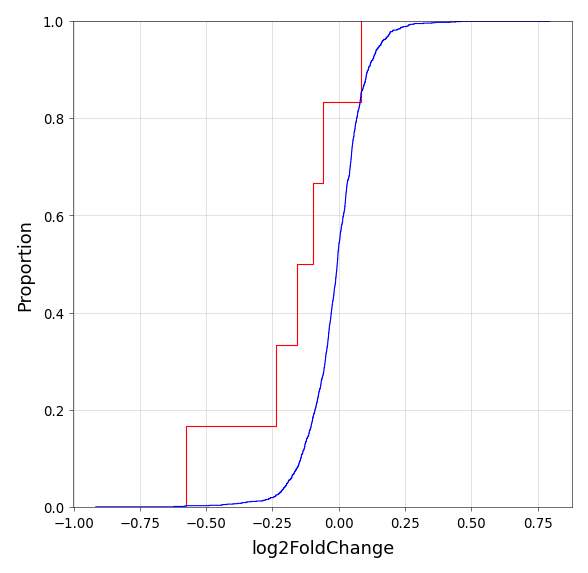

In [308]:
df2 = df2[df2['baseMean'] > 1000]
genesoi2 = ['Zbtb16', 'Herpud2', 'Gm29375', 'Gm29642', 'Gm10180', 'Crtam', 'Ubash3b', 'BC043934', 'Tfdp2', 'Gm28924', 'Atp1b3', 'Rnf7', 'Sc5d', 'Tecta', 'Gm44311', 'Tbcel', 'Ccr4', 'Tmppe', 'Bcl2a1c', 'Glb1', 'Gm5921', 'Stt3b', 'Tgfbr2', 'Gm9385', 'Gadl1', 'Gm16142', 'Rora', 'Gclc', 'Elovl5', 'Ddx43', 'Gsta2', 'Gm10639', 'Gm8093', 'Mto1', 'Eef1a1', 'Mb21d1', 'Gm17324', 'Gpr83', 'Izumo1r', 'Fut4', 'Gm16302', 'Ankrd49', 'Mre11a', 'Gm16379', 'Gm16759', 'Smad3', 'Iqch', 'Aagab', 'Ccr8', 'Mobp', 'Xirp1', 'Snora62', 'Cx3cr1', 'Gm26448', 'Gm24044', 'Rpsa', 'Slc25a38', 'Nt5e', 'Gm20537', 'Gm28229', 'Syncrip', 'Gm5066', 'Snx14']
genes_in_cluster = [x for x in genesoi2 if x in df2.index]

matched_vals = fetch_mean_matched_values(df2.loc[genes_in_cluster, 'baseMean'], df2.drop(genes_in_cluster).loc[:, 'baseMean']).index
sns.ecdfplot(df2.loc[genes_in_cluster, 'log2FoldChange'], color='red')
sns.ecdfplot(df2.loc[:, 'log2FoldChange'], color='blue')


<Axes: xlabel='log2FoldChange', ylabel='Proportion'>

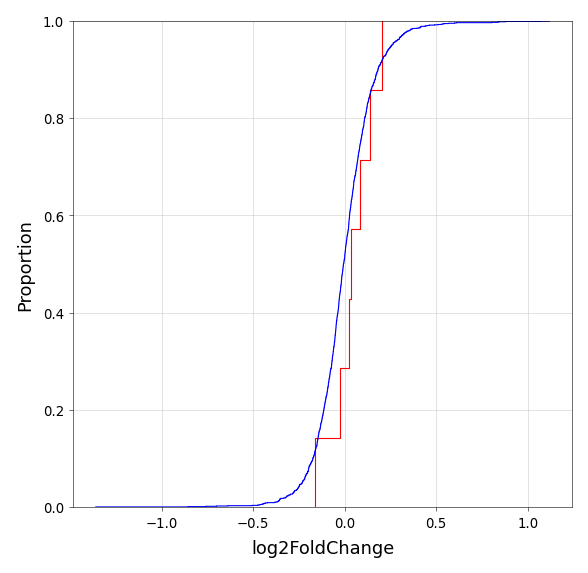

In [311]:
df1 = df1[df1['baseMean'] > 1000]
genesoi2 = ['Zbtb16', 'Herpud2', 'Gm29375', 'Gm29642', 'Gm10180', 'Crtam', 'Ubash3b', 'BC043934', 'Tfdp2', 'Gm28924', 'Atp1b3', 'Rnf7', 'Sc5d', 'Tecta', 'Gm44311', 'Tbcel', 'Ccr4', 'Tmppe', 'Bcl2a1c', 'Glb1', 'Gm5921', 'Stt3b', 'Tgfbr2', 'Gm9385', 'Gadl1', 'Gm16142', 'Rora', 'Gclc', 'Elovl5', 'Ddx43', 'Gsta2', 'Gm10639', 'Gm8093', 'Mto1', 'Eef1a1', 'Mb21d1', 'Gm17324', 'Gpr83', 'Izumo1r', 'Fut4', 'Gm16302', 'Ankrd49', 'Mre11a', 'Gm16379', 'Gm16759', 'Smad3', 'Iqch', 'Aagab', 'Ccr8', 'Mobp', 'Xirp1', 'Snora62', 'Cx3cr1', 'Gm26448', 'Gm24044', 'Rpsa', 'Slc25a38', 'Nt5e', 'Gm20537', 'Gm28229', 'Syncrip', 'Gm5066', 'Snx14']
genes_in_cluster = [x for x in genesoi2 if x in df1.index]

matched_vals = fetch_mean_matched_values(df1.loc[genes_in_cluster, 'baseMean'], df1.drop(genes_in_cluster).loc[:, 'baseMean']).index
sns.ecdfplot(df1.loc[genes_in_cluster, 'log2FoldChange'], color='red')
sns.ecdfplot(df1.loc[:, 'log2FoldChange'], color='blue')


### Look at IFNg

In [12]:
%autoreload 2
from hub_pileup import pileup_bin_pairs

padding_size = 30

megaloop_pileup_cooldict = cooldict_50kb

df1 = pd.DataFrame()
indsoi = [6058, 5217, 5216]
df1['ind'] = indsoi
df1['chrom'] = [all_ind_to_region[x][0] for x in df1['ind']]
df1['cluster'] = -1

df2 = pd.DataFrame()
df2['ind'] = goodinds
df2['chrom'] = [all_ind_to_region[x][0] for x in goodinds]
df2['cluster'] = merged_clustdict['all']
df2 = df2[df2['cluster'].isin([0, 4, 18])]


differential_mat_dict, differential_metadata = pileup_bin_pairs(df1, df2, megaloop_pileup_cooldict,
                                                                chrom_to_start, inter_and_intra_connections_treg, 
                                                                inter_and_intra_connections_tcon, resolution_in=250_000, resolution_out = 50_000, 
                                                                intra=False, inter=True, padding_size=padding_size, fetch_oe=True
                                                               )

Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 9
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10
Done with 10


In [35]:
differential_mat_dict.keys()

dict_keys(['wt', 'ko', 'Our_Treg'])

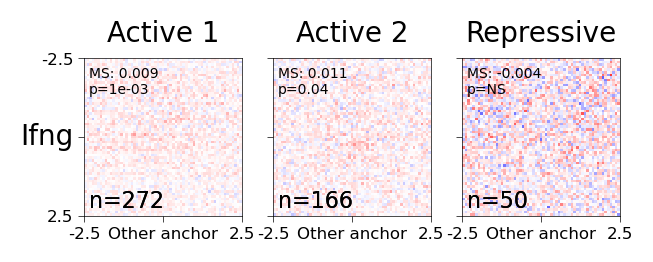

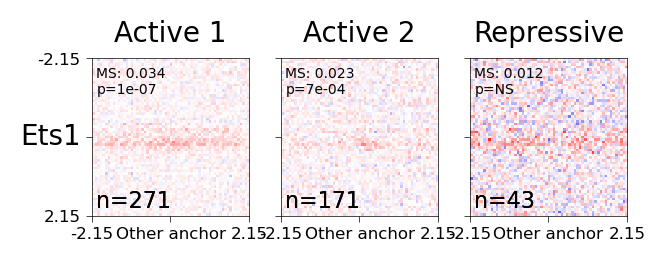

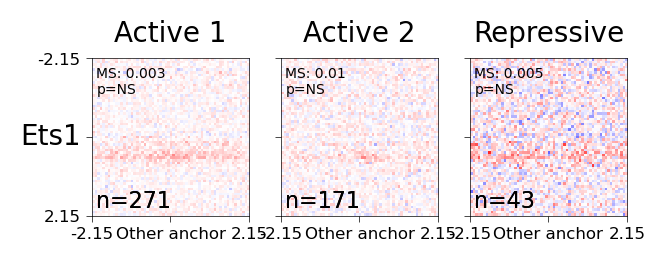

In [39]:
from hub_pileup import plot_pileup_mat

for ind in indsoi:
    ms = []
    if (differential_metadata['ind1']==ind).sum()==0:
        continue

    name = get_name(ind, ind_to_gene)
    fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100)
    for c, cluster in enumerate([0, 4, 18]):
        plt.sca(axs[c])
        idx = ( ((differential_metadata['ind1']==ind) & (differential_metadata['cluster2']==cluster)) | 
                ((differential_metadata['ind2']==ind) & (differential_metadata['cluster1']==cluster))
              )
        rows = []
    
        # mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])[:, 30:-26, 30:-26]
        mats = (differential_mat_dict['wt'][idx] - differential_mat_dict['ko'][idx])[:, :, :]
        plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin=-.3, vmax=.3)
    
        plt.title(columns_to_names.get(cluster, cluster))
        plt.grid(False)
        plt.text(.03, .05, f'n={idx.sum()}', transform=plt.gca().transAxes, fontsize=8)
        
        
    n = len(mats)
    cutoff = n*50_000/1e6
    mb = mats.shape[1]*50e3 // 2 / 1e6
    x1, x2 = all_ind_to_region[ind][1], all_ind_to_region[ind][2]
    xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)
    
    for c, a in enumerate(axs):
        plt.sca(axs[c])
    
        plt.yticks([-mb, 0, mb])
        plt.gca().set_yticklabels([-cutoff, f'{name}', cutoff])
        plt.gca().get_yticklabels()[1].set_fontsize(10)
        plt.gca().get_yticklabels()[1].set_rotation(0)
        plt.gca().get_yticklabels()[1].set_va('center')
    
        plt.gca().set_xticks([-mb, 0, mb])
        plt.gca().set_xticklabels([-cutoff, "Other anchor", cutoff])
    
        a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
        if c % n != 0 :
            plt.gca().tick_params(labelleft=False)

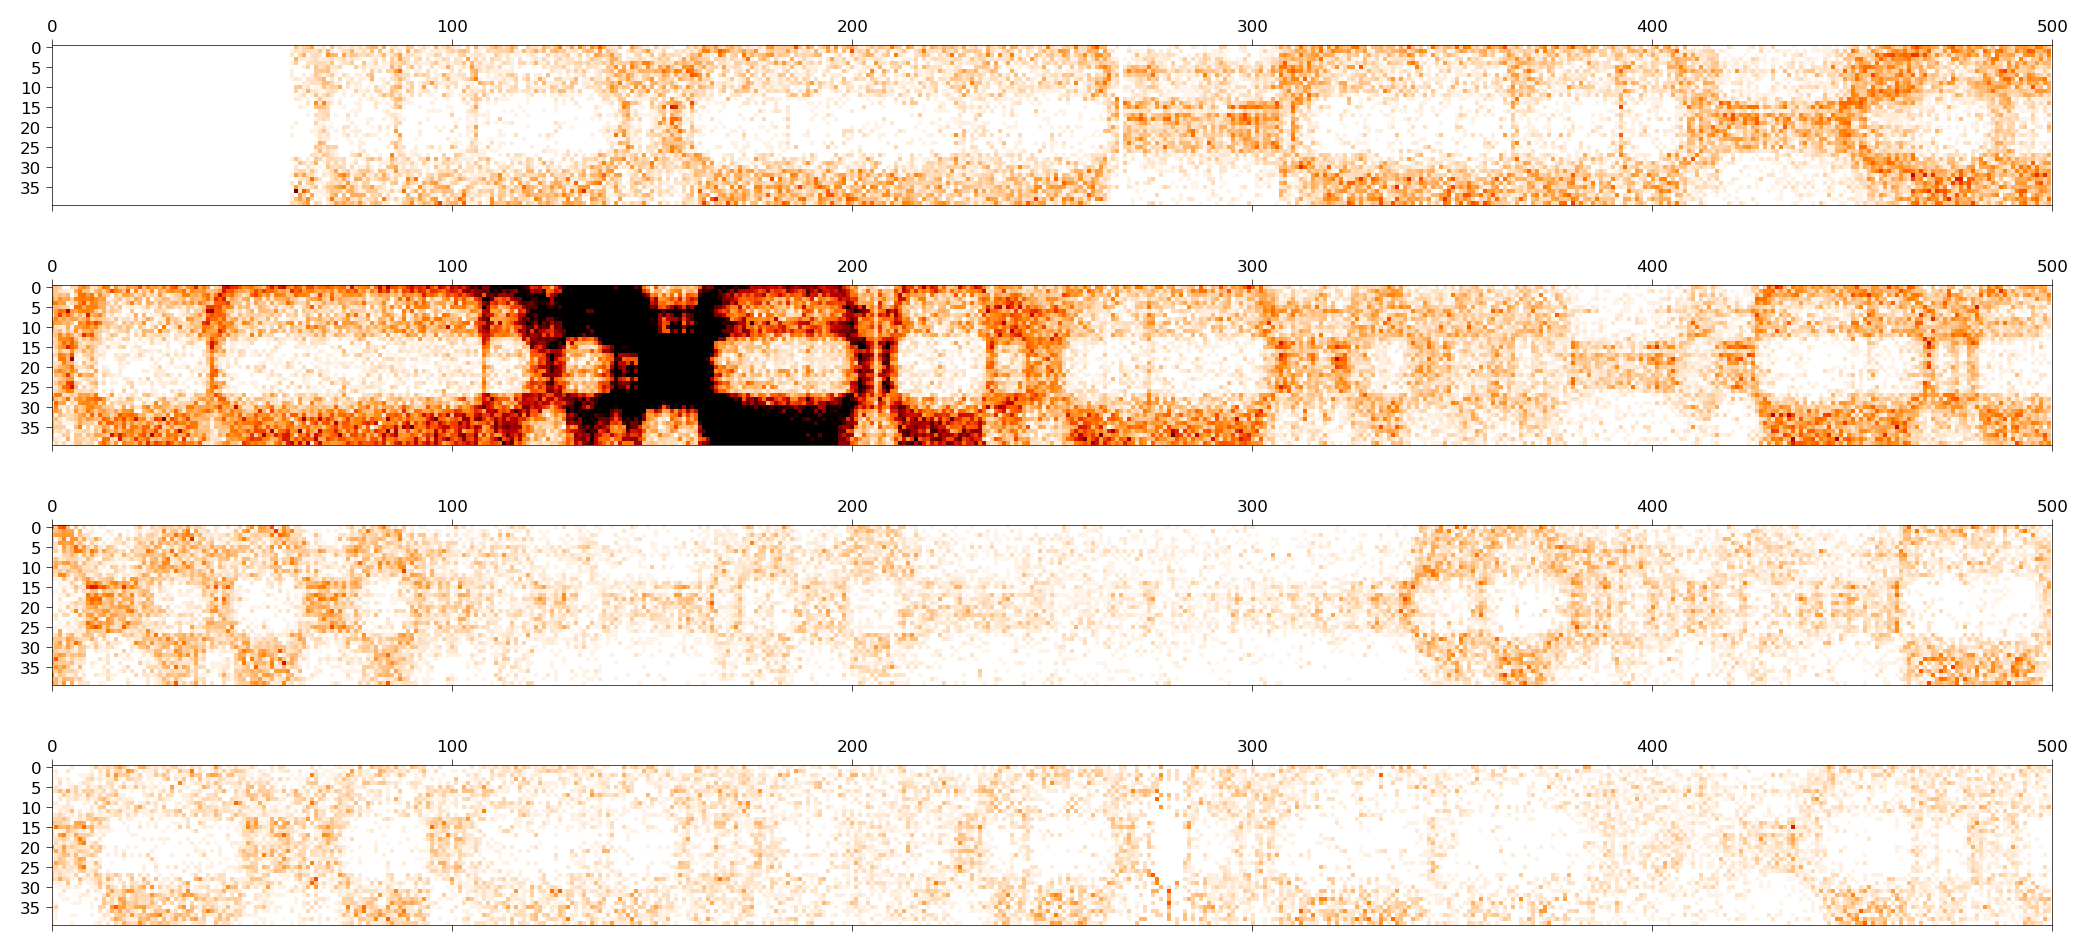

In [17]:
make_wrapped_plot(5217, '9', coolcond='wt', cooldict=cooldict_50kb, l = 5)

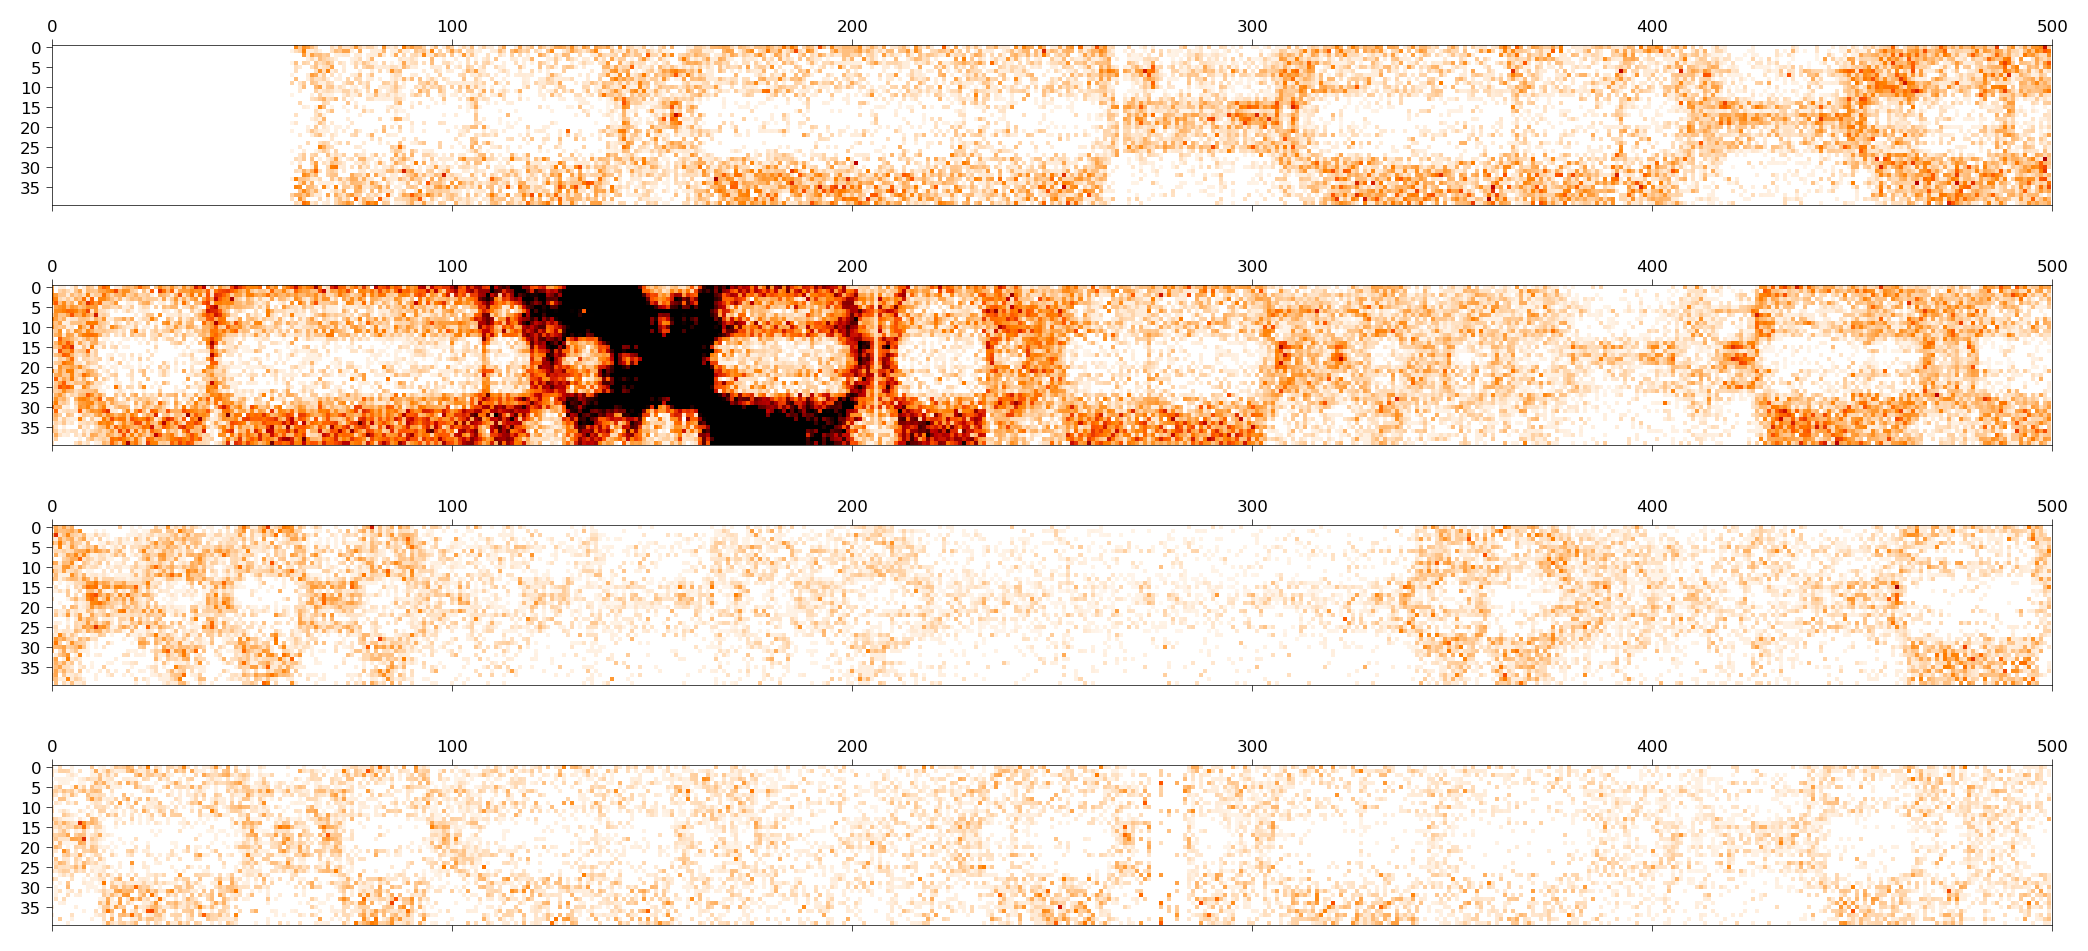

In [18]:
make_wrapped_plot(5217, '9', coolcond='ko', cooldict=cooldict_50kb, l = 5)